In [217]:
import csv, json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from typing import Optional, Dict
from functools import reduce

Setup

In [2]:

in_dir = 'traffic_genome_format/traffic_genome_format.json'

with open(in_dir, 'r') as f:
    entity_count = json.load(f)['object_count']

# generate data series
labels = entity_count.keys()
frequencies = entity_count.values()

plt.rcParams.update({'font.size': 16})   

#### Traffic Genome

Entity distribution

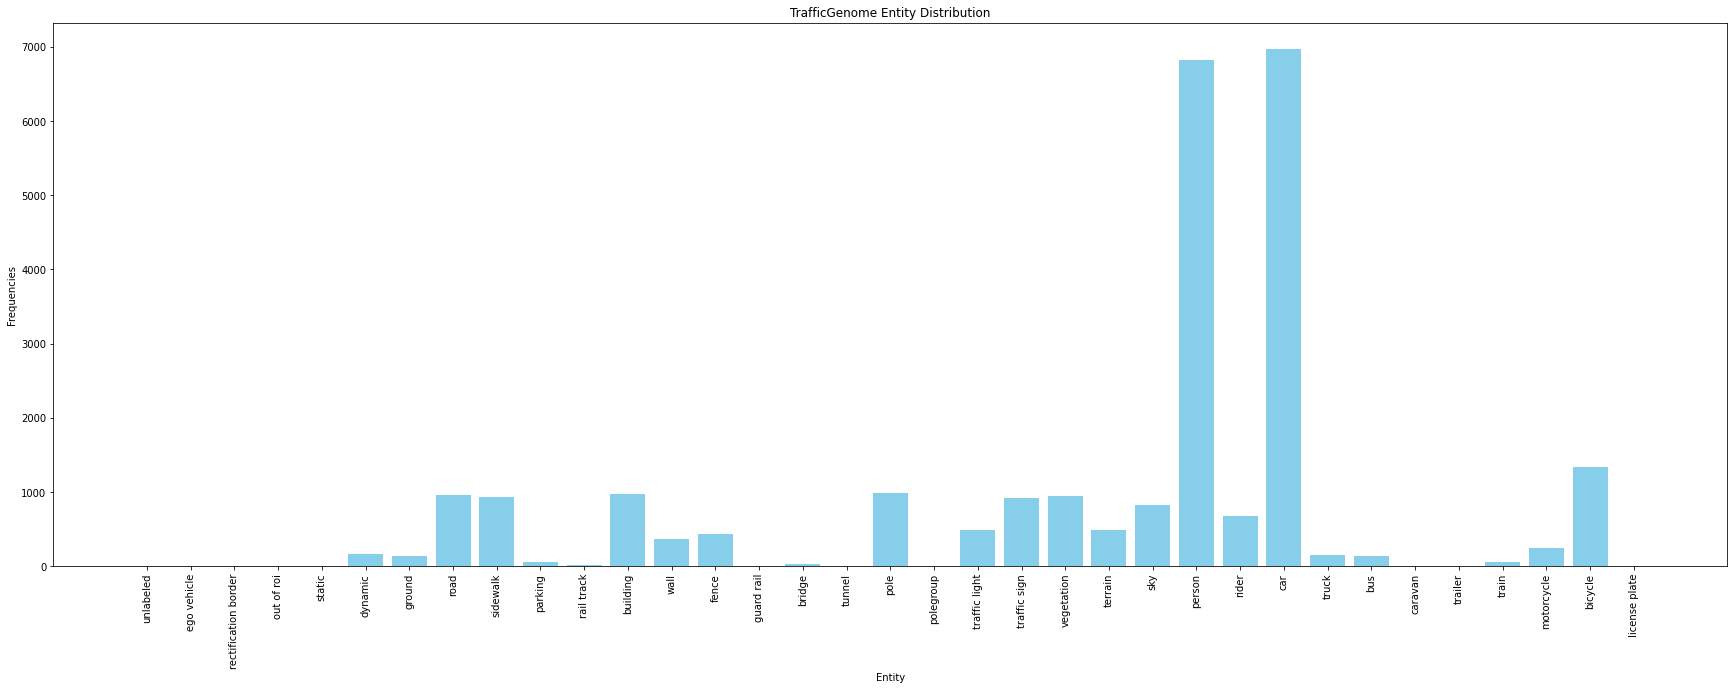

In [3]:
plt.figure(figsize=(30, 10))  # Optional: Set the figure size

plt.bar(labels, frequencies, color='skyblue')  # Create the bar chart

plt.xlabel('Entity')  # Label for the x-axis
plt.ylabel('Frequencies')  # Label for the y-axis
plt.title('TrafficGenome Entity Distribution')  # Title of the histogram

plt.xticks(rotation=90)  # Optional: Rotate x-axis labels for better readability

plt.savefig('tg_entity_distr.jpg',dpi=300, bbox_inches='tight' )
plt.show()  # Display the histogram

Count-frequency

In [4]:
sum(frequencies)

25147

Entity distribution of low frequencies class

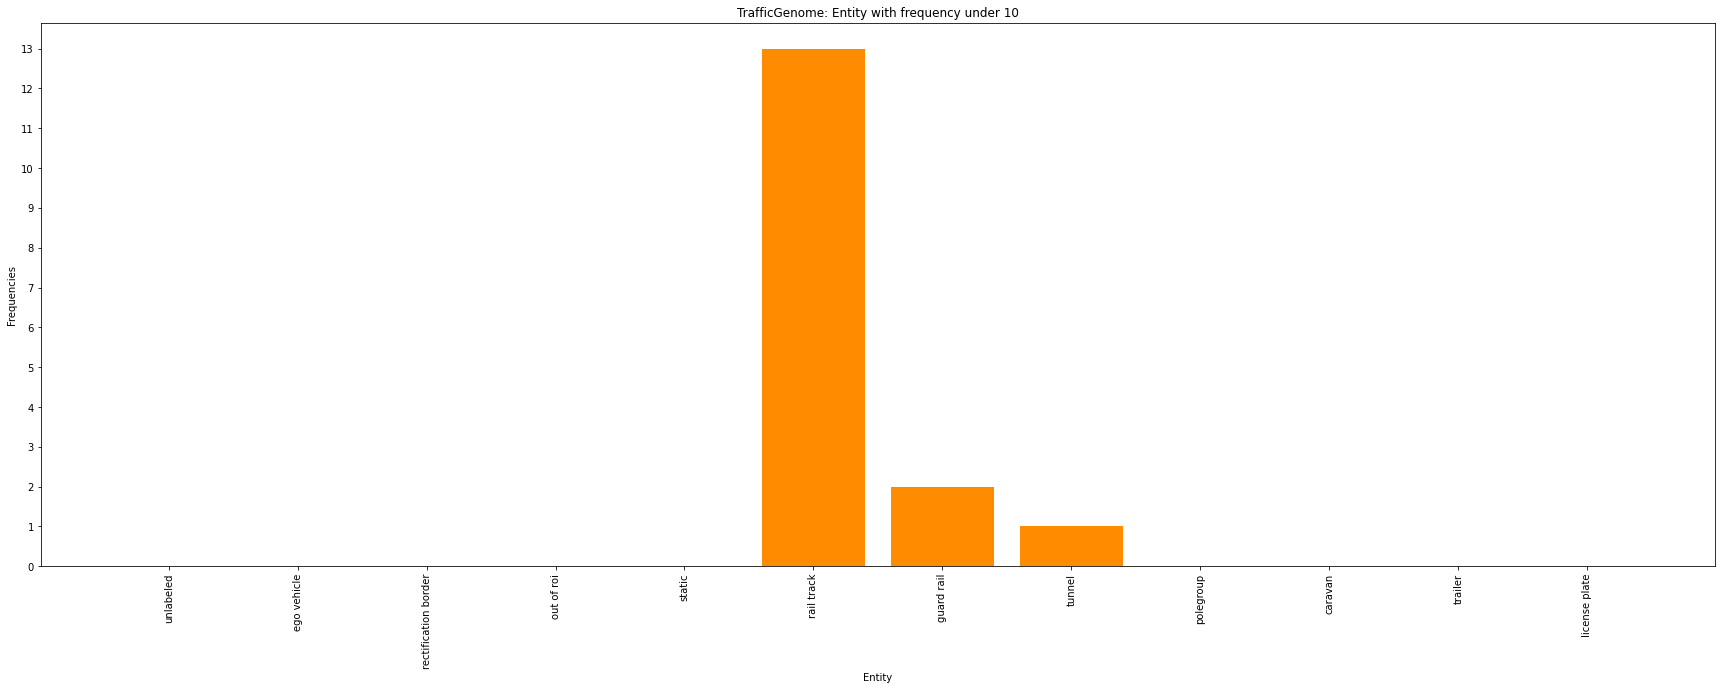

In [5]:
thresh = 10
low_fr = filter(lambda t: t.v < thresh, entity_count)
low_fr = {k: v for k, v in  entity_count.items() if v <14 }

plt.figure(figsize=(30, 10))  # Optional: Set the figure size

plt.bar(low_fr.keys(), low_fr.values(), color='darkorange')  # Create the bar chart

plt.xlabel('Entity')  # Label for the x-axis
plt.ylabel('Frequencies')  # Label for the y-axis
plt.yticks(range(0,14, 1))
plt.title(f'TrafficGenome: Entity with frequency under {thresh}')  # Title of the histogram

plt.xticks(rotation=90)  # Optional: Rotate x-axis labels for better readability

plt.savefig('tg_low_fr_entity_distr.jpg',dpi=300, bbox_inches='tight' )
plt.show()  # Display the histogram



Relationship set distribution

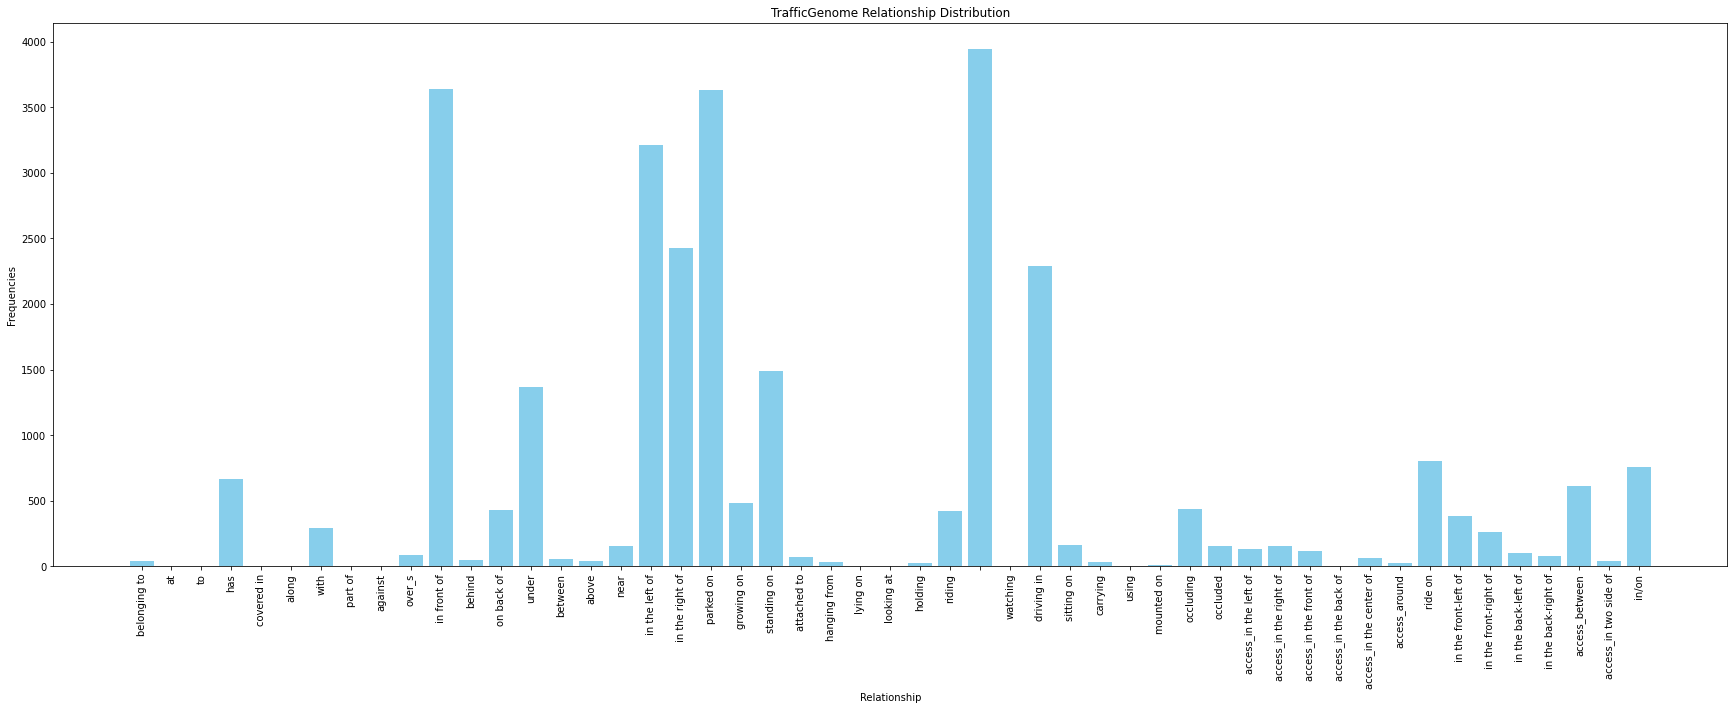

In [6]:
with open(in_dir, 'r') as f:
    rel_count = json.load(f)['predicate_count']

# generate data series
labels = rel_count.keys()
frequencies = rel_count.values()

plt.figure(figsize=(30, 10))  # Optional: Set the figure size

plt.bar(labels, frequencies, color='skyblue')  # Create the bar chart

plt.xlabel('Relationship')  # Label for the x-axis
plt.ylabel('Frequencies')  # Label for the y-axis
plt.title('TrafficGenome Relationship Distribution')  # Title of the histogram

plt.xticks(rotation=90)  # Optional: Rotate x-axis labels for better readability

plt.savefig('tg_entity_distr.jpg',dpi=300, bbox_inches='tight' )
plt.show()  # Dis

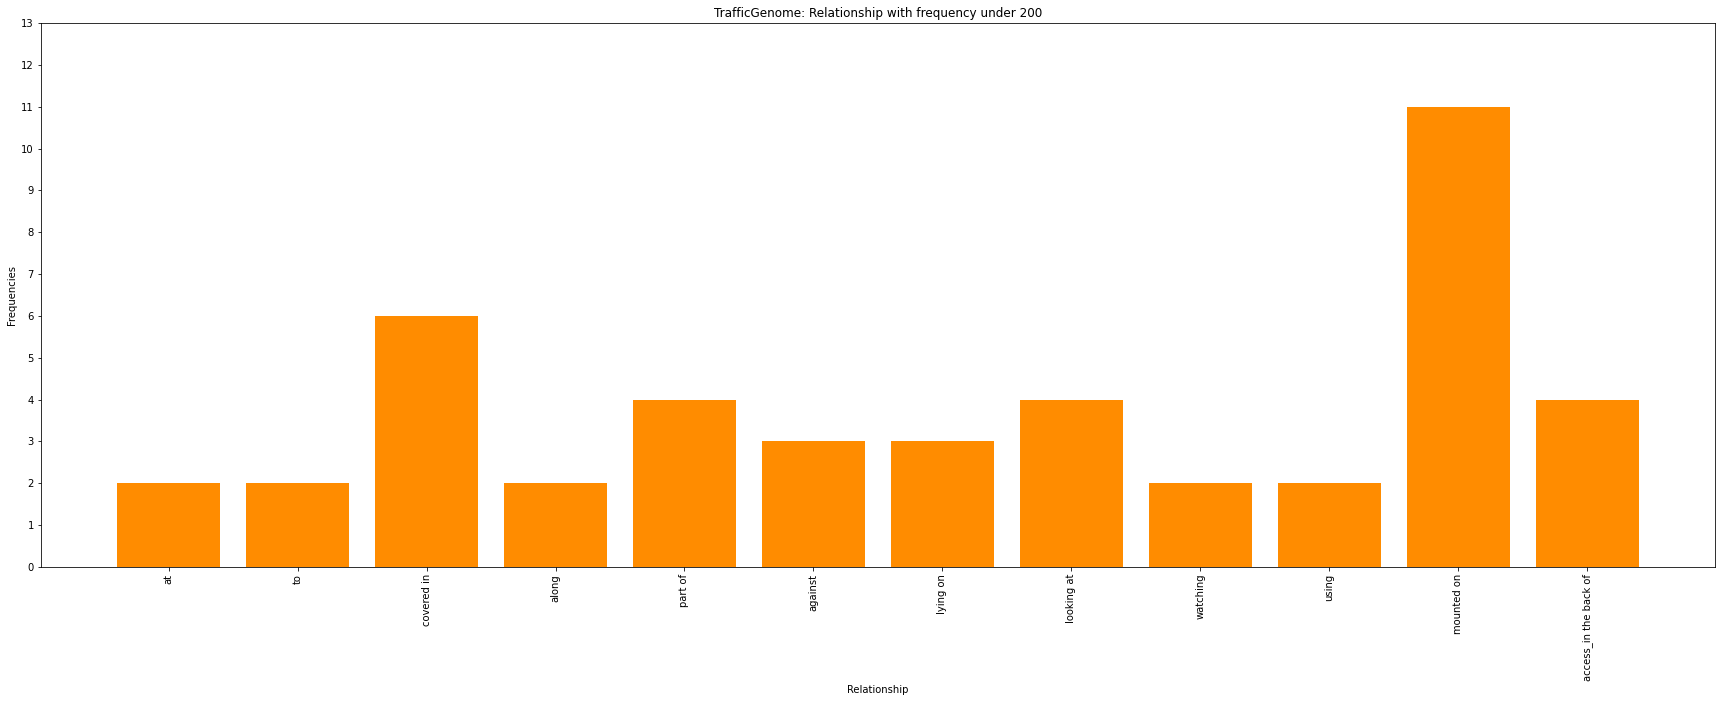

In [7]:
thresh = 200
low_fr = filter(lambda t: t.v < thresh, rel_count)
low_fr = {k: v for k, v in  rel_count.items() if v <14 }

plt.figure(figsize=(30, 10))  # Optional: Set the figure size

plt.bar(low_fr.keys(), low_fr.values(), color='darkorange')  # Create the bar chart

plt.xlabel('Relationship')  # Label for the x-axis
plt.ylabel('Frequencies')  # Label for the y-axis
plt.yticks(range(0,14, 1))
plt.title(f'TrafficGenome: Relationship with frequency under {thresh}')  # Title of the histogram

plt.xticks(rotation=90)  # Optional: Rotate x-axis labels for better readability


plt.show()  # Display the histogram

Relationship distribution Test-set

In [8]:
def print_rel_freq(set_name:str,rel_name:str, dataset:str='adria_dataset' ) ->None:

    
    freq_set = { }


  
    with open(f'{dataset}/rel.json') as f:
        rel_data = json.load(f)
        
        set_data = rel_data[set_name]
        cat_map = { i: name  for i, name in enumerate(rel_data['rel_categories']) }
        
    for list_rel in  set_data.values():
        
    
        for rel in list_rel:
            cat_id = cat_map[rel[2]]
            
            if cat_id not in freq_set.keys():
                freq_set[cat_id] = 0
            freq_set[cat_id] += 1
            
        

    print(freq_set[rel_name])




In [9]:
def save_stats2cv(dataset:str='adria_dataset', test_set:str='coco_traffic_genome',
                  rel_cat_file:str='traffic_genome_format/traffic_genome_format.json') ->None:

    freq_set = { 'train':0, 'val':0, 'test': 0}
    set_data = {}
        
    def process(rel_data):
        freq_set = {}
        cat_map = { i: name  for i, name in enumerate(rel_data['rel_categories']) }
    
        
        
        for set_name in set_data.keys():
            freq_set = { r: 0 for r in rel_cat}
            
  
            for list_rel in  set_data[set_name].values():
                for rel in list_rel:
                    cat_id = cat_map[rel[2]]
                    
                    if cat_id not in freq_set.keys():
                        freq_set[cat_id] = 0
                    freq_set[cat_id] += 1  
         
        return freq_set             

    with open(rel_cat_file) as f:
        rel_cat =json.load(f)['predicate_to_idx'].keys()
        
    with open(f'{dataset}/rel.json') as f:
        rel_data = json.load(f)
        
        
        set_data['train'] = rel_data['train']
        
        freq_set['train'] = process(rel_data)
        set_data['val']=rel_data['val']
        
        freq_set['val'] = process(rel_data)


    
    with open(f'{test_set}/rel.json') as f:
        rel_data = json.load(f)
        
        
        set_data['test'] = rel_data['test']

        freq_set['test'] = process(rel_data)
        


    df = pd.DataFrame(freq_set, columns=['name','train', 'val', 'test'])
    df.to_csv('rel_tg_stats.csv')


In [10]:
save_stats2cv()

In [218]:

def show_distribution(set_name:str, thresh:Optional[int] = None, type:str='Entity', dataset:str='adria_dataset', dataset_name:str='ADRIA', augmented:bool=False ) ->Dict[str, int]:
    
    assert type=='Entity' or type=='Relationship', 'only enetity and relationship are admissible'
    
    freq_set = { }


    if type=='Entity':
        with open(f'traffic_genome_format/traffic_genome_format.json') as f:
            cat_l = json.load(f)['idx_to_label']
            
        # map category
        cat_map =  { int(idx): c  for idx,c in  cat_l.items() }
        with open(f'{dataset}/{set_name}.json') as f:
            set_data = json.load(f)
        for ann  in set_data['annotations']:
            
            cat_id = cat_map[ann['category_id']]
            if cat_id not in freq_set.keys():
                freq_set[cat_id] = 0
            freq_set[cat_id] += 1
 
    else:
        with open(f'{dataset}/rel.json') as f:
            rel_data = json.load(f)
            
            set_data = rel_data[set_name]
            cat_map = { i: name  for i, name in enumerate(rel_data['rel_categories']) }
            
        for list_rel in  set_data.values():
            
        
            for rel in list_rel:
                cat_id = cat_map[rel[2]]
                
                if cat_id not in freq_set.keys():
                    freq_set[cat_id] = 0
                freq_set[cat_id] += 1
            
        

    print(freq_set)

    # reduce classes if threshold given
    aug='augmented' if augmented else ''
    if thresh != None:
        freq_set = {k: v for k, v in  freq_set.items() if v < thresh }  
        
        title = f'{dataset_name}: {type} class distribution in {set_name}-set below {thresh} frequency' 
        color='darkorange'
         
    else:
       
        title = f'{dataset_name}: {type} class distribution in {aug} {set_name}-set'
        color = 'skyblue'

    plt.rcParams.update({'font.size': 16})   
    

    plt.figure(figsize=(30, 10))  
    # Create the bar plot
    plt.bar(freq_set.keys(), freq_set.values(), color= color)

    # You can set the x-axis labels if needed (e.g., numerical indexes)
    plt.xticks(range(len(freq_set.keys())))

    # Labeling and customization
    plt.xlabel(type)
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)  # Optional: Rotate x-axis labels for better readability

    plt.title(title)
    
    total_freq= sum( [ v for v in freq_set.values()])
    
    print(total_freq)
    return freq_set



In [266]:
def  plot_sort(freq_set:Dict[str, int], name:str,  dataset_name:str, set_name:str, augmented:bool=False) -> None:
    
        # reduce classes if threshold given

    aug='augmented' if augmented else ''
    title = f'{dataset_name}: {name} class distribution in {aug} {set_name}-set'
    color = 'skyblue'

    df = pd.DataFrame(list(freq_set.items()), columns=[name, 'Frequency'])
    df_sorted_desc= df.sort_values('Frequency',ascending=False)

    plt.rcParams.update({'font.size': 16})   
    

    plt.figure(figsize=(30, 10))  
    # Create the bar plot
    plt.bar(df_sorted_desc[name], df_sorted_desc['Frequency'], color=color)

    # You can set the x-axis labels if needed (e.g., numerical indexes)
    plt.xticks(range(len(freq_set.keys())))

    # Labeling and customization
    plt.xlabel(name)
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)  # Optional: Rotate x-axis labels for better readability

    plt.title(title)
    
    plt.savefig(f'{name}_{dataset_name}.jpg',dpi=300, bbox_inches='tight' )


def  plot_sort_all(freq_train:Dict[str, int],freq_val:Dict[str, int],freq_test:Dict[str, int], name:str,  dataset_name:str) -> None:
    
        # reduce classes if threshold given

    title = f'{dataset_name}: {name} class distribution'
    color = 'skyblue'

    freq_dt = {}
    with open('traffic_genome_format/traffic_genome_format.json') as f:
        rel_data = json.load(f)
        if name=='Entity':
                   keys = rel_data['label_to_idx'].keys()
        elif name=='Relationship':
            keys = rel_data['predicate_to_idx'].keys()
            
        else:
            raise ValueError(f'Invalid name:{name}')
        

    
    
    for k  in keys:
        vt =  freq_train[k]  if k in freq_train else 0
        vv =  freq_train[k]  if k in freq_train else 0
        vr =  freq_train[k]  if k in freq_train else 0
            
        freq_dt[k]  = vt + vv + vr
        
    df = pd.DataFrame(list(freq_dt.items()), columns=[name, 'Frequency'])
    df_sorted_desc= df.sort_values('Frequency',ascending=False)

    plt.rcParams.update({'font.size': 16})   
    

    plt.figure(figsize=(30, 10))  
    # Create the bar plot
    plt.bar(df_sorted_desc[name], df_sorted_desc['Frequency'], color=color)

    # You can set the x-axis labels if needed (e.g., numerical indexes)
    plt.xticks(range(len(freq_dt.keys())))

    # Labeling and customization
    plt.xlabel(name)
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)  # Optional: Rotate x-axis labels for better readability

    plt.title(title)
    
    plt.savefig(f'{name}_{dataset_name}.jpg',dpi=300, bbox_inches='tight' )
    
    
  
def  plot_sort_cmp(freq_set:Dict[str, int],  freq_set_aug,  name:str,dataset_name:str, set_name:str, thresh:int=-1) -> None:
    
        # reduce classes if threshold given


    title = f'{dataset_name}: {name} class distribution after data-augmentation in {set_name}-set'
  


    
    with open('traffic_genome_format/traffic_genome_format.json') as f:
        rel_data = json.load(f)
        if name=='Entity':
            keys = rel_data['label_to_idx'].keys()
        elif name=='Relationship':
            keys = rel_data['predicate_to_idx'].keys()
            
        else:
            raise ValueError(f'Invalid name:{name}')
    
    freq_s1 = {}
    freq_s2 = {}
    for k  in keys:
        freq_s1[k]  =freq_set[k]  if k in freq_set else 0 
        freq_s2[k]  =freq_set_aug[k]  if k in freq_set_aug else 0 
       
   
    t_df_1= pd.DataFrame(list(freq_s1.items()), columns=[name, 'Frequency']).sort_values('Frequency',ascending=False)
    
    t_df_2 = t_df_1.copy()
    
    for k in keys:
        row_index = t_df_1[t_df_1[name] == k].index[0]  #
        t_df_2.loc[row_index, 'Frequency'] = freq_s2[k]
    
    
    
    plt.rcParams.update({'font.size': 16})   
    
    if thresh>0:
        df_1 = t_df_1[t_df_1['Frequency'].astype(int) < int(thresh)]
        df_2 = t_df_2[t_df_1['Frequency'].astype(int) < int(thresh)]
        k_legend = df_1[name]
    else:
        df_1 = t_df_1
        df_2 = t_df_2
        k_legend =  df_1[name]
        
    plt.figure(figsize=(30, 10))  
    # Create the bar plot
    X_axis = np.arange(len(k_legend)) 
    print(X_axis)
    bar_width = 0.25  
    offset = 0.15
    colors = {'original':'royalblue', 'augmented':'darkorange'}
    plt.bar(X_axis -offset, df_1['Frequency'], width=bar_width, color= colors['original'])
    plt.bar(X_axis +offset, df_2['Frequency'],width=bar_width, color=colors['augmented'])
    # You can set the x-axis labels if needed (e.g., numerical indexes)

             
    labels = list(colors.keys())
    handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
    plt.legend(handles, labels)

    # Labeling and customization
    print(df_1[name].values)
    plt.xlabel(name)
    plt.ylabel('Frequency')
    plt.xticks(X_axis,k_legend, rotation=90)  # Optional: Rotate x-axis labels for better readability

    plt.title(title)
    
    thresh_flag = '' if thresh== -1 else str(thresh)
    plt.savefig(f'{name}_{dataset_name}_{set_name}_cmp_{thresh_flag}.jpg',dpi=300, bbox_inches='tight' )


Plot distribution of Traffic Genome dataset

{'parked on': 2252, 'near': 114, 'in front of': 2363, 'above': 29, 'under': 954, 'occluding': 272, 'standing on': 885, 'driving in': 1540, 'in the right of': 1575, 'in the left of': 1993, 'access_in the center of': 43, 'access_in the right of': 105, 'in/on': 512, 'holding': 14, 'on back of': 304, 'walking on': 2515, 'occluded': 113, 'in the front-right of': 167, 'attached to': 46, 'hanging from': 22, 'with': 186, 'access_around': 14, 'growing on': 295, 'in the front-left of': 261, 'access_in the left of': 89, 'riding': 302, 'ride on': 546, 'belonging to': 29, 'between': 34, 'has': 411, 'over_s': 46, 'in the back-right of': 50, 'in the back-left of': 66, 'sitting on': 99, 'carrying': 23, 'covered in': 5, 'using': 2, 'access_in the front of': 69, 'access_between': 375, 'access_in two side of': 27, 'mounted on': 11, 'behind': 29, 'part of': 3, 'against': 3, 'lying on': 3, 'at': 2, 'looking at': 4, 'access_in the back of': 2, 'watching': 1}
18805
{'walking on': 263, 'parked on': 169, 'unde

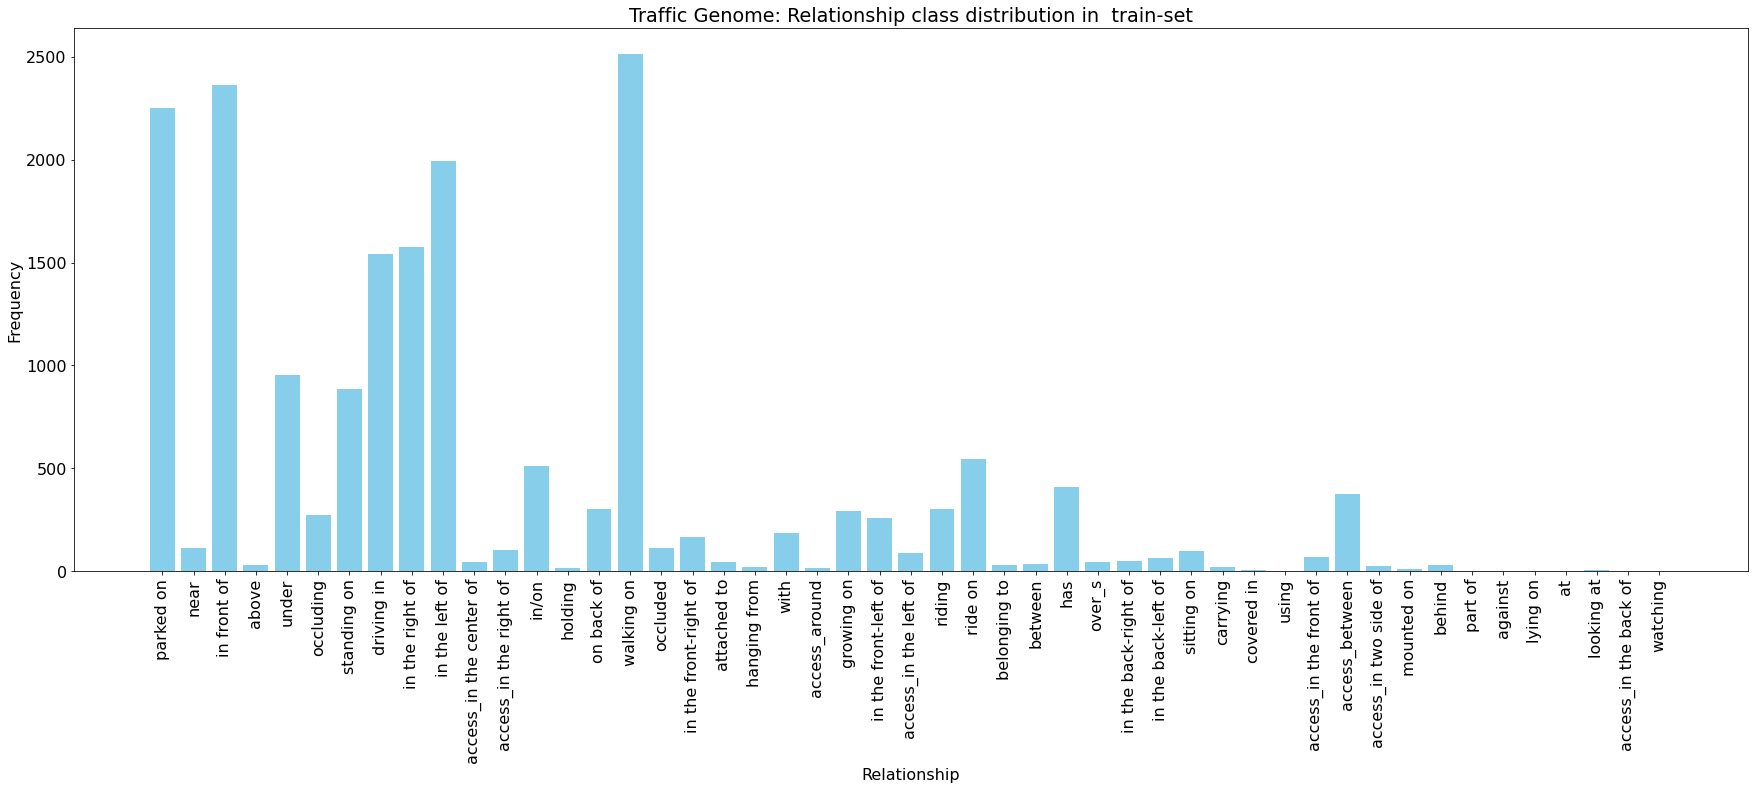

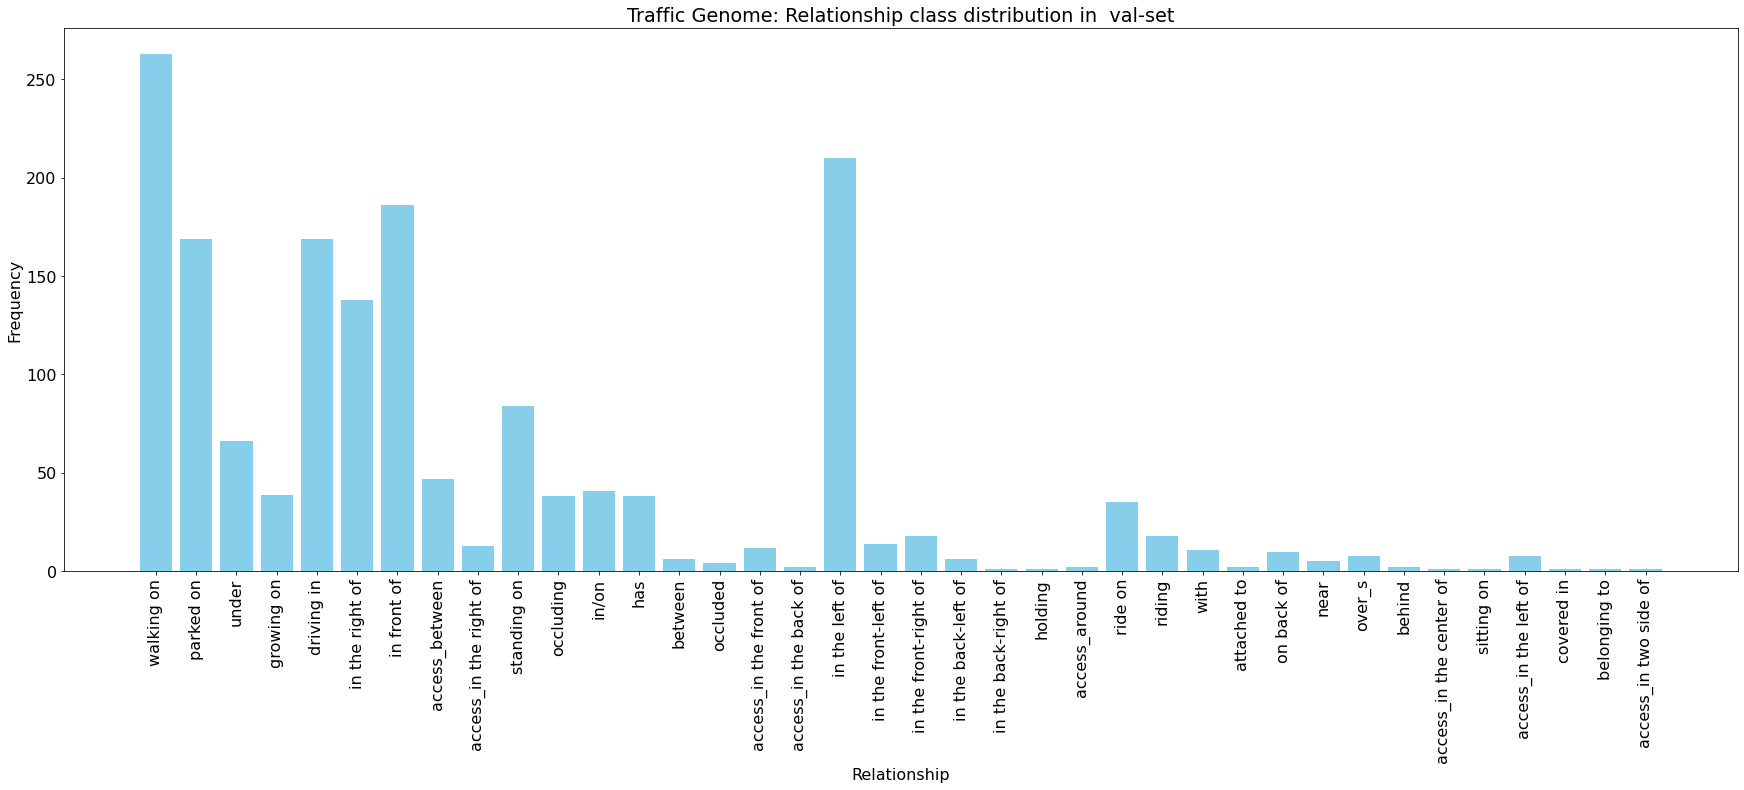

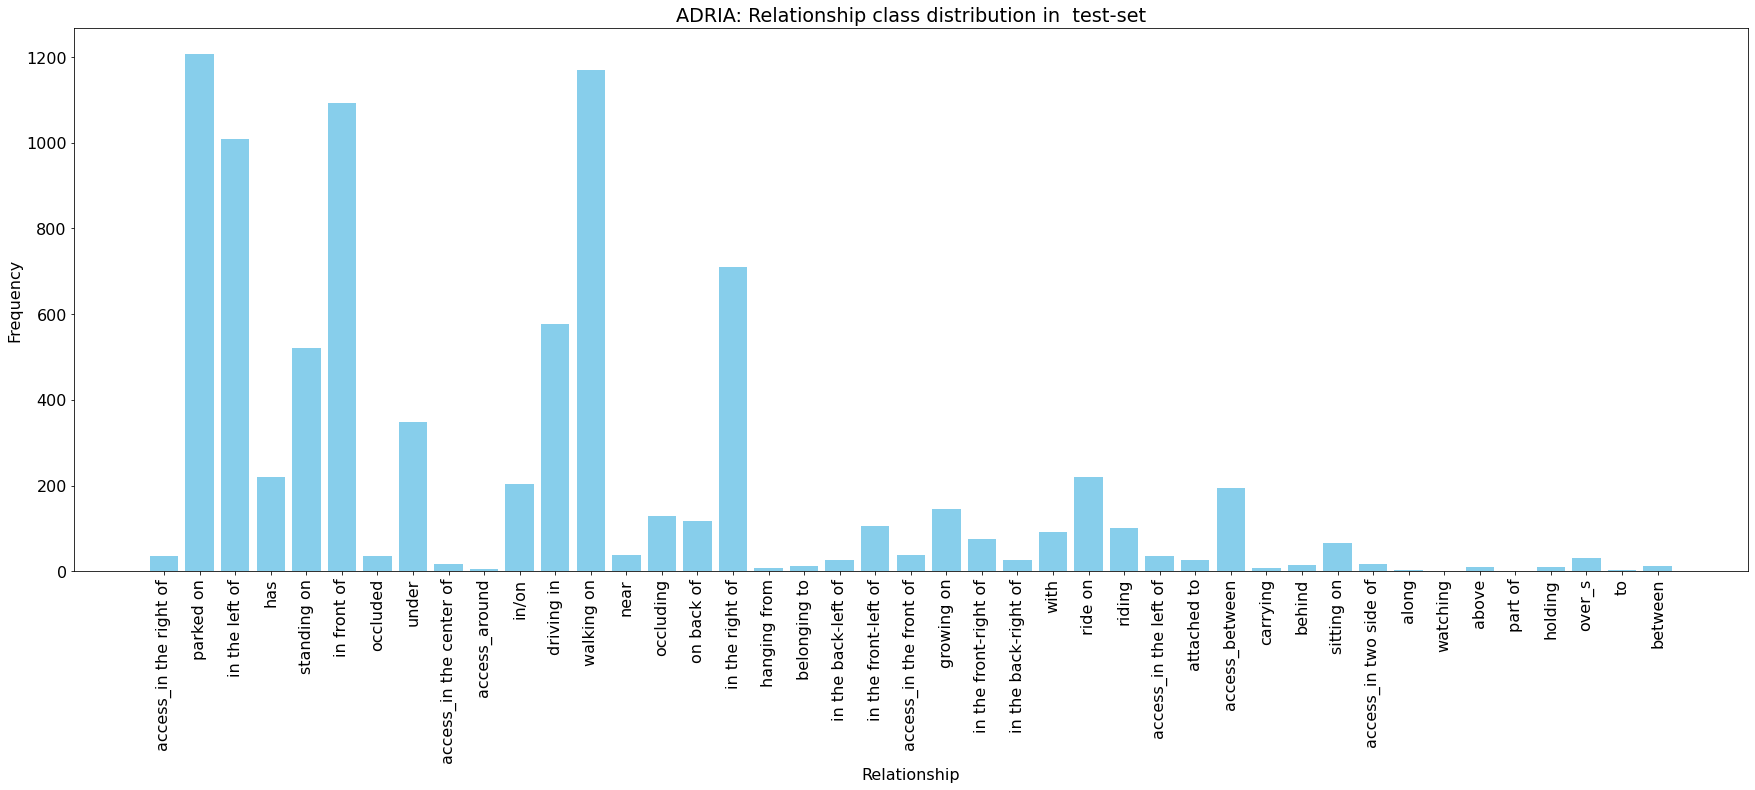

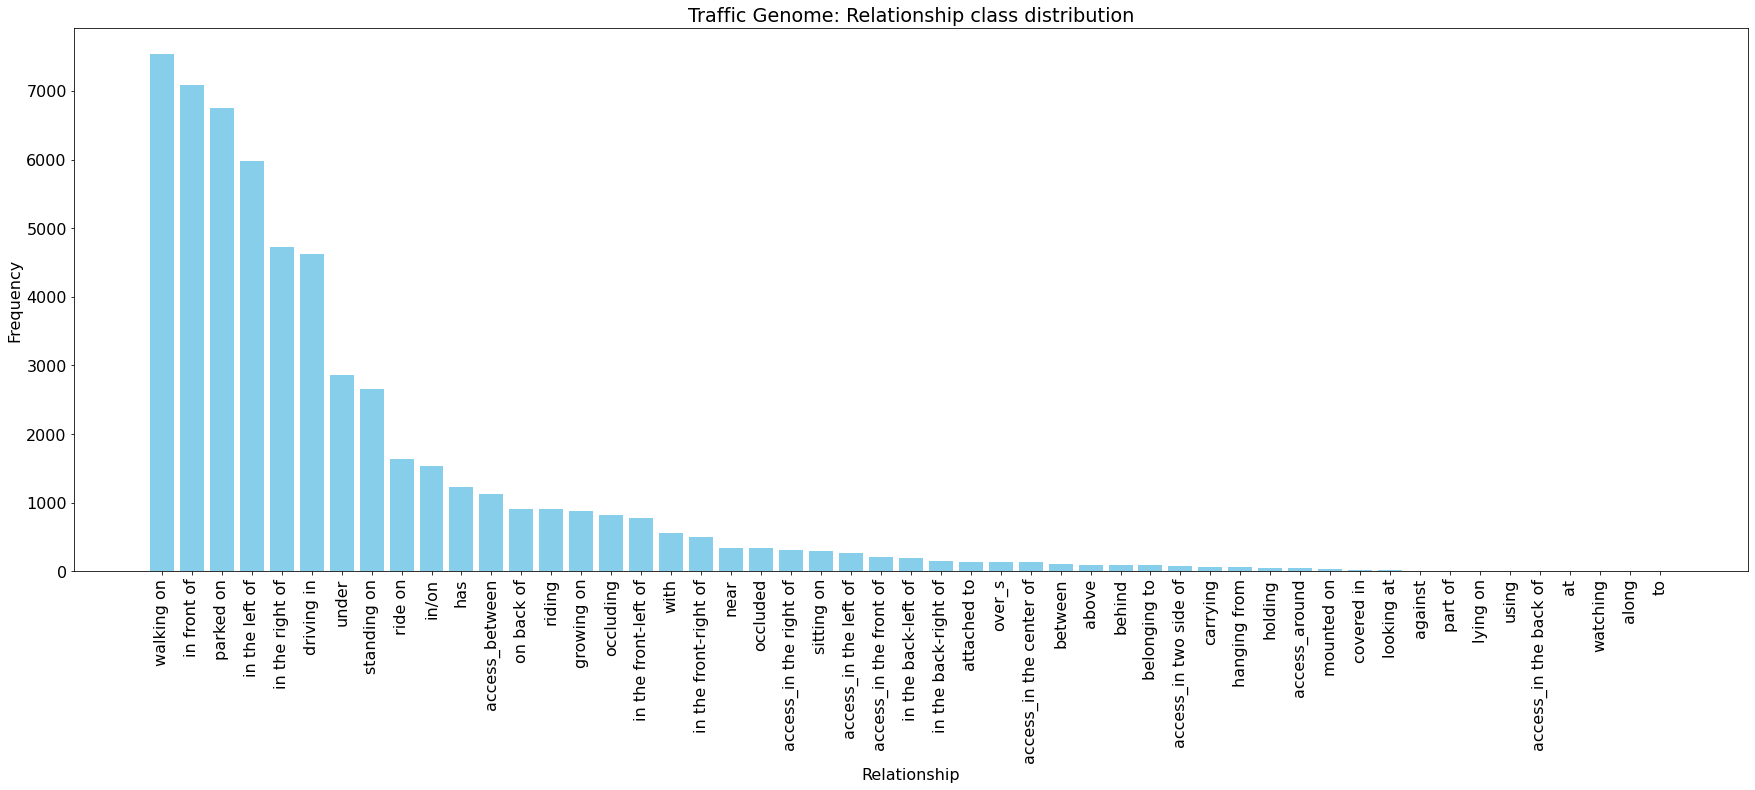

In [116]:

rel_tg_train =  show_distribution('train', type='Relationship', dataset='coco_traffic_genome',  dataset_name='Traffic Genome')
rel_tg_val = show_distribution('val',  type='Relationship', dataset='coco_traffic_genome', dataset_name='Traffic Genome')
rel_tg_test= show_distribution('test',type='Relationship', dataset='coco_traffic_genome')

plot_sort_all(rel_tg_train,rel_tg_val,rel_tg_test, 'Relationship', 'Traffic Genome')


{'sky': 524, 'building': 616, 'sidewalk': 581, 'road': 608, 'car': 4352, 'person': 4354, 'pole': 617, 'traffic light': 312, 'traffic sign': 583, 'motorcycle': 167, 'fence': 266, 'vegetation': 594, 'terrain': 308, 'wall': 225, 'truck': 100, 'bicycle': 833, 'rider': 465, 'bus': 101, 'train': 37, 'ground': 80, 'parking': 31, 'dynamic': 80, 'bridge': 16, 'guard rail': 1, 'rail track': 4}
15855
{'vegetation': 70, 'building': 69, 'car': 458, 'ground': 10, 'pole': 70, 'person': 423, 'dynamic': 22, 'traffic sign': 67, 'terrain': 40, 'road': 69, 'sky': 57, 'bridge': 3, 'sidewalk': 66, 'wall': 31, 'parking': 9, 'fence': 45, 'traffic light': 34, 'rider': 36, 'bicycle': 74, 'truck': 6, 'bus': 5, 'train': 7, 'motorcycle': 9, 'rail track': 1, 'tunnel': 1}
1682
{'wall': 105, 'car': 2158, 'fence': 120, 'road': 290, 'vegetation': 284, 'building': 295, 'sidewalk': 281, 'pole': 298, 'terrain': 138, 'motorcycle': 69, 'sky': 249, 'traffic sign': 277, 'person': 2040, 'traffic light': 149, 'bicycle': 426, 't

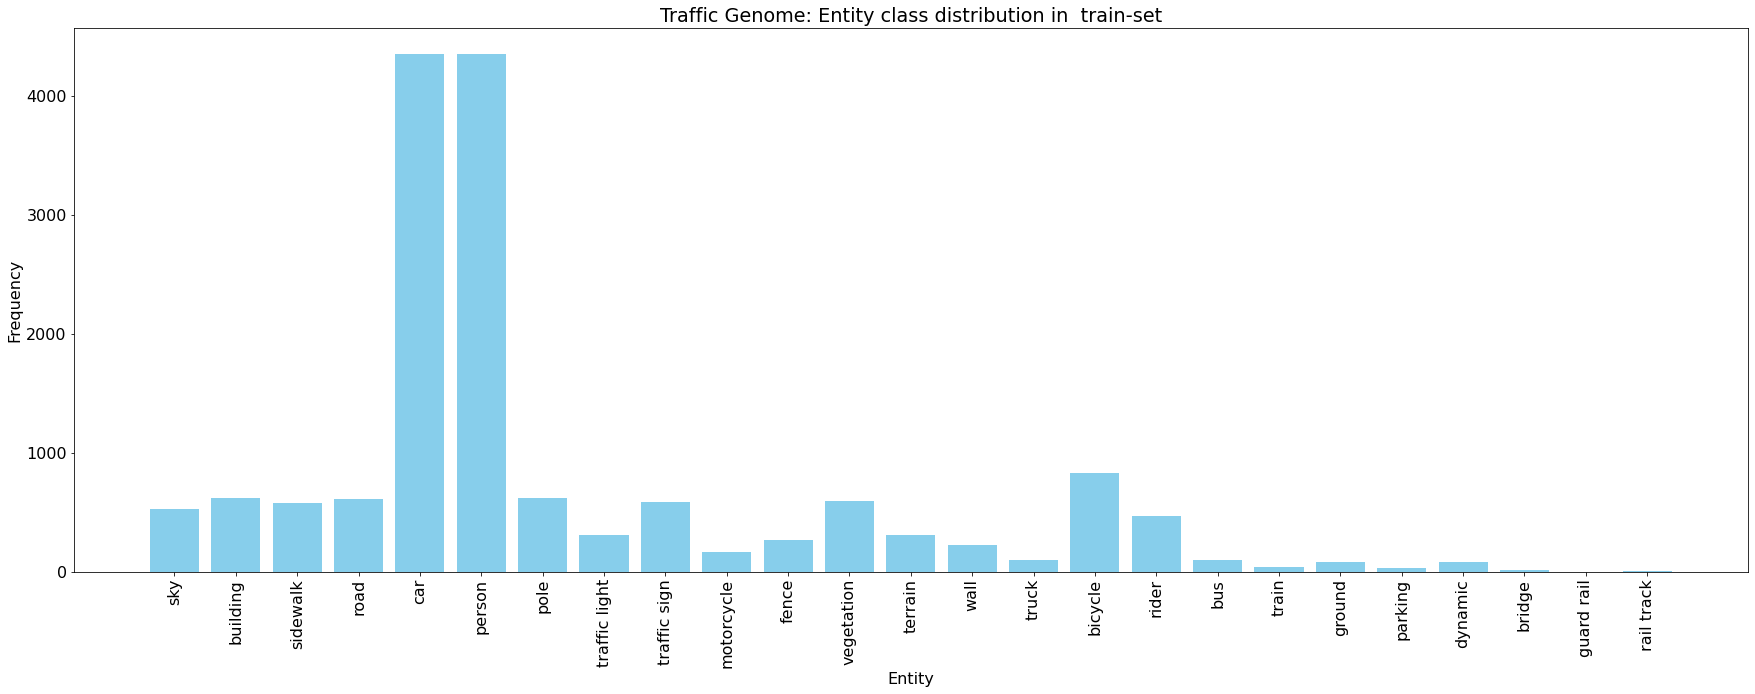

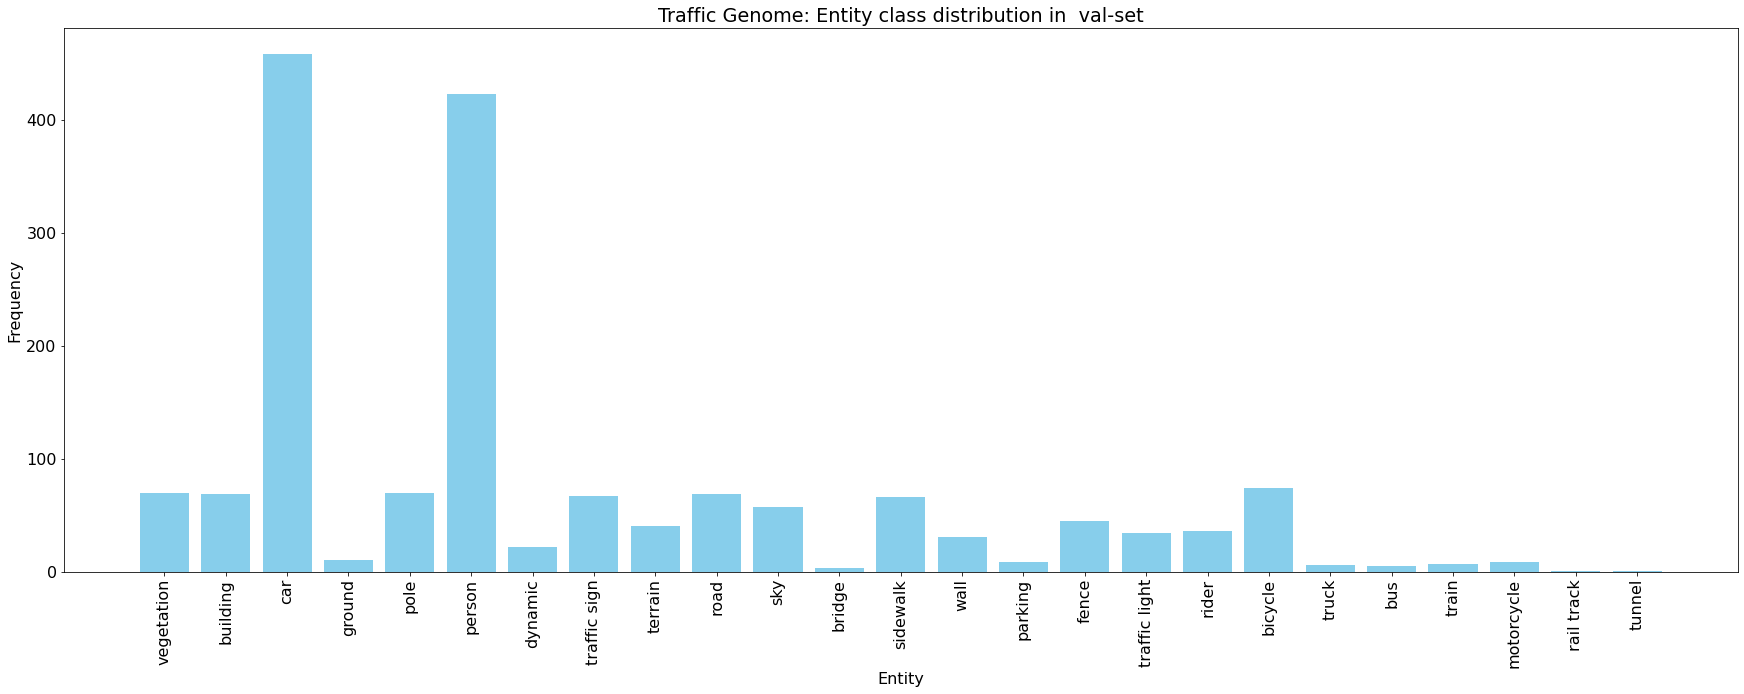

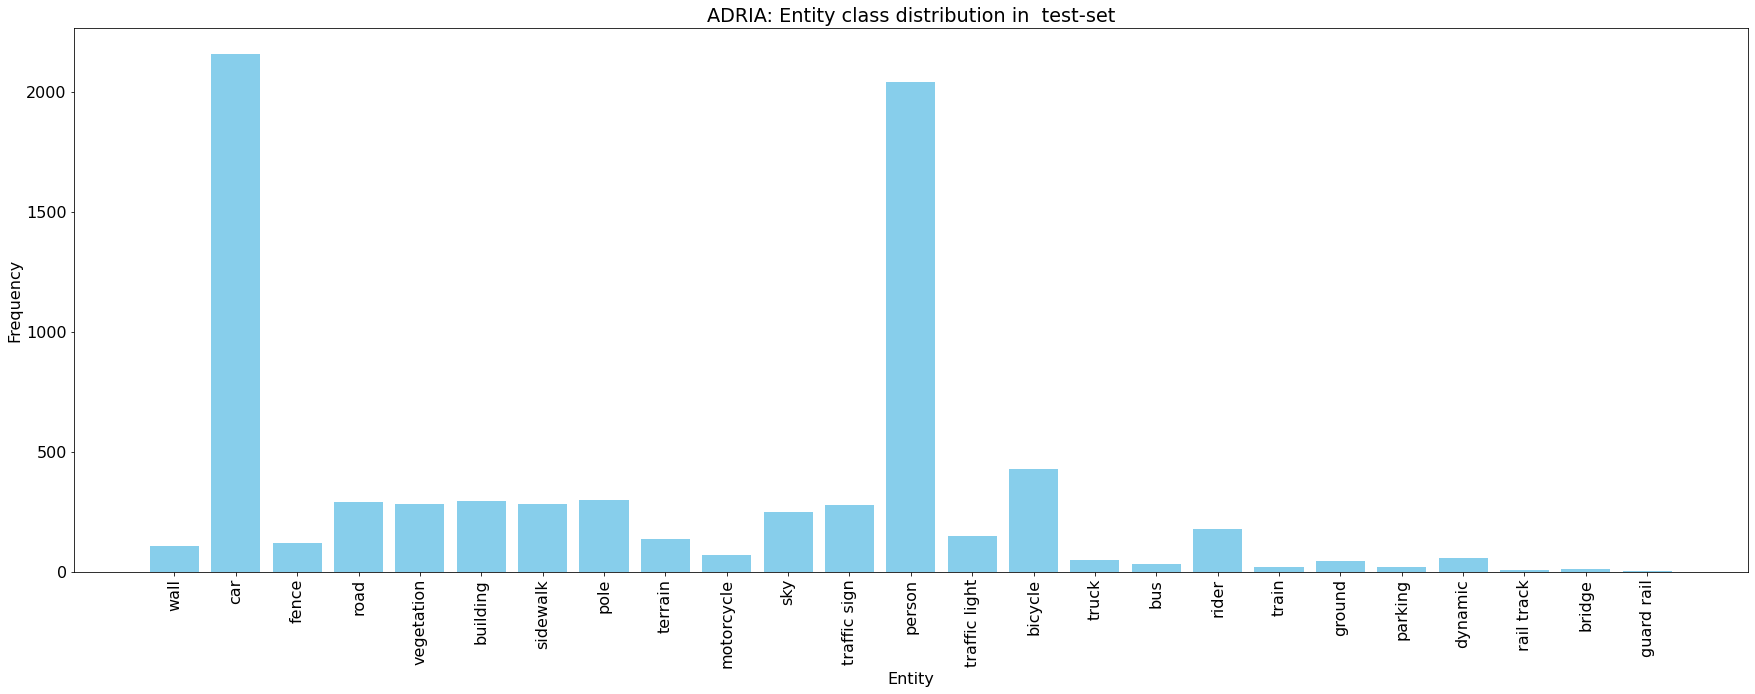

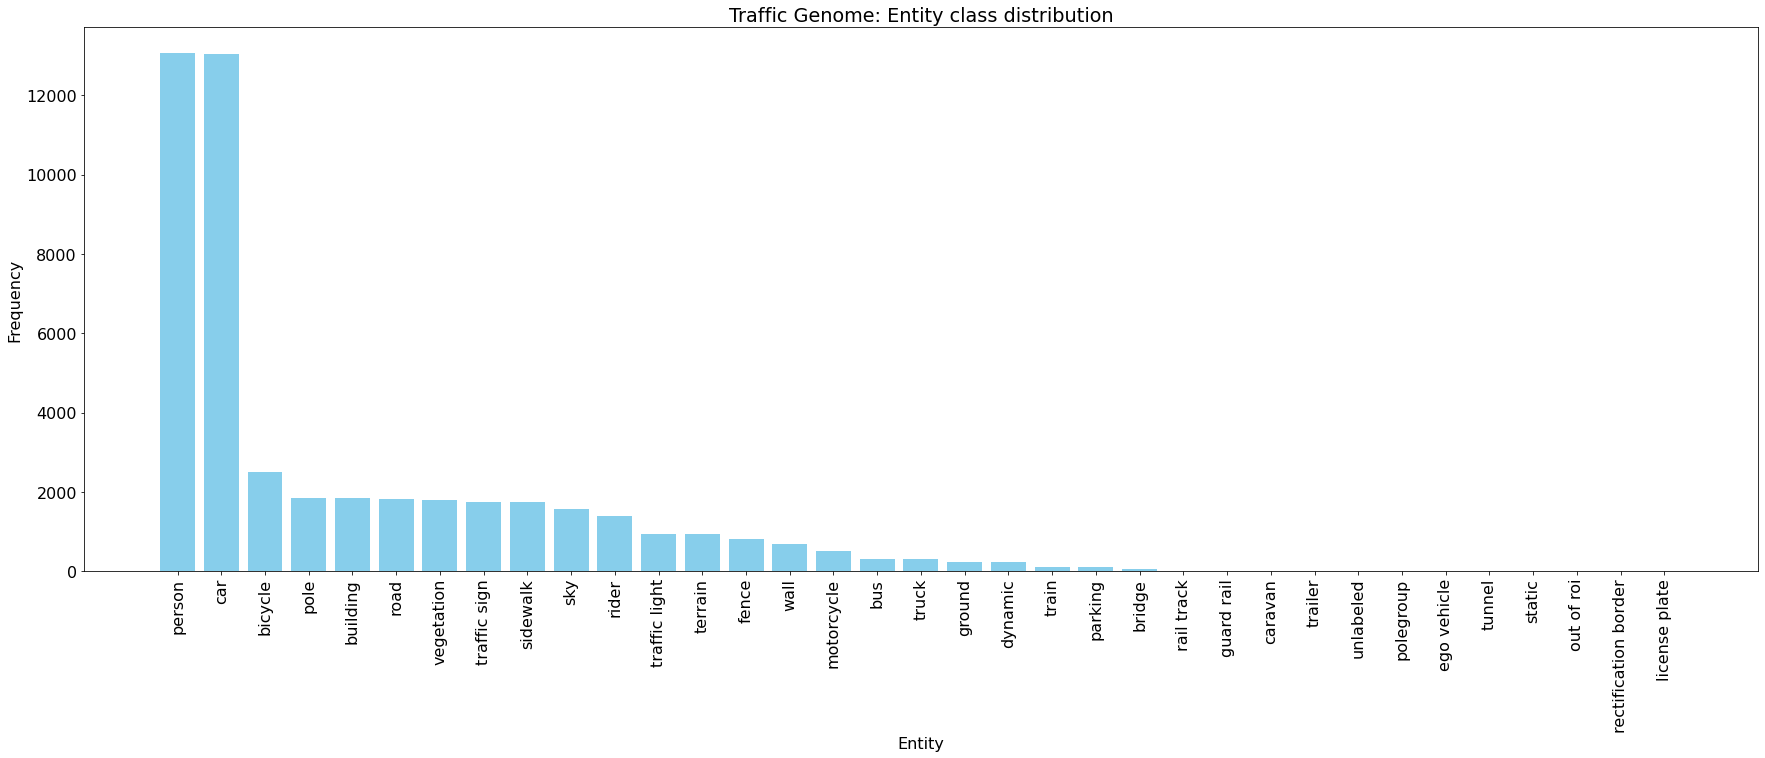

In [138]:

ent_tg_train =  show_distribution('train', type='Entity', dataset='coco_traffic_genome',  dataset_name='Traffic Genome')
ent_tg_val = show_distribution('val',  type='Entity', dataset='coco_traffic_genome', dataset_name='Traffic Genome')
ent_tg_test= show_distribution('test',type='Entity', dataset='coco_traffic_genome')

plot_sort_all(ent_tg_train,ent_tg_val,ent_tg_test, 'Entity', 'Traffic Genome')

Plot comparison with augmentation set

{'parked on': 2252, 'near': 114, 'in front of': 2363, 'above': 29, 'under': 954, 'occluding': 272, 'standing on': 885, 'driving in': 1540, 'in the right of': 1575, 'in the left of': 1993, 'access_in the center of': 43, 'access_in the right of': 105, 'in/on': 512, 'holding': 14, 'on back of': 304, 'walking on': 2515, 'occluded': 113, 'in the front-right of': 167, 'attached to': 46, 'hanging from': 22, 'with': 186, 'access_around': 14, 'growing on': 295, 'in the front-left of': 261, 'access_in the left of': 89, 'riding': 302, 'ride on': 546, 'belonging to': 29, 'between': 34, 'has': 411, 'over_s': 46, 'in the back-right of': 50, 'in the back-left of': 66, 'sitting on': 99, 'carrying': 23, 'covered in': 5, 'using': 2, 'access_in the front of': 69, 'access_between': 375, 'access_in two side of': 27, 'mounted on': 11, 'behind': 29, 'part of': 3, 'against': 3, 'lying on': 3, 'at': 2, 'looking at': 4, 'access_in the back of': 2, 'watching': 1}
18805
{'parked on': 2403, 'near': 539, 'in front 

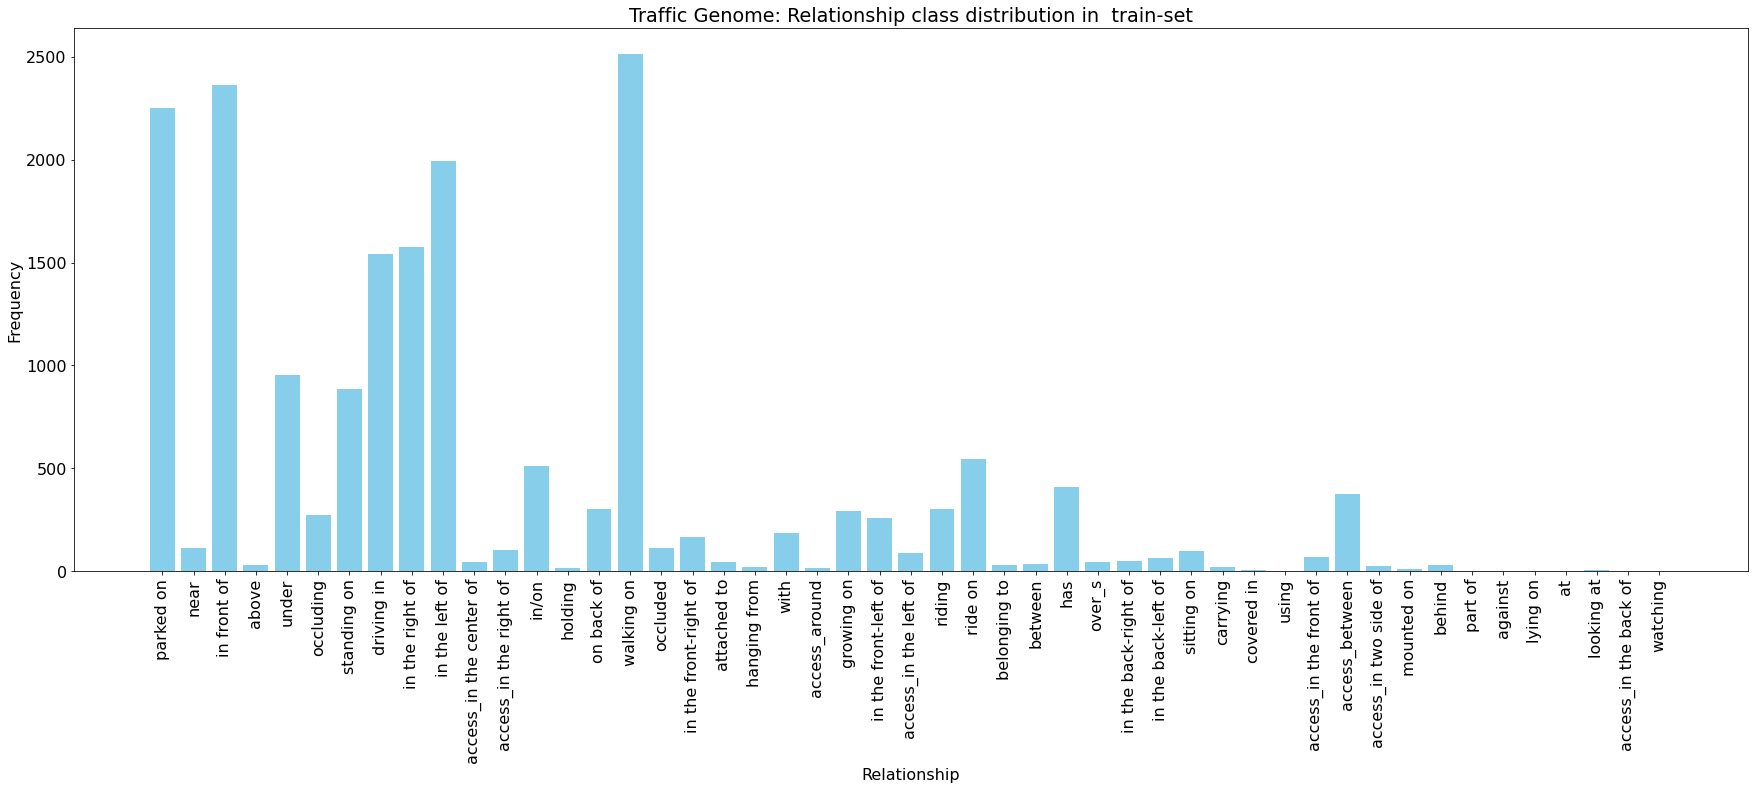

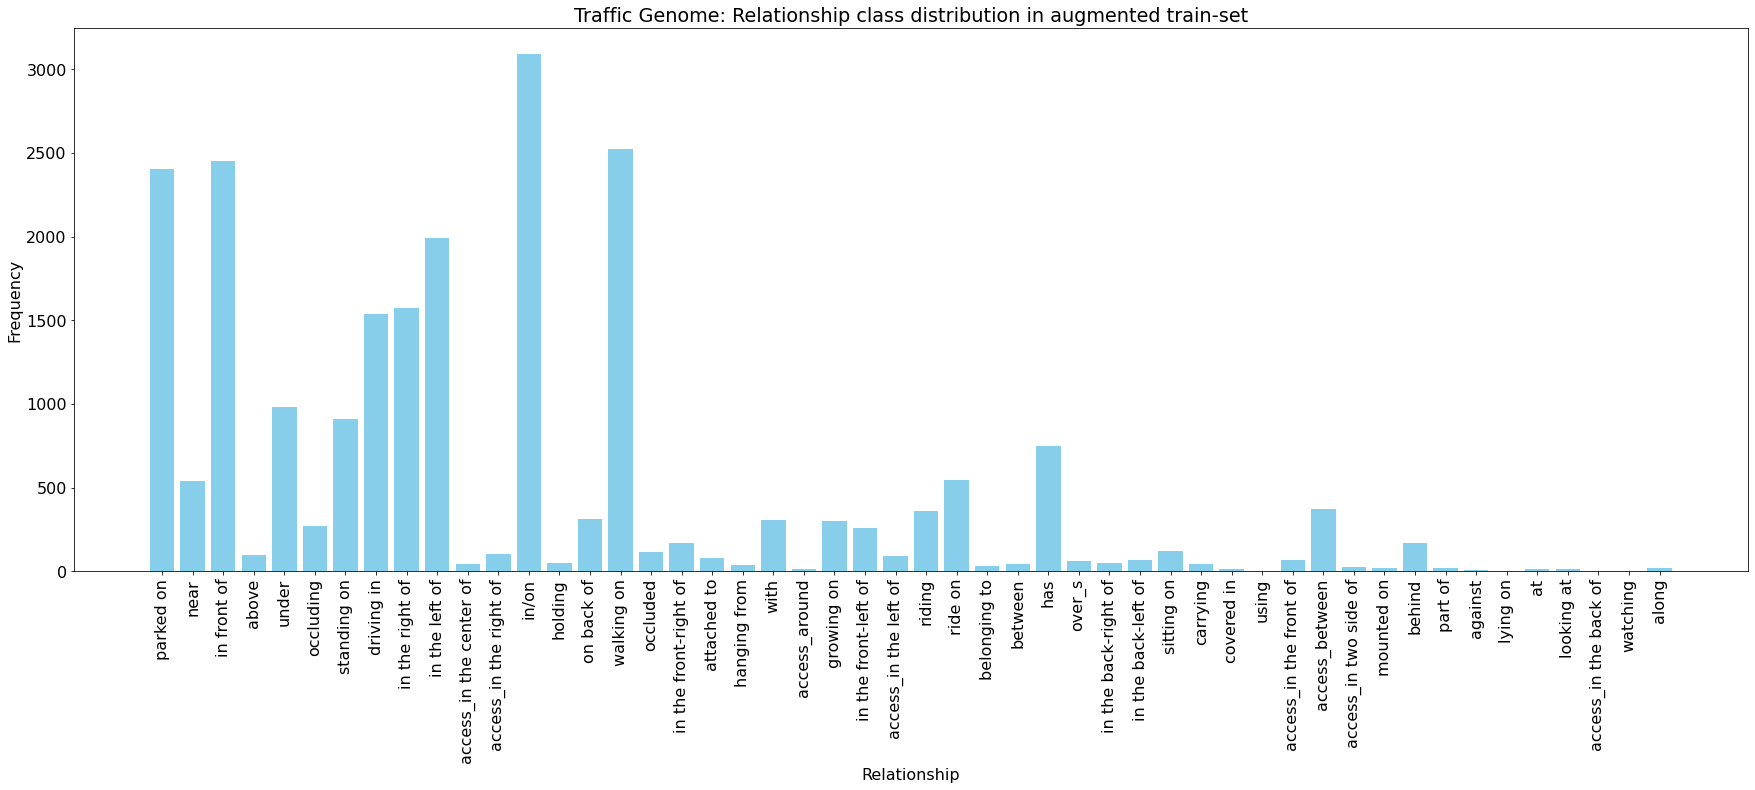

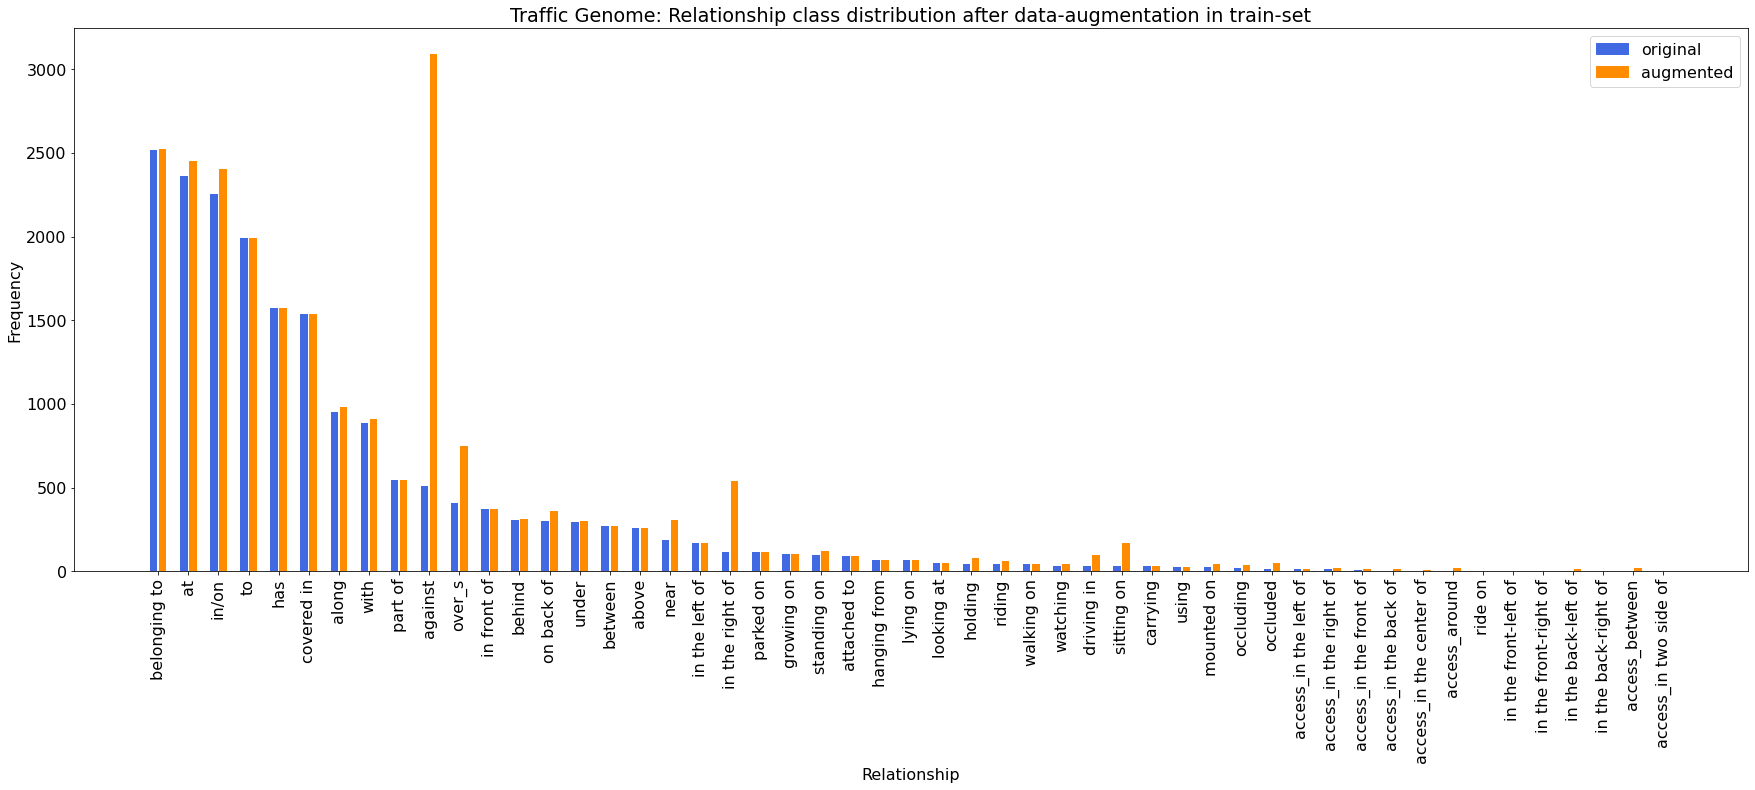

In [269]:
rel_tg_train =  show_distribution('train', type='Relationship', dataset='coco_traffic_genome',  dataset_name='Traffic Genome')
rel_aug_train =  show_distribution('train', type='Relationship', dataset='coco_mix_dataset',  dataset_name='Traffic Genome', augmented=True)

plot_sort_cmp(rel_tg_train, rel_aug_train, 'Relationship', dataset_name='Traffic Genome', set_name='train' )

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
['holding' 'access_around' 'mounted on' 'covered in' 'looking at'
 'against' 'part of' 'lying on' 'using' 'access_in the back of' 'at'
 'watching' 'along' 'to']


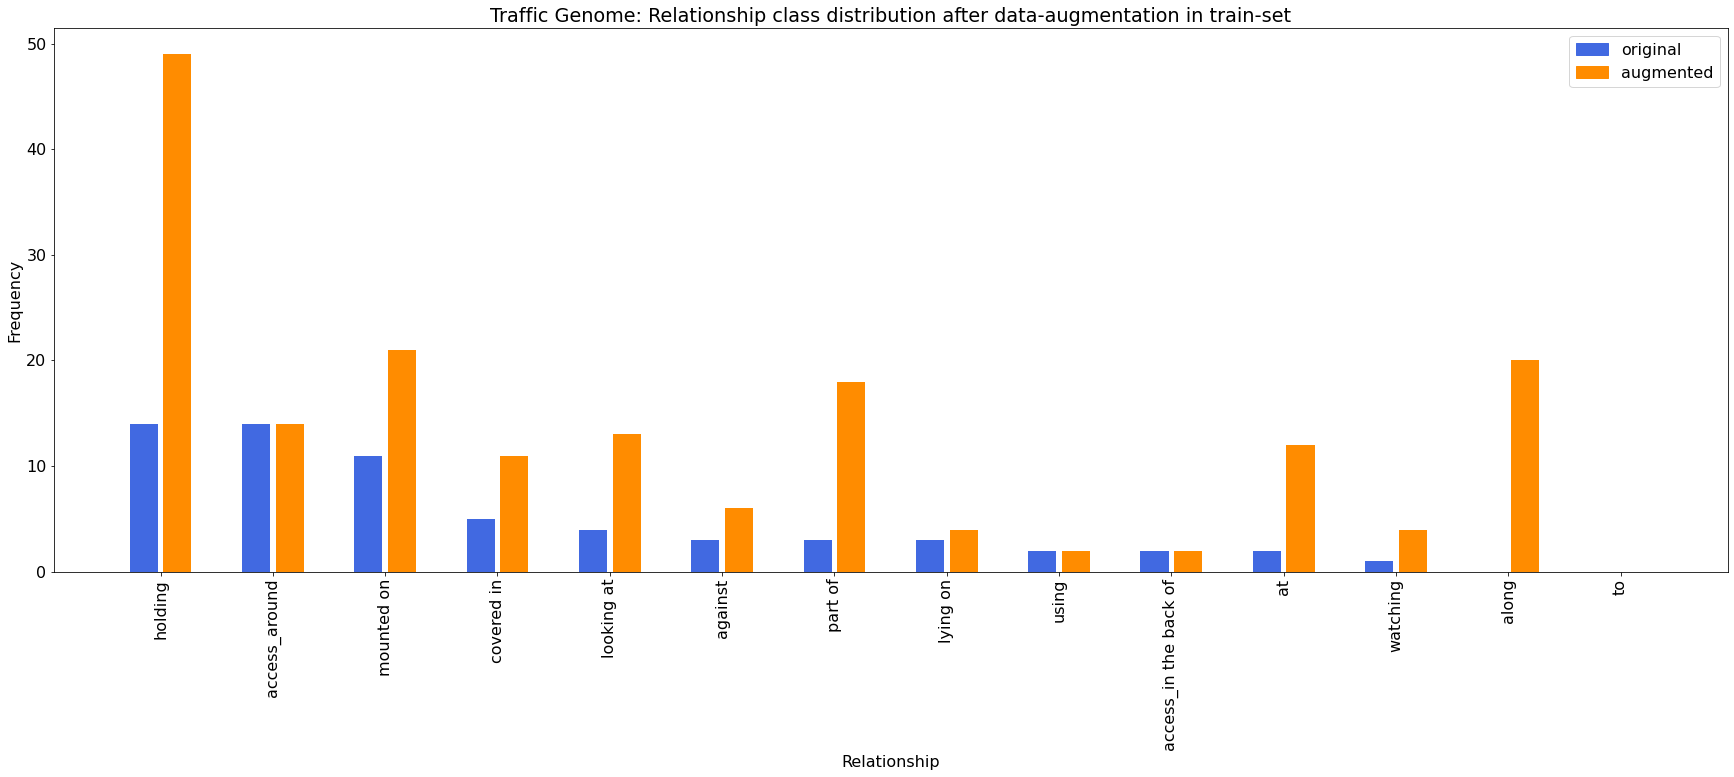

In [267]:
# rel_tg_train =  show_distribution('train', type='Relationship', dataset='coco_traffic_genome',  dataset_name='Traffic Genome')
# rel_aug_train =  show_distribution('train', type='Relationship', dataset='coco_mix_dataset',  dataset_name='Traffic Genome', augmented=True)

plot_sort_cmp(rel_tg_train, rel_aug_train, 'Relationship', dataset_name='Traffic Genome', set_name='train', thresh=20 )

{'sky': 524, 'building': 616, 'sidewalk': 581, 'road': 608, 'car': 4352, 'person': 4354, 'pole': 617, 'traffic light': 312, 'traffic sign': 583, 'motorcycle': 167, 'fence': 266, 'vegetation': 594, 'terrain': 308, 'wall': 225, 'truck': 100, 'bicycle': 833, 'rider': 465, 'bus': 101, 'train': 37, 'ground': 80, 'parking': 31, 'dynamic': 80, 'bridge': 16, 'guard rail': 1, 'rail track': 4}
15855
{'sky': 524, 'building': 616, 'sidewalk': 2259, 'road': 3193, 'car': 9217, 'person': 4354, 'pole': 617, 'traffic light': 312, 'traffic sign': 583, 'motorcycle': 1304, 'fence': 266, 'vegetation': 594, 'terrain': 308, 'wall': 225, 'truck': 808, 'bicycle': 1983, 'rider': 465, 'bus': 1158, 'train': 811, 'ground': 80, 'parking': 31, 'dynamic': 80, 'bridge': 16, 'guard rail': 1, 'rail track': 4, 'static': 397}
30206
[ 0  1  2  3  4  5  6  7  8  9 10 11 12]
['bridge' 'rail track' 'guard rail' 'caravan' 'trailer' 'unlabeled'
 'polegroup' 'ego vehicle' 'tunnel' 'static' 'out of roi'
 'rectification border' 'l

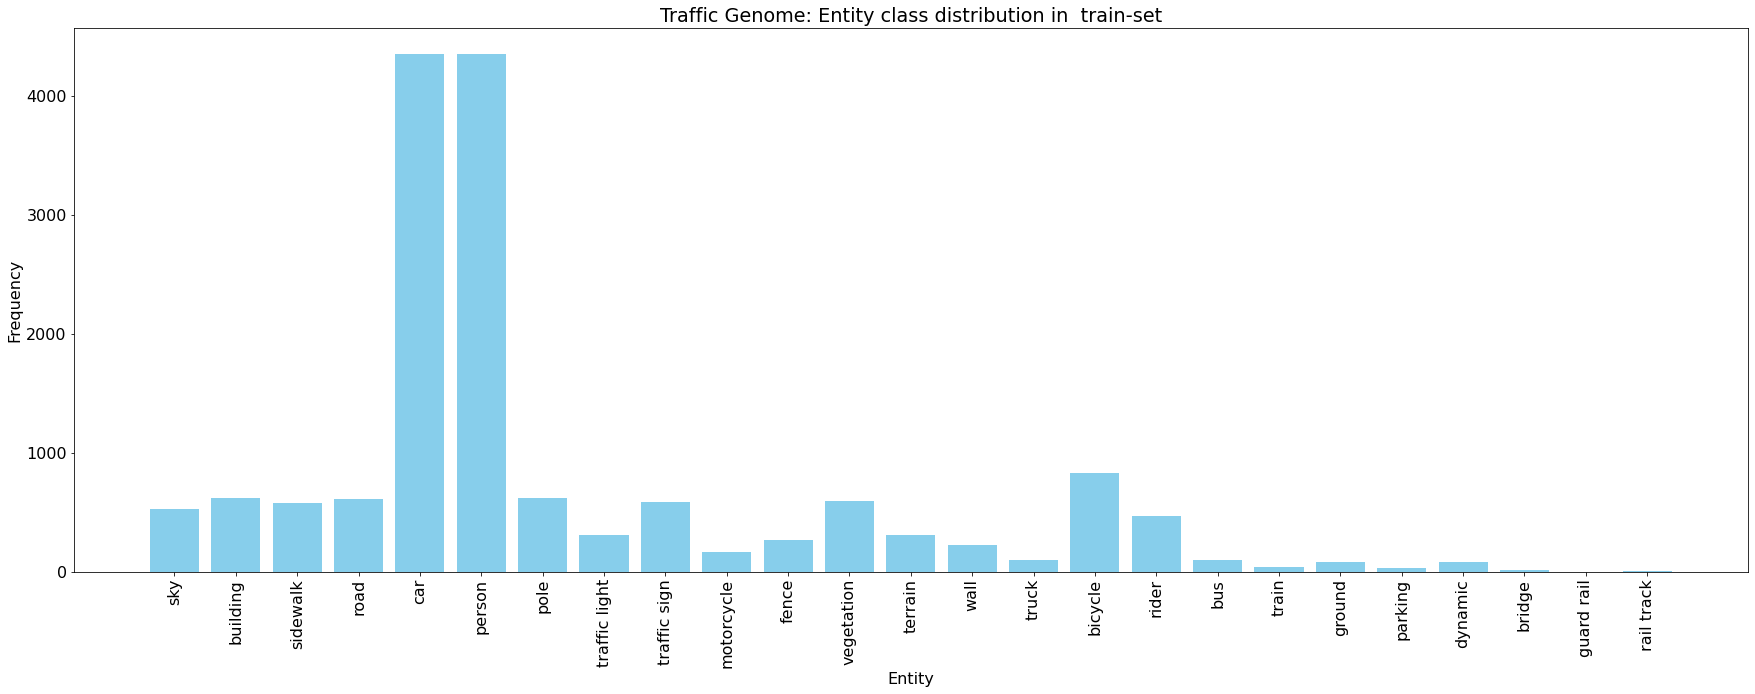

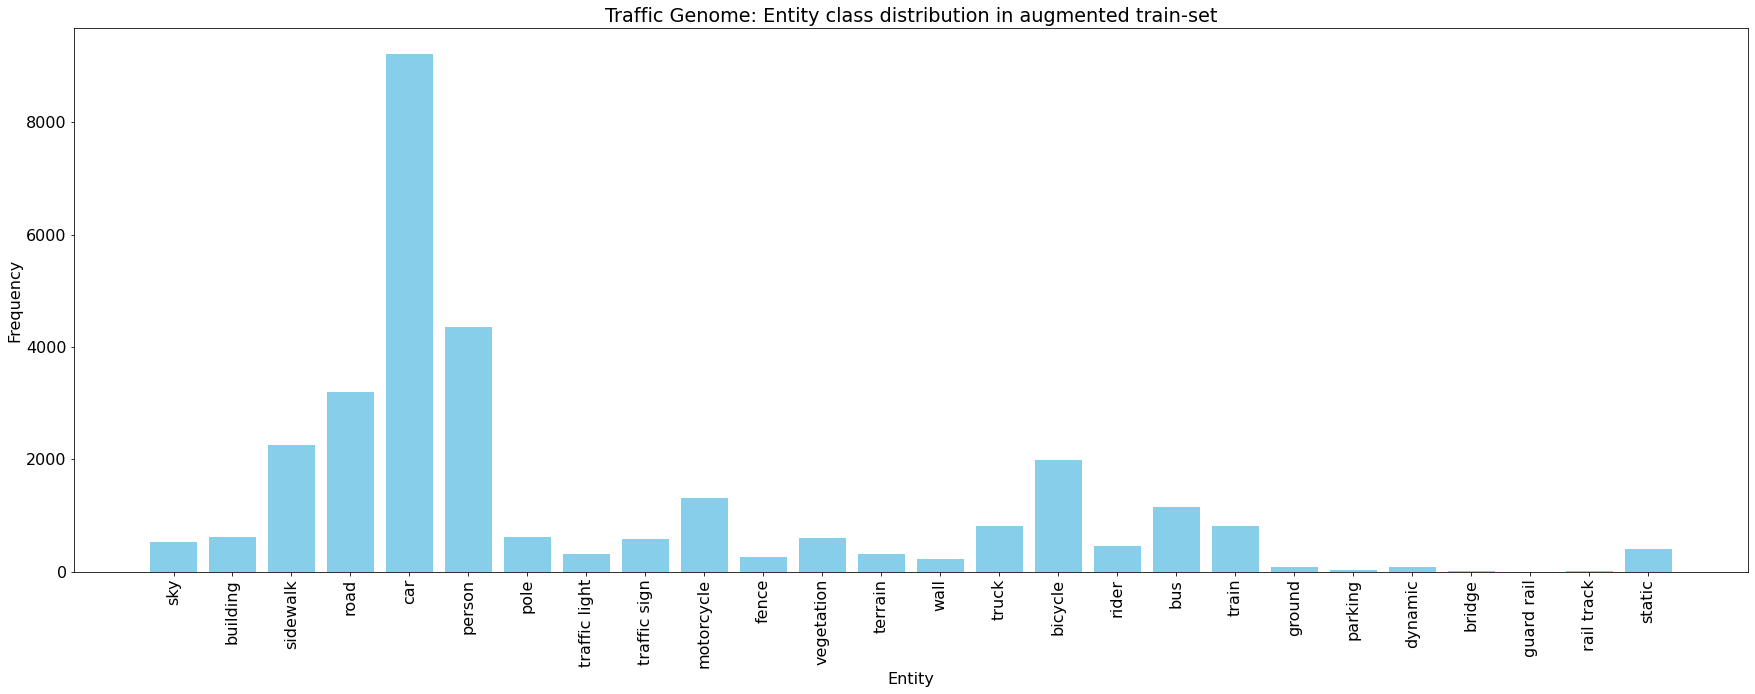

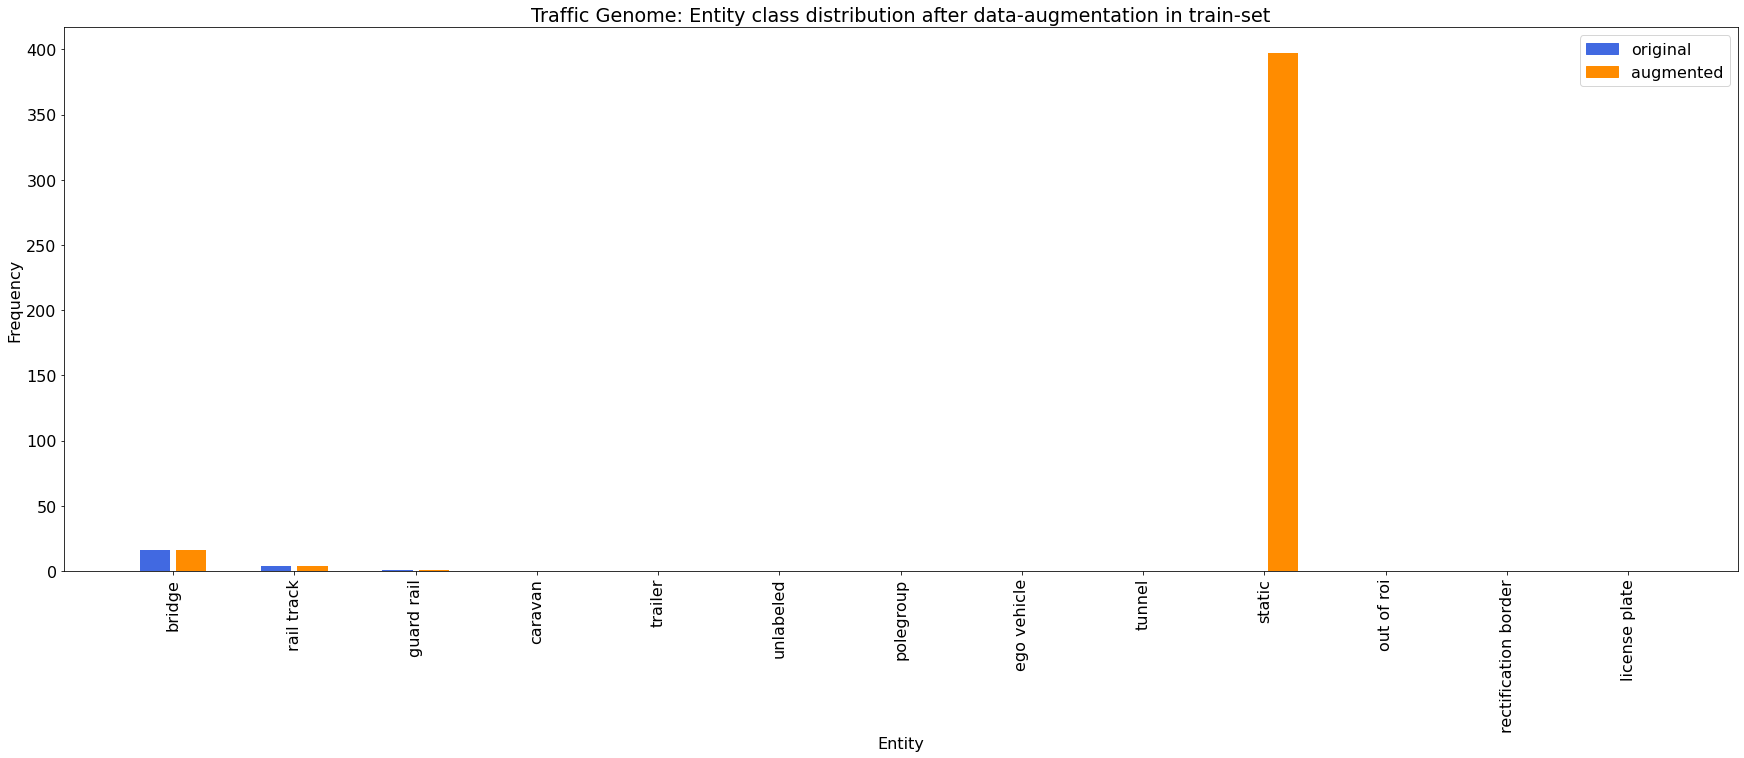

In [270]:
ent_tg_train =  show_distribution('train', type='Entity', dataset='coco_traffic_genome',  dataset_name='Traffic Genome')
ent_aug_train =  show_distribution('train', type='Entity', dataset='coco_mix_dataset',  dataset_name='Traffic Genome', augmented=True)

plot_sort_cmp(ent_tg_train, ent_aug_train, 'Entity', dataset_name='Traffic Genome', set_name='train', thresh=20 )

{'access_in the right of': 36, 'parked on': 1208, 'in the left of': 1008, 'has': 219, 'standing on': 520, 'in front of': 1092, 'occluded': 35, 'under': 349, 'access_in the center of': 17, 'access_around': 6, 'in/on': 204, 'driving in': 577, 'walking on': 1169, 'near': 39, 'occluding': 130, 'on back of': 118, 'in the right of': 711, 'hanging from': 8, 'belonging to': 12, 'in the back-left of': 26, 'in the front-left of': 106, 'access_in the front of': 38, 'growing on': 146, 'in the front-right of': 75, 'in the back-right of': 26, 'with': 92, 'ride on': 220, 'riding': 102, 'access_in the left of': 35, 'attached to': 26, 'access_between': 194, 'carrying': 7, 'behind': 15, 'sitting on': 66, 'access_in two side of': 16, 'along': 2, 'watching': 1, 'above': 10, 'part of': 1, 'holding': 9, 'over_s': 31, 'to': 2, 'between': 12}
643


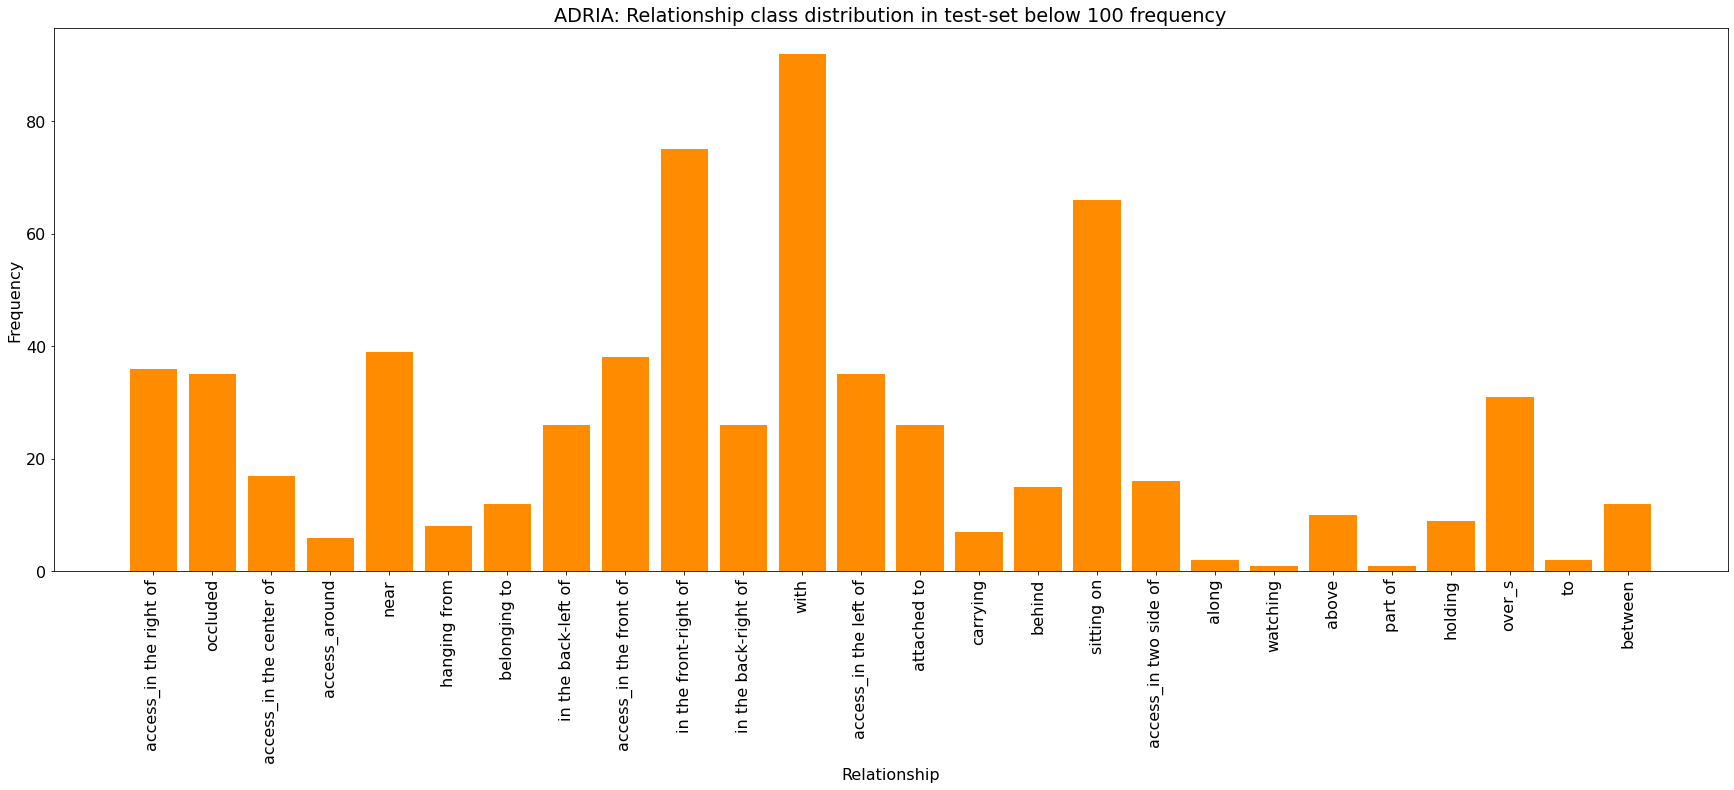

In [60]:
rel_tg_test= show_distribution('test', thresh=100, type='Relationship', dataset='coco_traffic_genome')


#### ADRIA distribution

Entity distribution

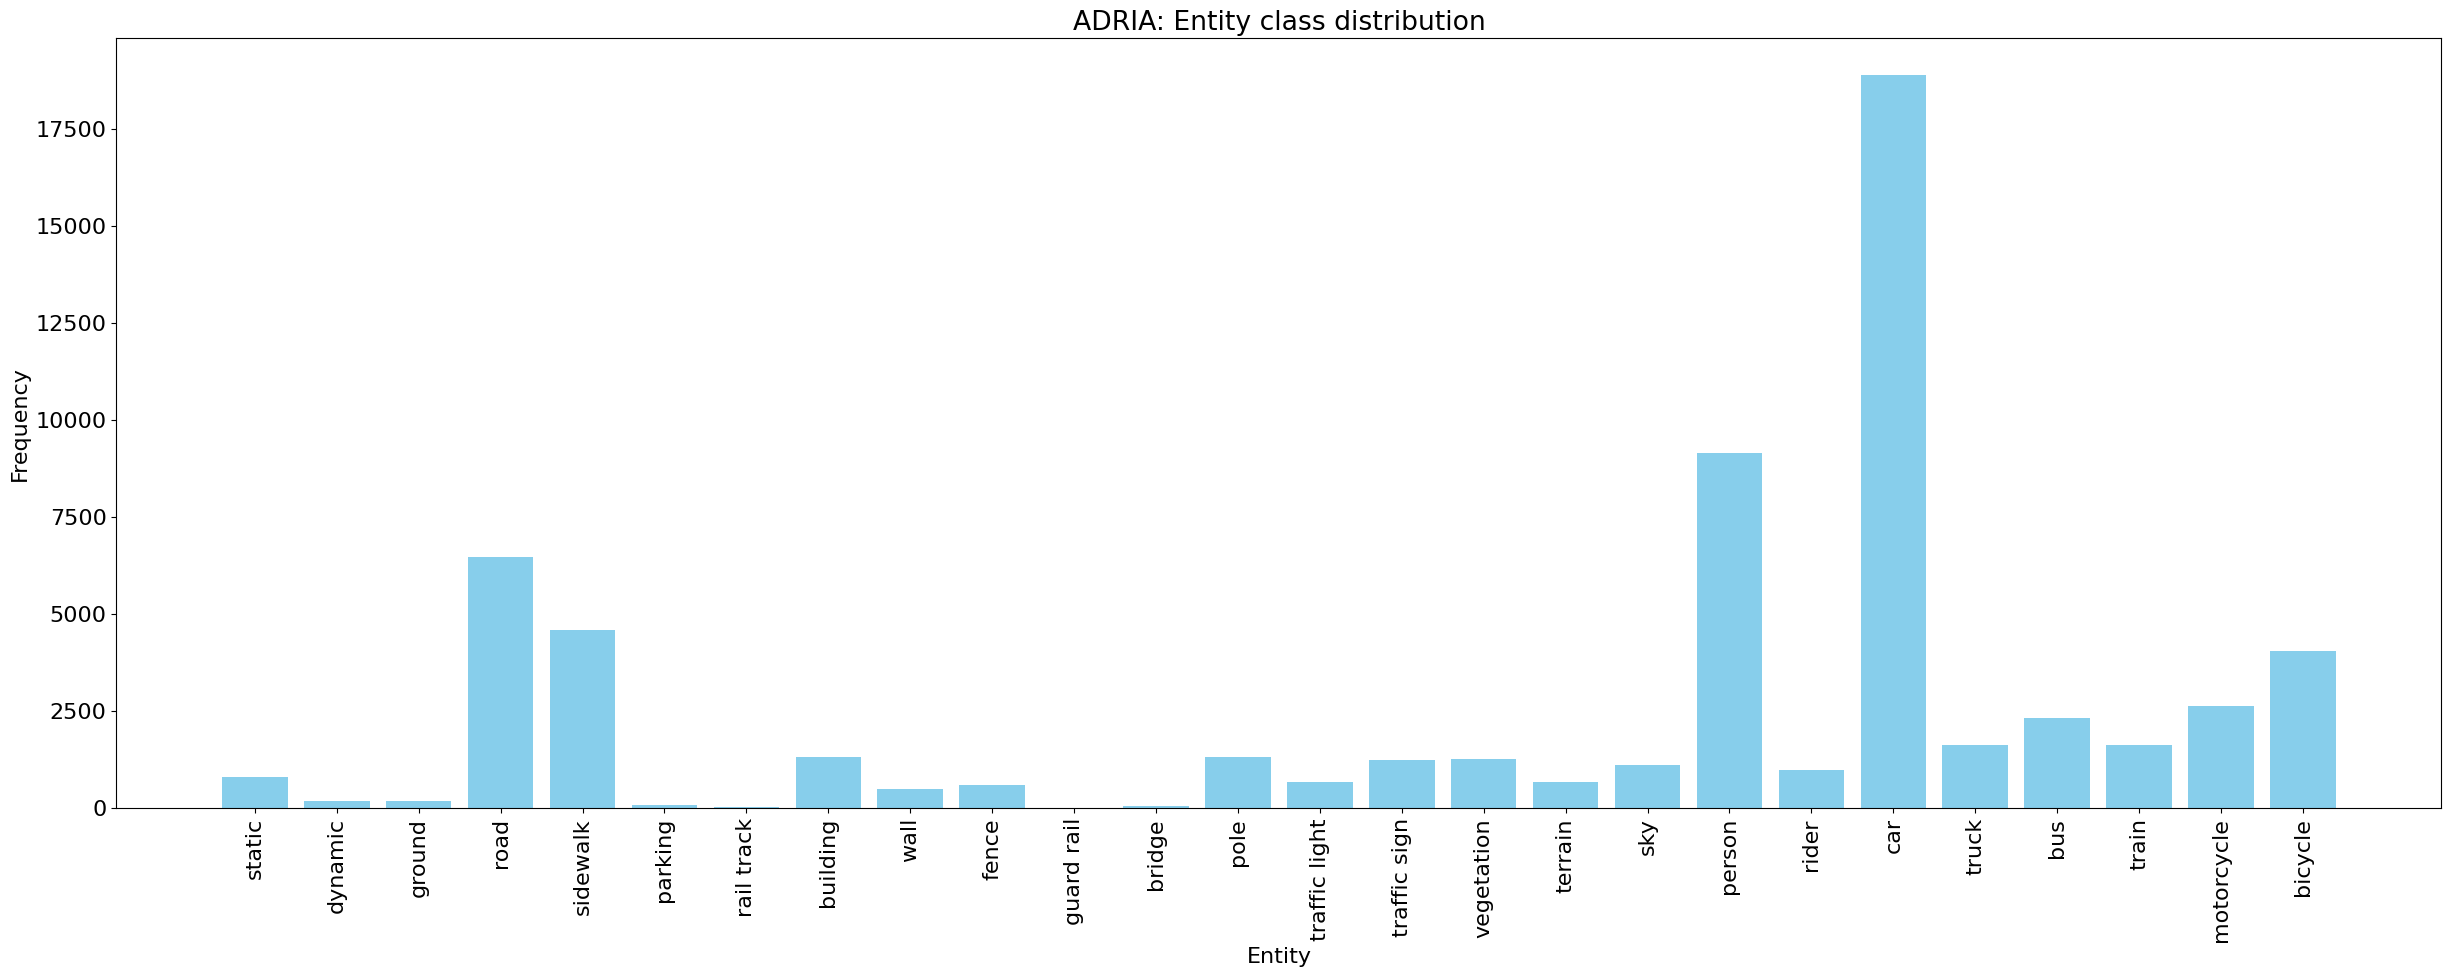

In [ ]:
df = pd.read_csv('adria_label_stats.csv', header=None)

plt.rcParams.update({'font.size': 16})   
plt.figure(figsize=(30, 10))  # Optional: Set the figure size

# Create the bar plot
plt.bar(df[0], df[1], color='skyblue')

# You can set the x-axis labels if needed (e.g., numerical indexes)
plt.xticks(range(len(df)))

# Labeling and customization
plt.xlabel('Entity')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Optional: Rotate x-axis labels for better readability


plt.title('ADRIA: Entity class distribution')
plt.show()


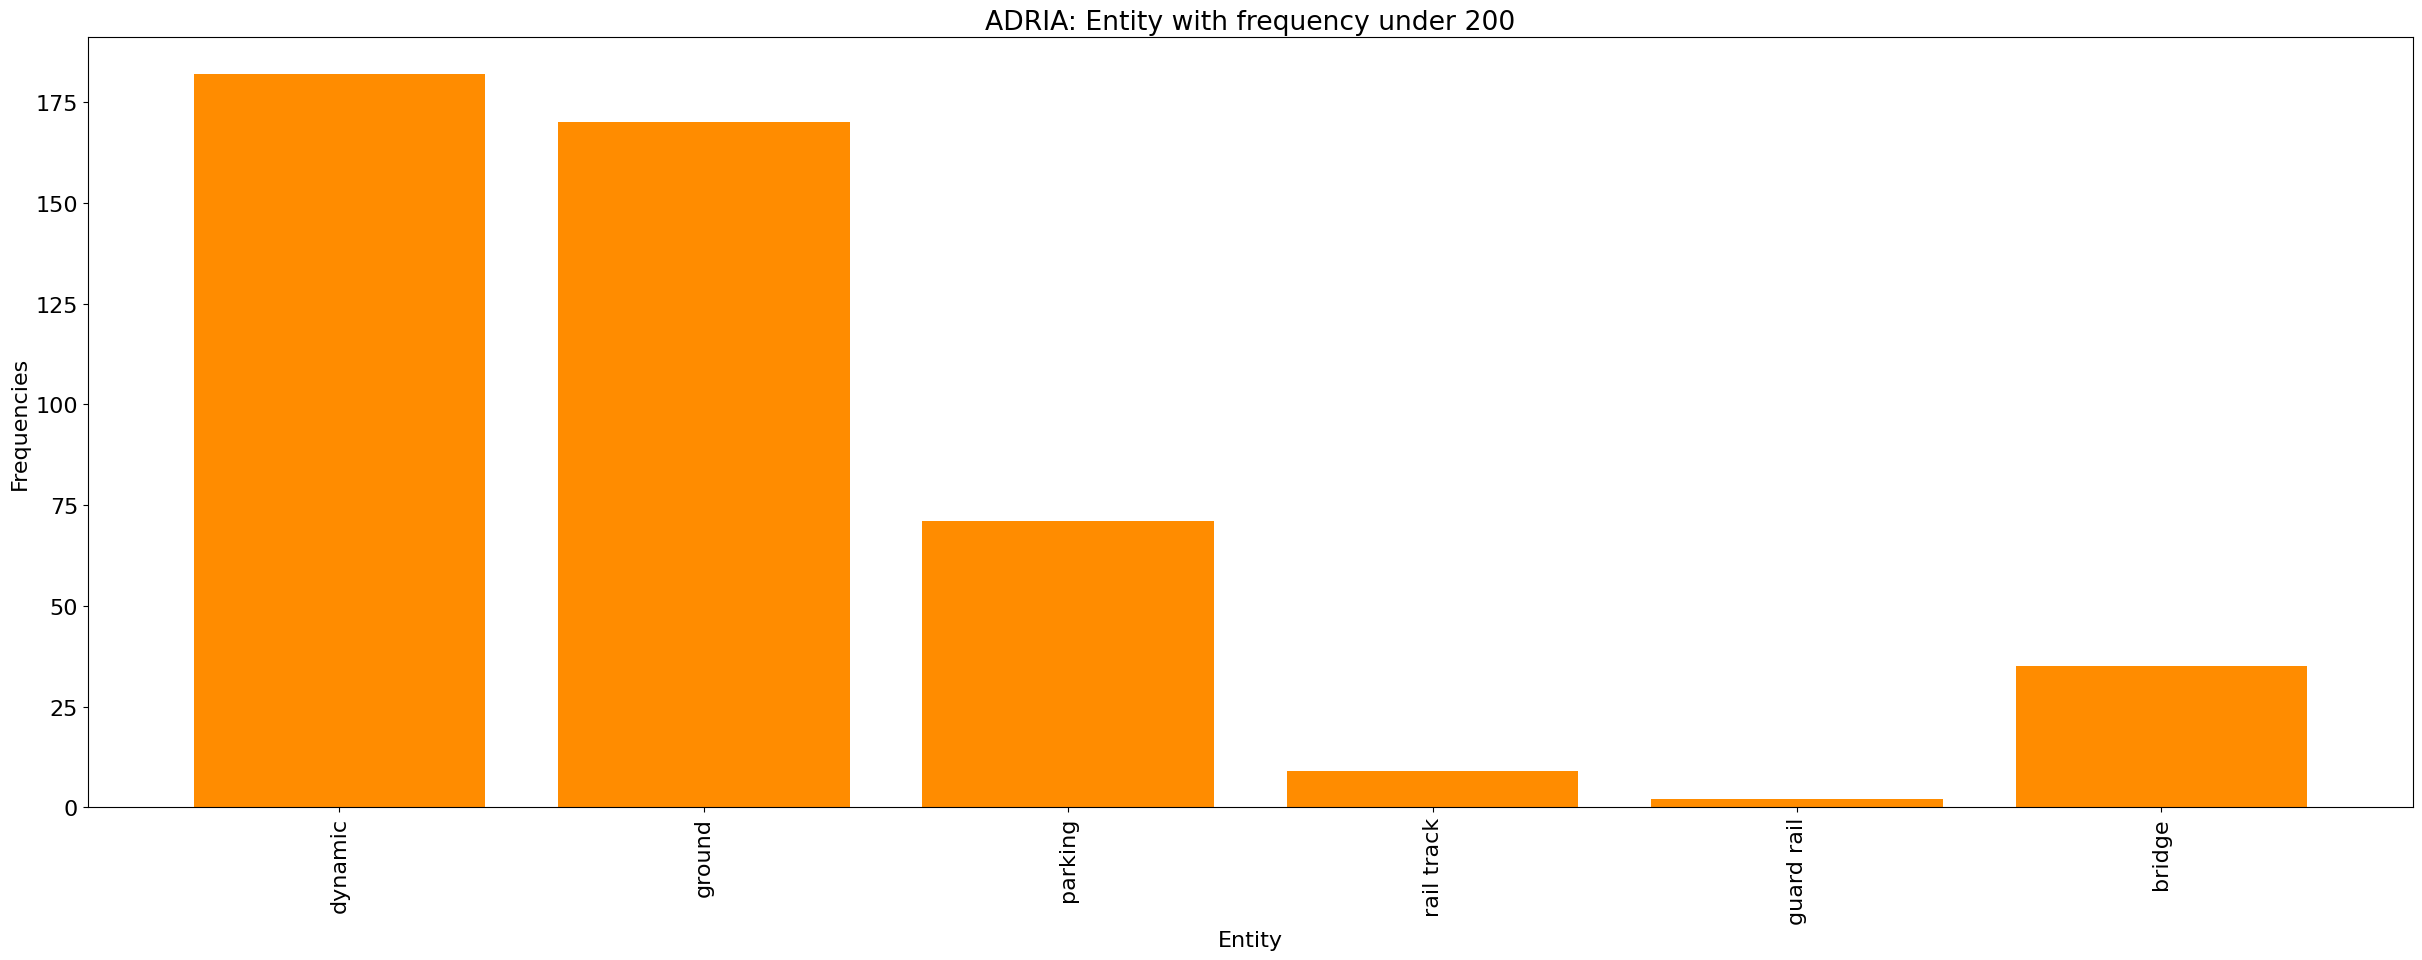

In [ ]:
thresh = 200
df_low_fr = df[df[1] < thresh]

plt.figure(figsize=(30, 10))  # Optional: Set the figure size

plt.bar(df_low_fr[0], df_low_fr[1], color='darkorange')  # Create the bar chart

plt.xlabel('Entity')  # Label for the x-axis
plt.ylabel('Frequencies')  # Label for the y-axis

plt.title(f'ADRIA: Entity with frequency under {thresh}')  # Title of the histogram

plt.xticks(rotation=90)  # Optional: Rotate x-axis labels for better readability

plt.savefig('adria_low_fr_entity_distr.jpg',dpi=300, bbox_inches='tight' )
plt.show()  # Display the histogram

Relationship distribution

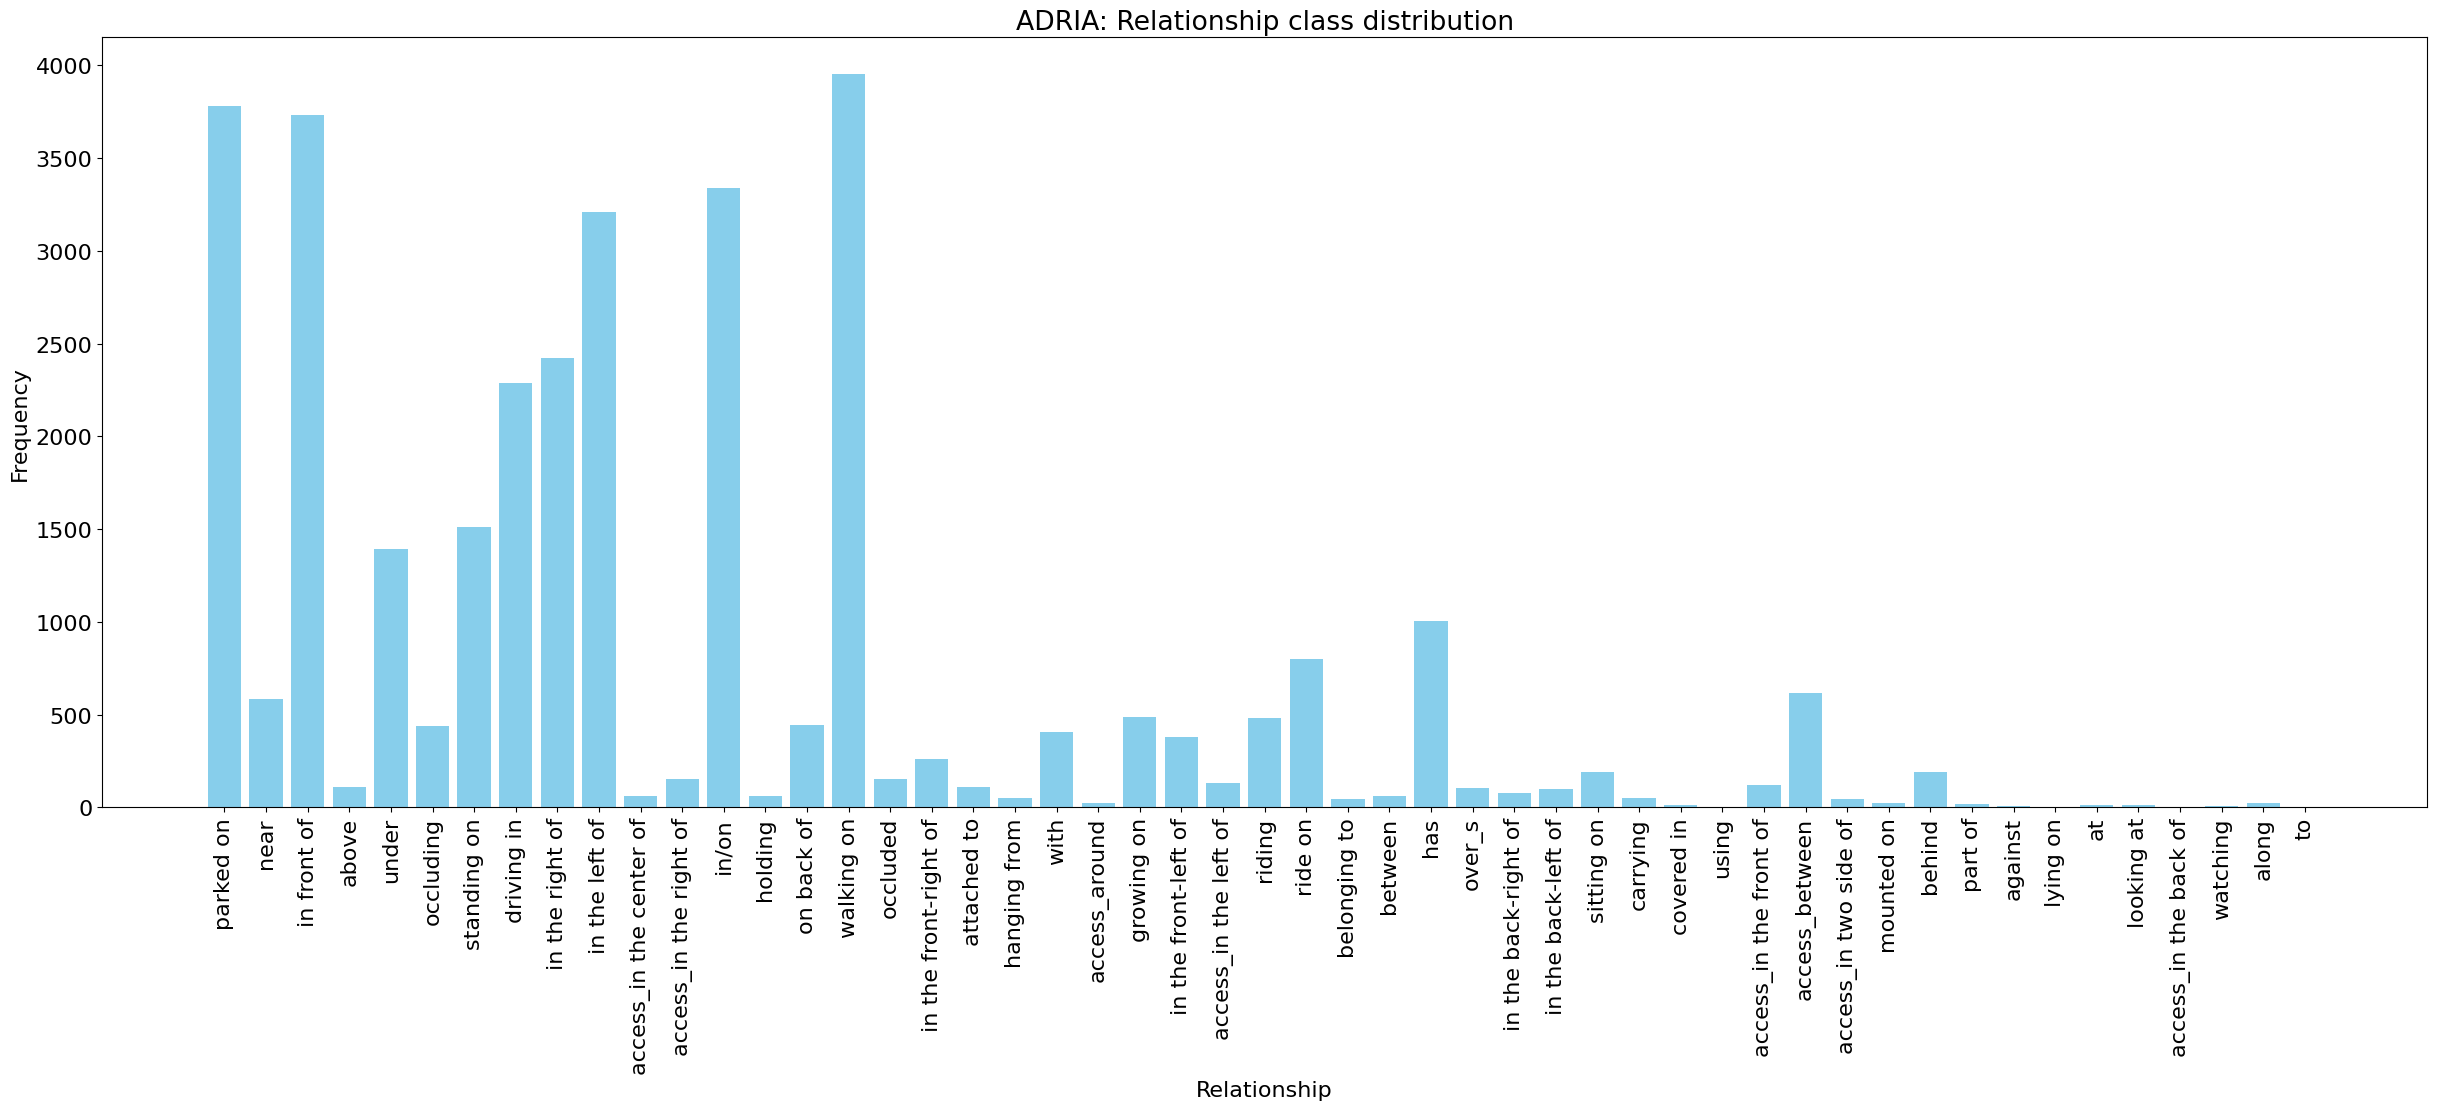

In [ ]:
df_r = pd.read_csv('adria_rel_stats.csv', header=None)

plt.rcParams.update({'font.size': 16})   
plt.figure(figsize=(30, 10))  # Optional: Set the figure size

# Create the bar plot
plt.bar(df_r[0], df_r[1], color='skyblue')

# You can set the x-axis labels if needed (e.g., numerical indexes)
plt.xticks(range(len(df_r)))

# Labeling and customization
plt.xlabel('Relationship')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Optional: Rotate x-axis labels for better readability

plt.title('ADRIA: Relationship class distribution')

plt.show()

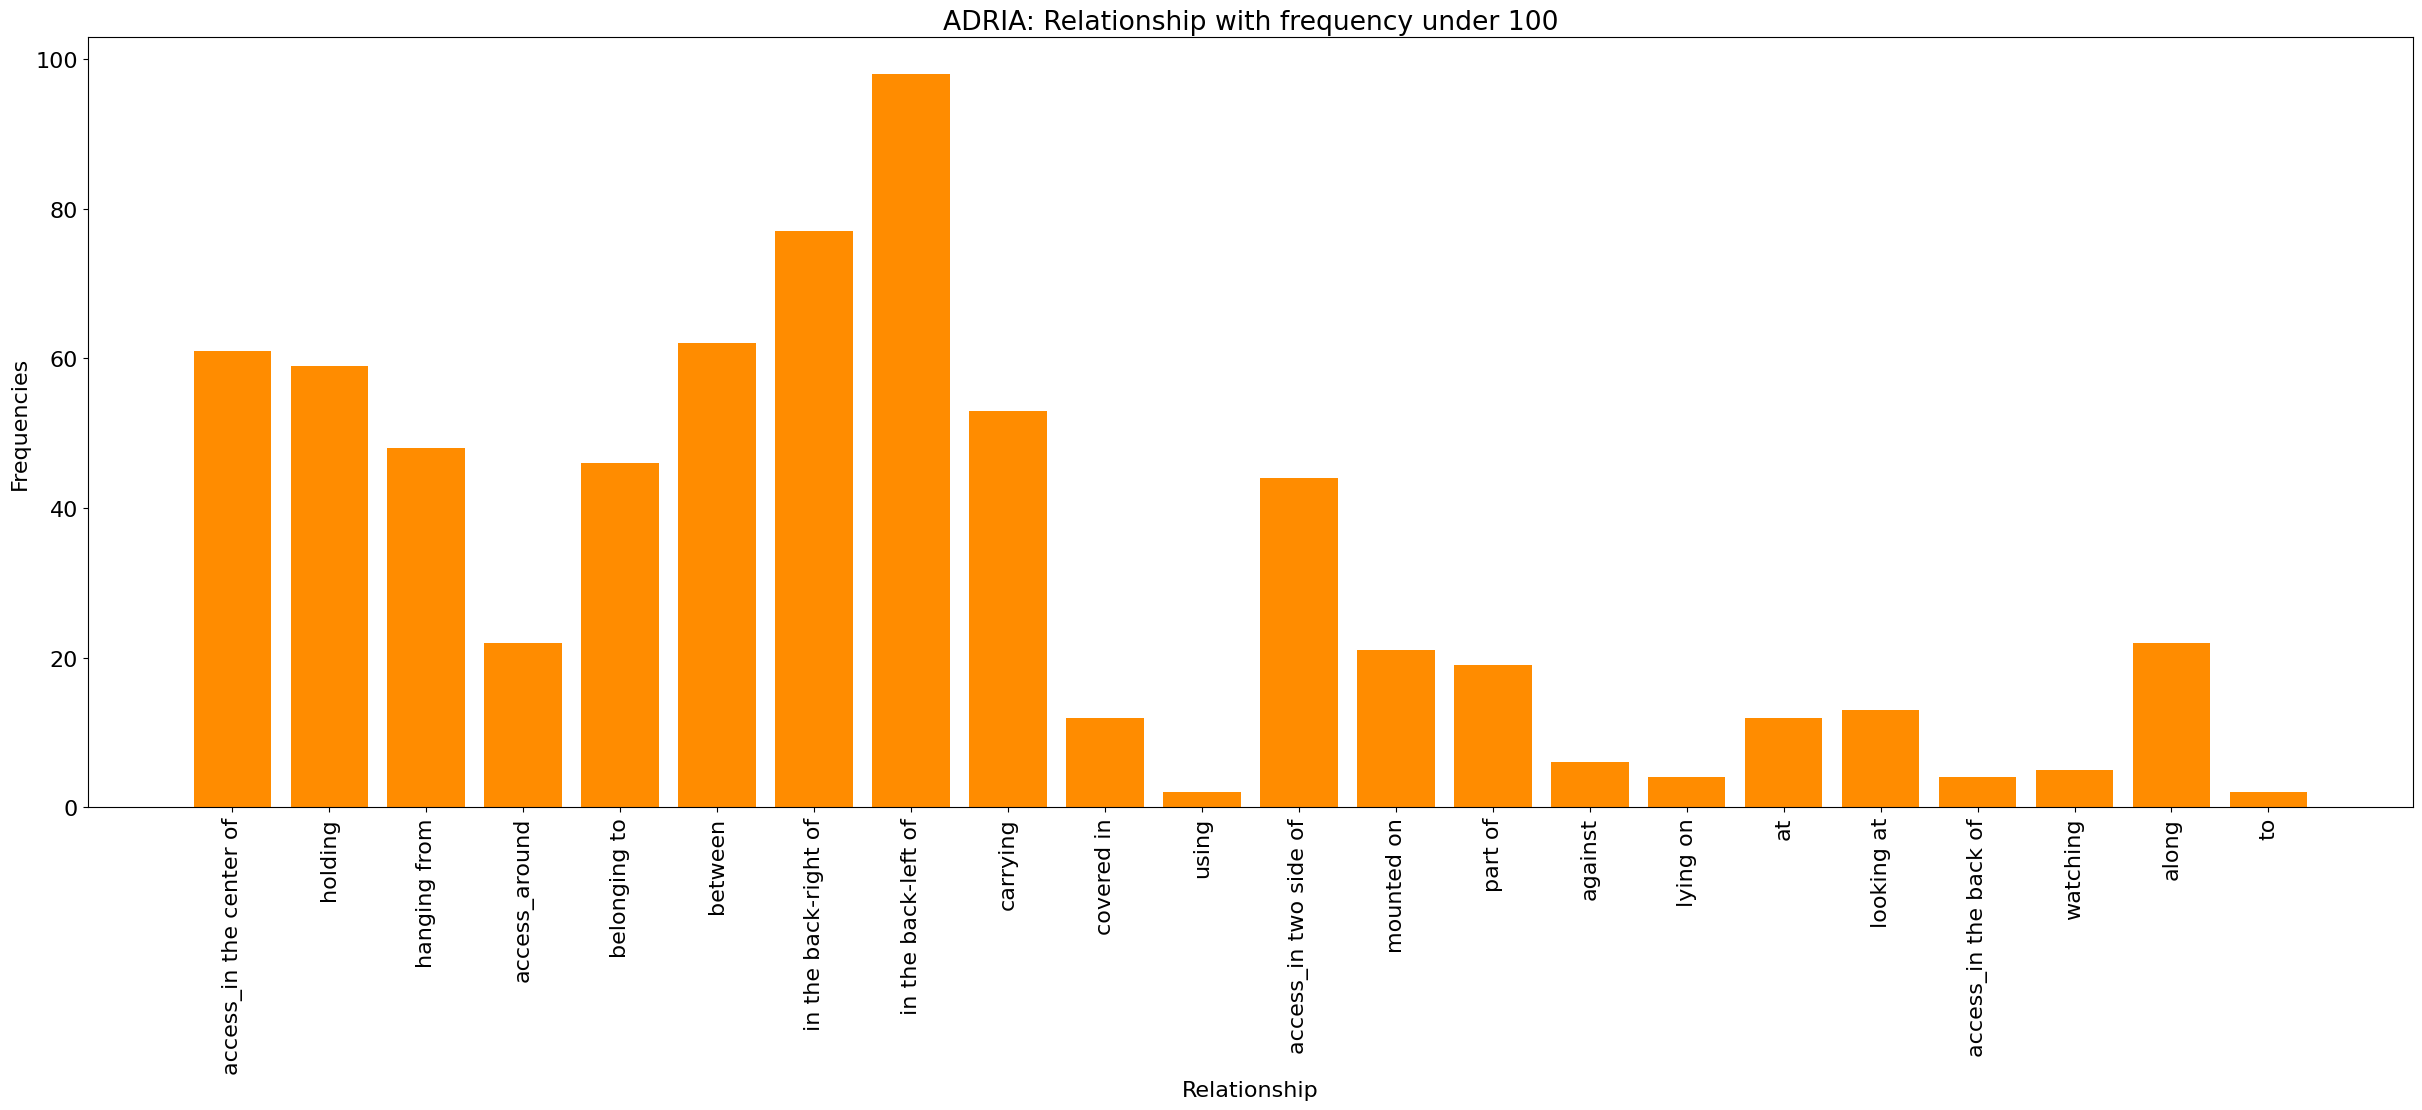

In [ ]:
thresh = 100
df_low_fr = df_r[df_r[1] < thresh]

plt.rcParams.update({'font.size': 16})   
plt.figure(figsize=(30, 10))  # Optional: Set the figure size

plt.bar(df_low_fr[0], df_low_fr[1], color='darkorange')  # Create the bar chart

plt.xlabel('Relationship')  # Label for the x-axis
plt.ylabel('Frequencies')  # Label for the y-axis

plt.title(f'ADRIA: Relationship with frequency under {thresh}')  # Title of the histogram

plt.xticks(rotation=90)  # Optional: Rotate x-axis labels for better readability

plt.savefig('adria_low_fr_rel_distr.jpg',dpi=300, bbox_inches='tight' )
plt.show()  # Display the histogram

Entity distribution in different set 

In [ ]:

def show_distribution(set_name:str, thresh:Optional[int] = None, type:str='Entity') ->None:
    
    assert type=='Entity' or type=='Relationship', 'only enetity and relationship are admissible'
    
    freq_set = { }


    if type=='Entity':
        with open(f'adria_dataset/{set_name}.json') as f:
            set_data = json.load(f)
            
        # map category
        cat_map =  { int(c['id']): c['name']  for c in  set_data['categories'] }

        for ann  in set_data['annotations']:
            
            cat_id = cat_map[ann['category_id']]
            if cat_id not in freq_set.keys():
                freq_set[cat_id] = 0
            freq_set[cat_id] += 1
 
    else:
        with open(f'adria_dataset/rel.json') as f:
            rel_data = json.load(f)
            
            set_data = rel_data[set_name]
            cat_map = { i: name  for i, name in enumerate(rel_data['rel_categories']) }
            
        for list_rel in  set_data.values():
            
        
            for rel in list_rel:
                cat_id = cat_map[rel[2]]
                
                if cat_id not in freq_set.keys():
                    freq_set[cat_id] = 0
                freq_set[cat_id] += 1
            
        



    # reduce classes if threshold given
    if thresh != None:
        freq_set = {k: v for k, v in  freq_set.items() if v < thresh }  
        
        title = f'ADRIA: {type} class distribution in {set_name}-set below {thresh} frequency' 
        color='darkorange'
         
    else:
        title = f'ADRIA: {type} class distribution in {set_name}-set'
        color = 'skyblue'

    plt.rcParams.update({'font.size': 16})   
    plt.figure(figsize=(30, 10))  
    # Create the bar plot
    plt.bar(freq_set.keys(), freq_set.values(), color= color)

    # You can set the x-axis labels if needed (e.g., numerical indexes)
    plt.xticks(range(len(freq_set.keys())))

    # Labeling and customization
    plt.xlabel(type)
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)  # Optional: Rotate x-axis labels for better readability

    plt.title(title)



    
    


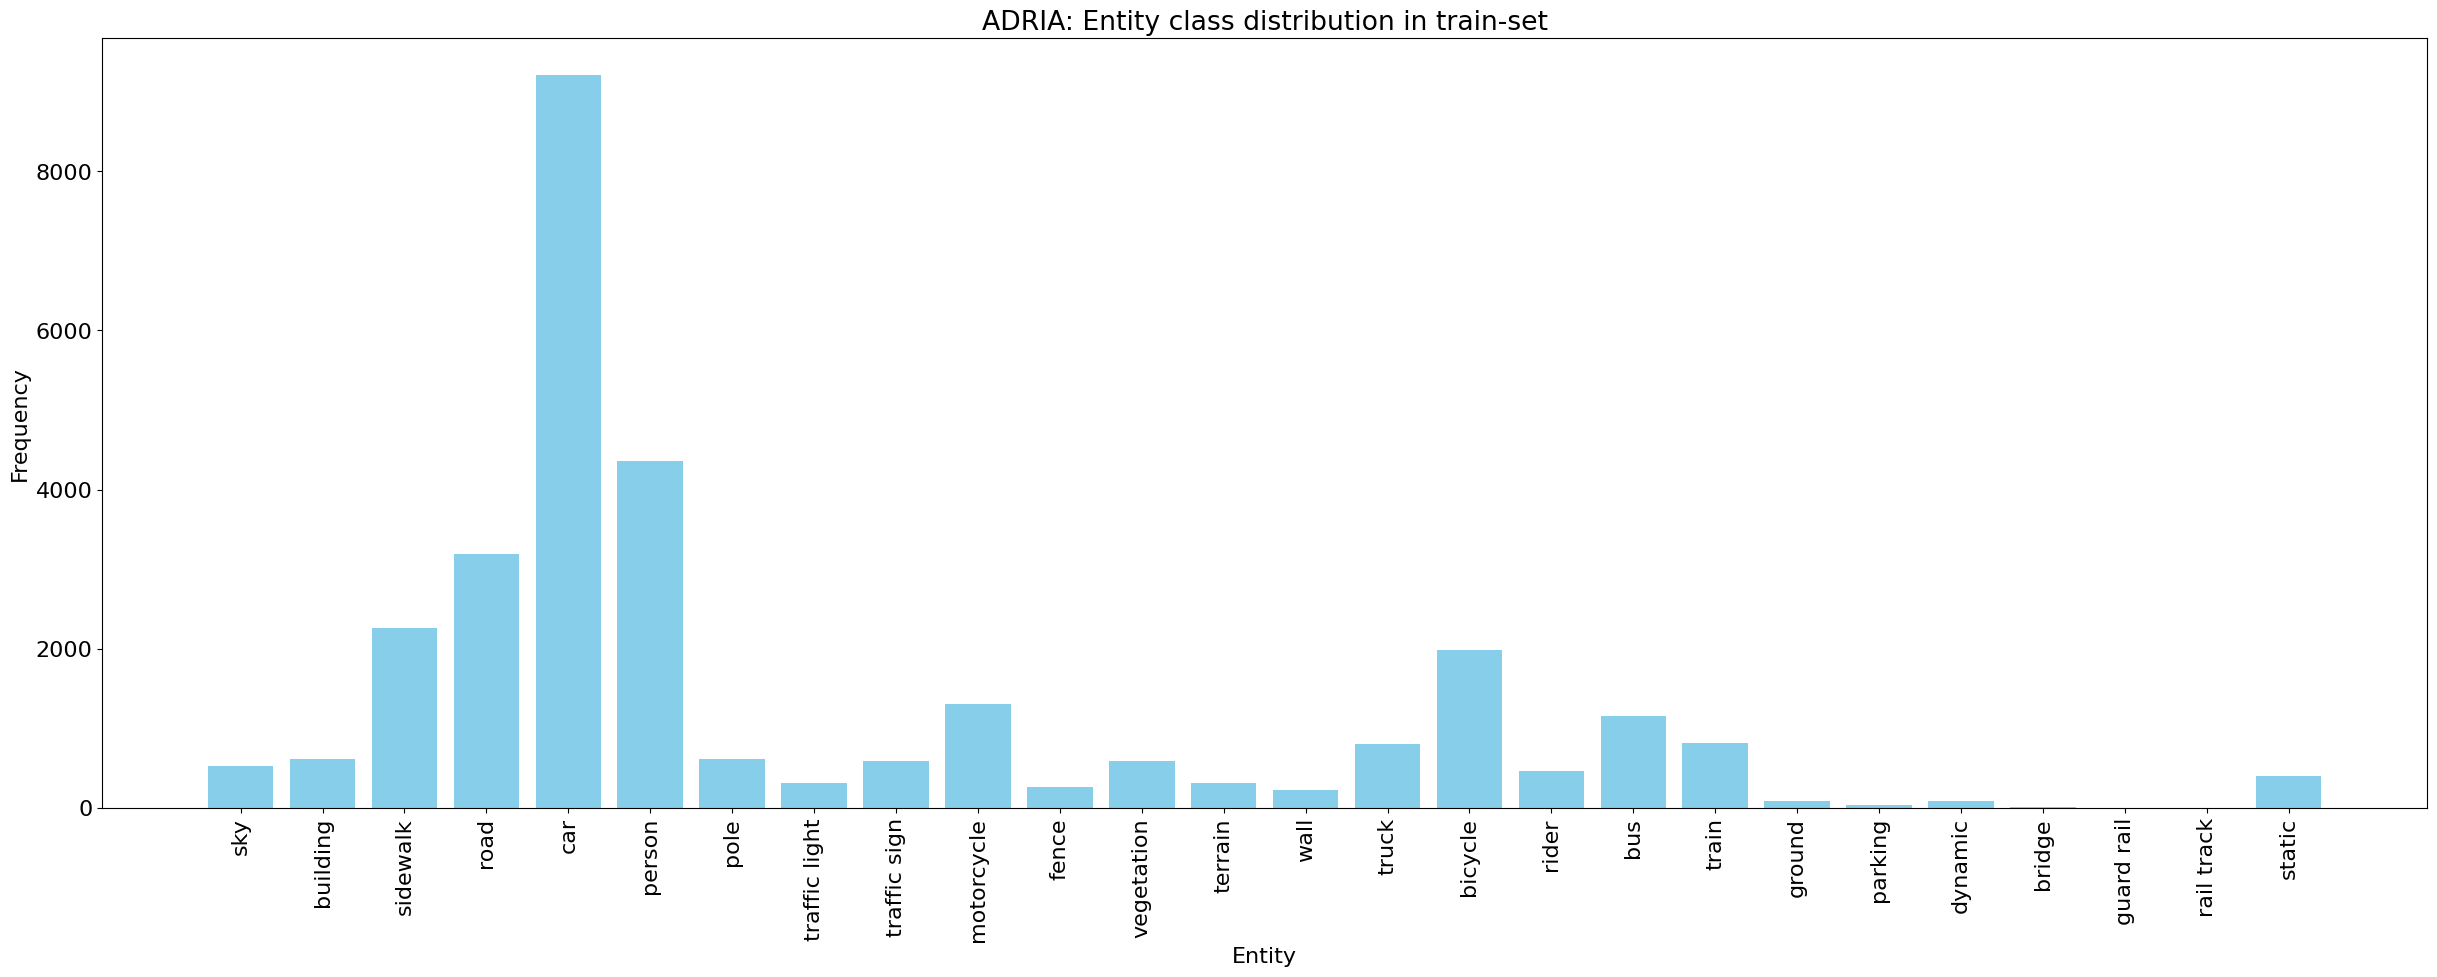

In [ ]:
show_distribution('train')

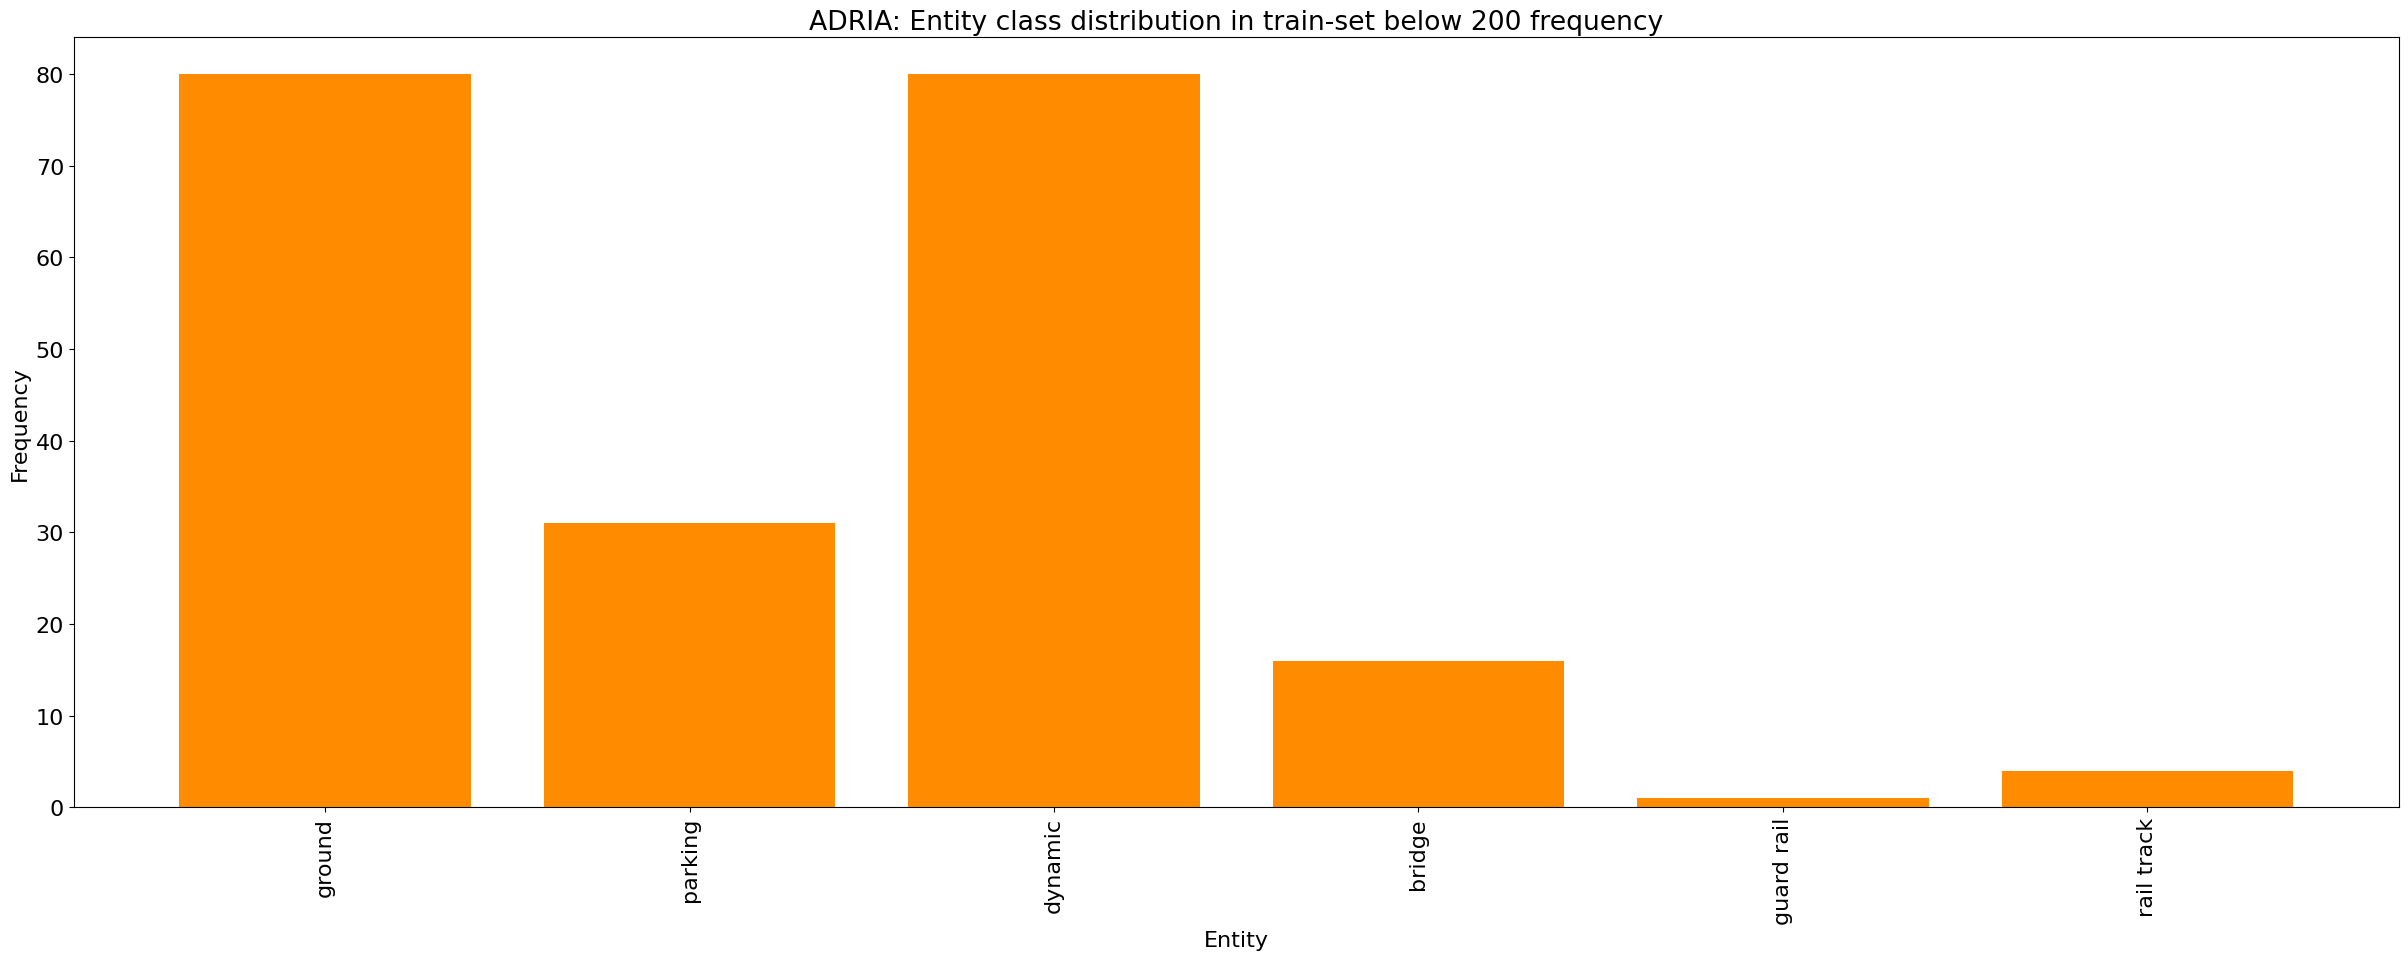

In [ ]:
show_distribution('train', 200)

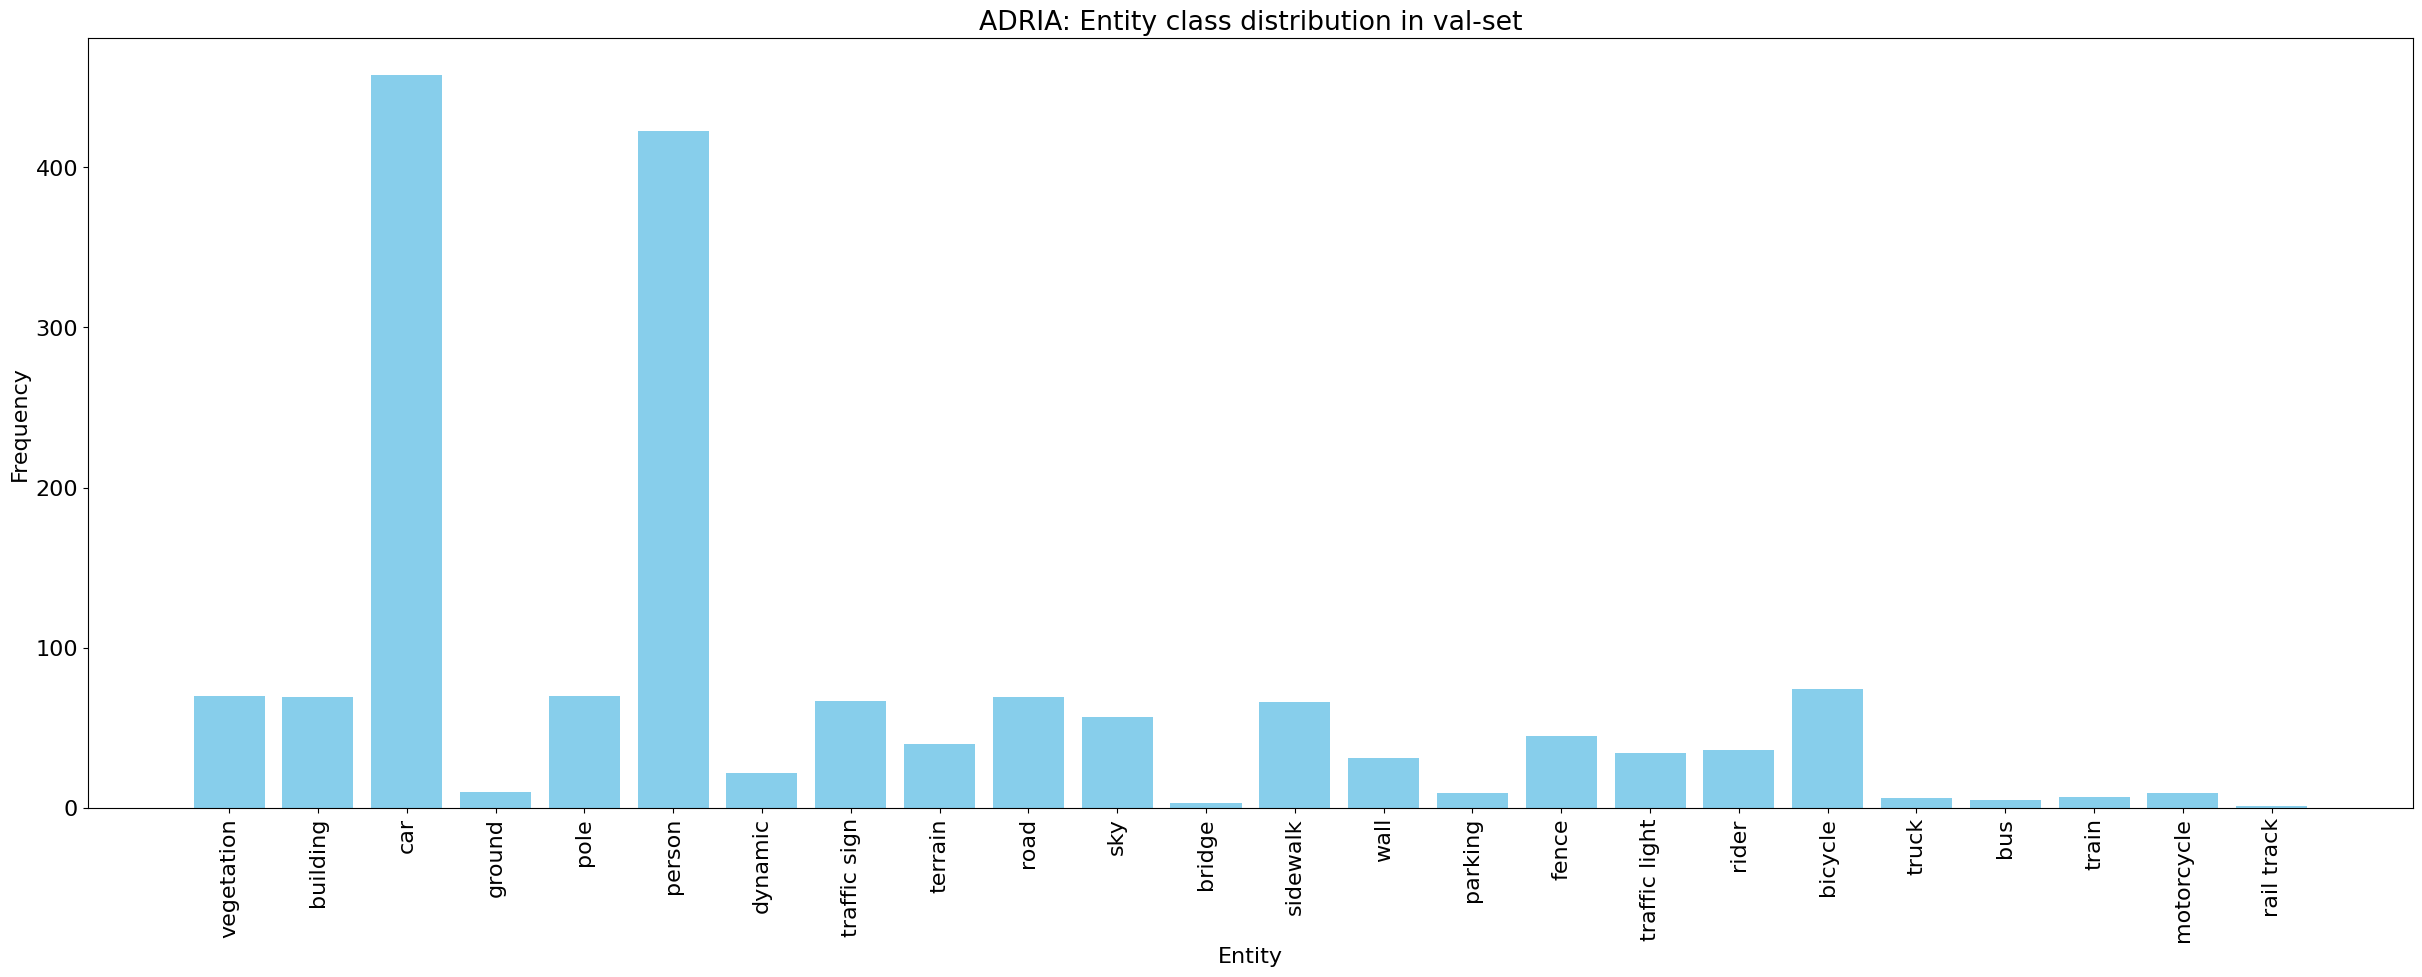

In [ ]:
show_distribution('val')

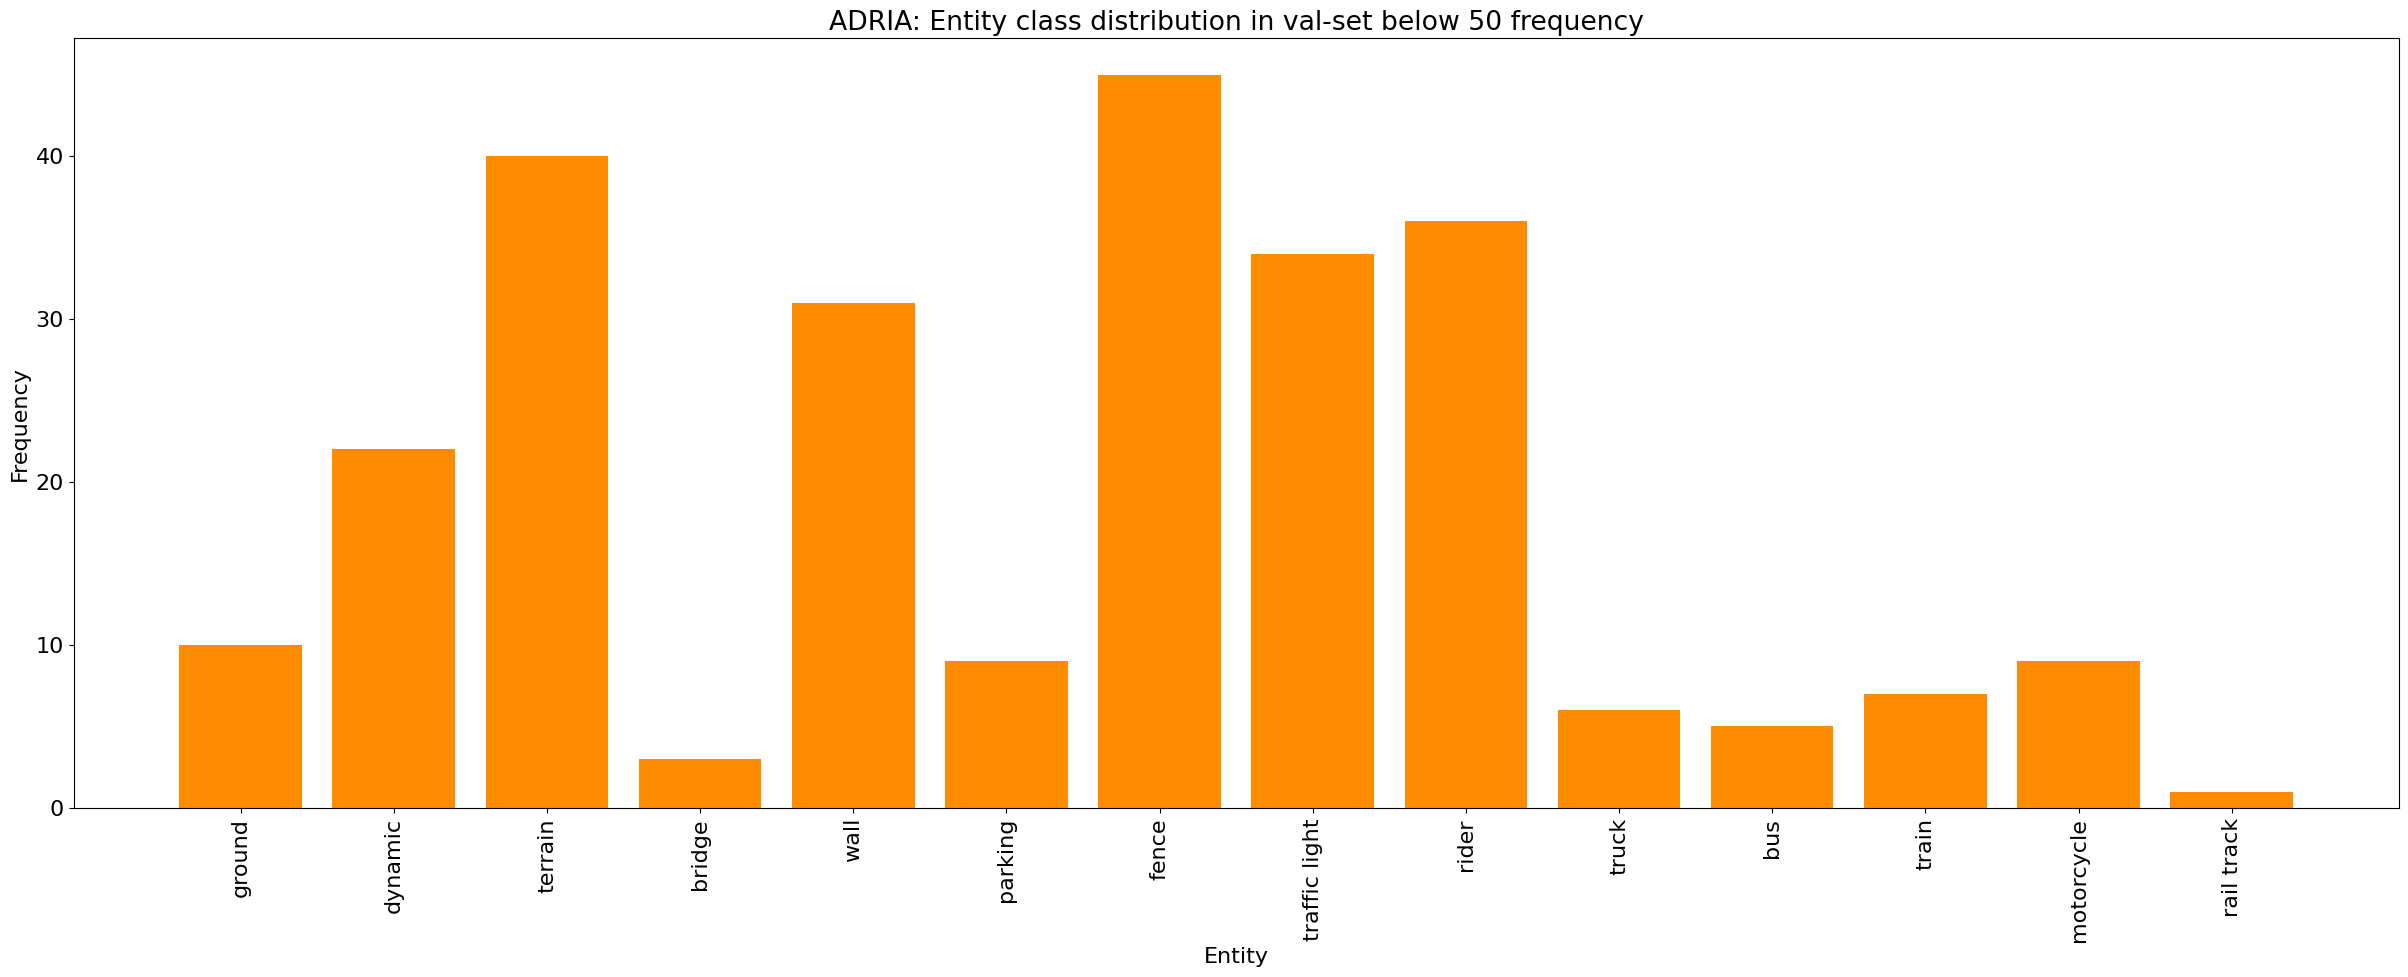

In [ ]:
show_distribution('val', 50)

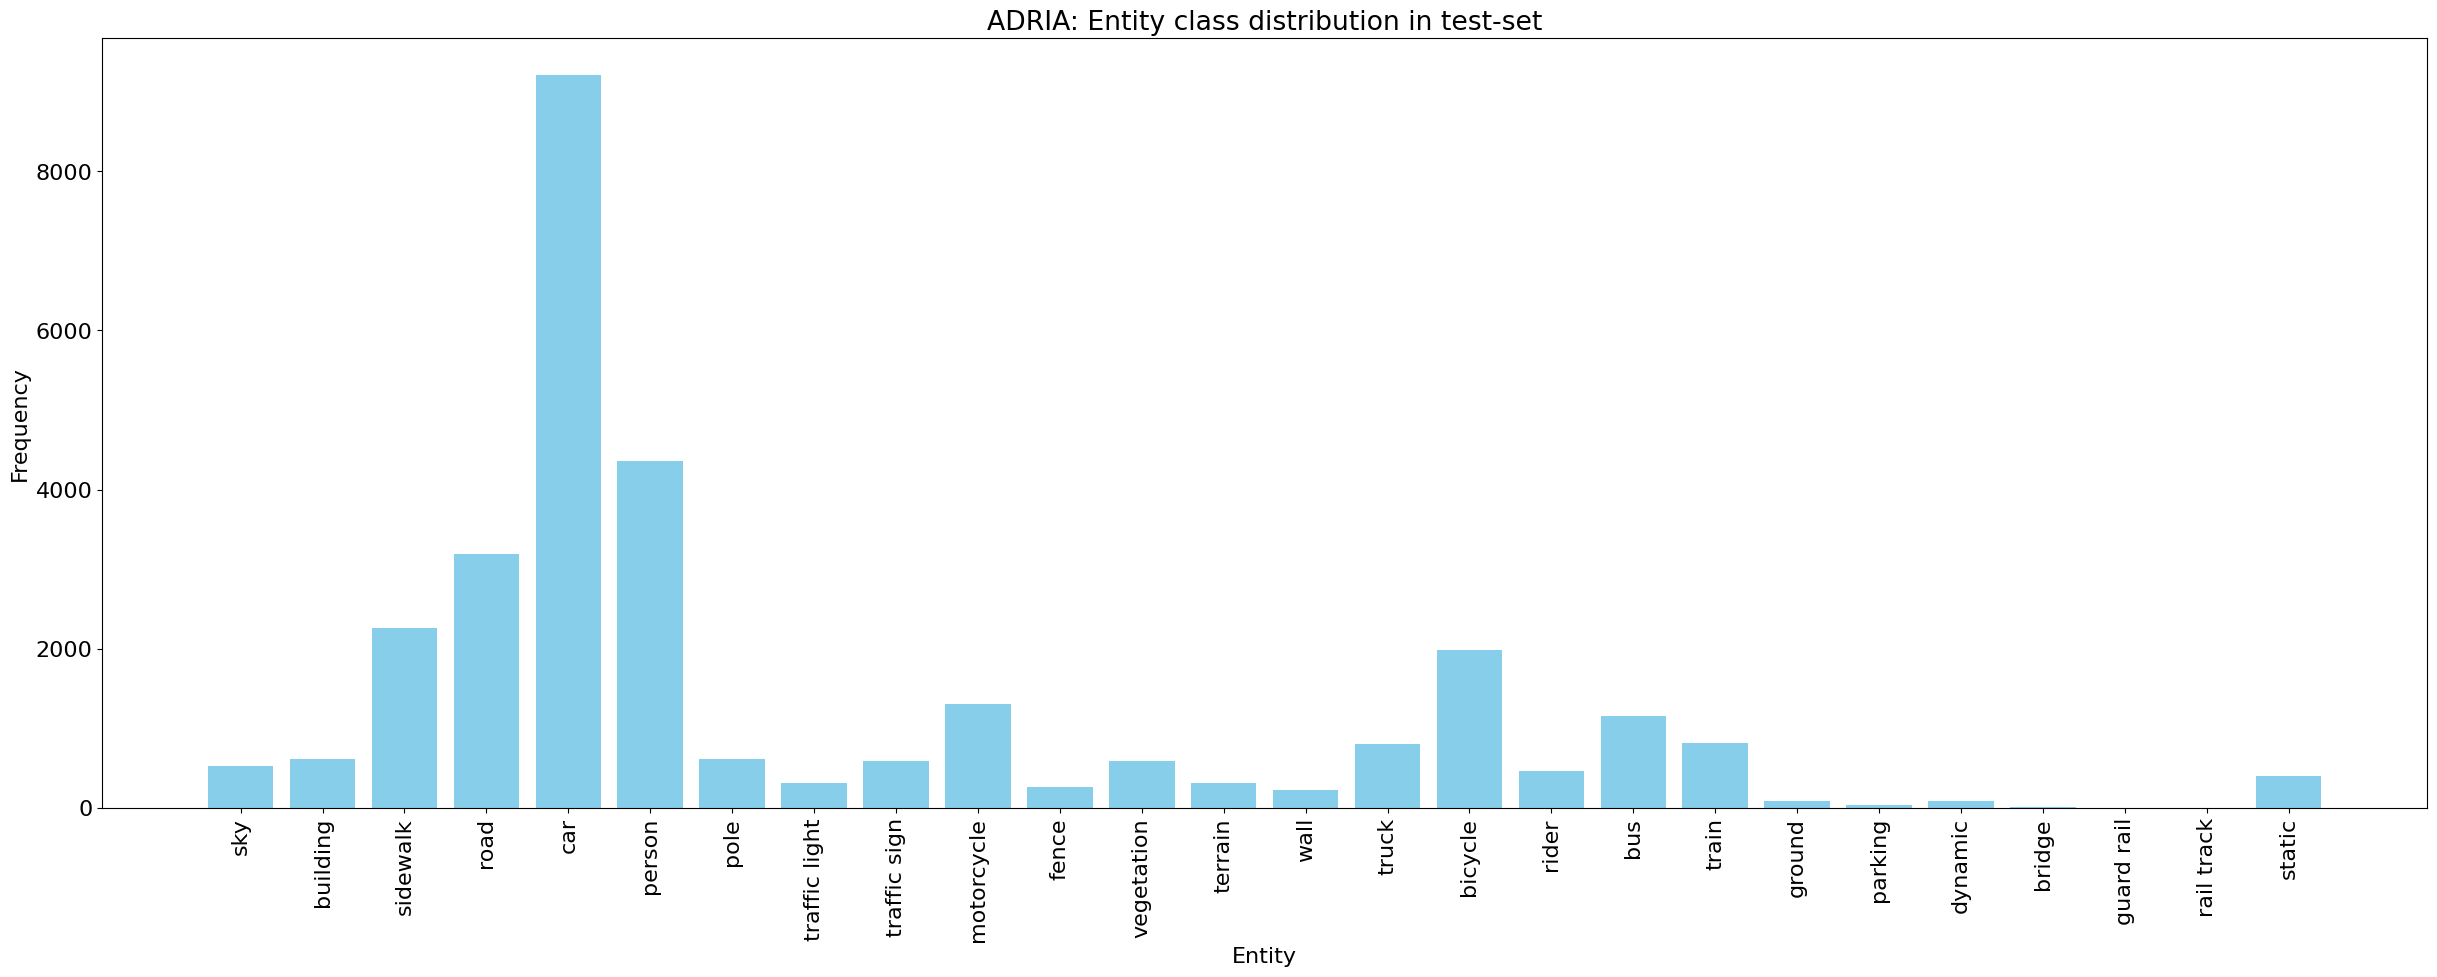

In [ ]:
show_distribution('test')

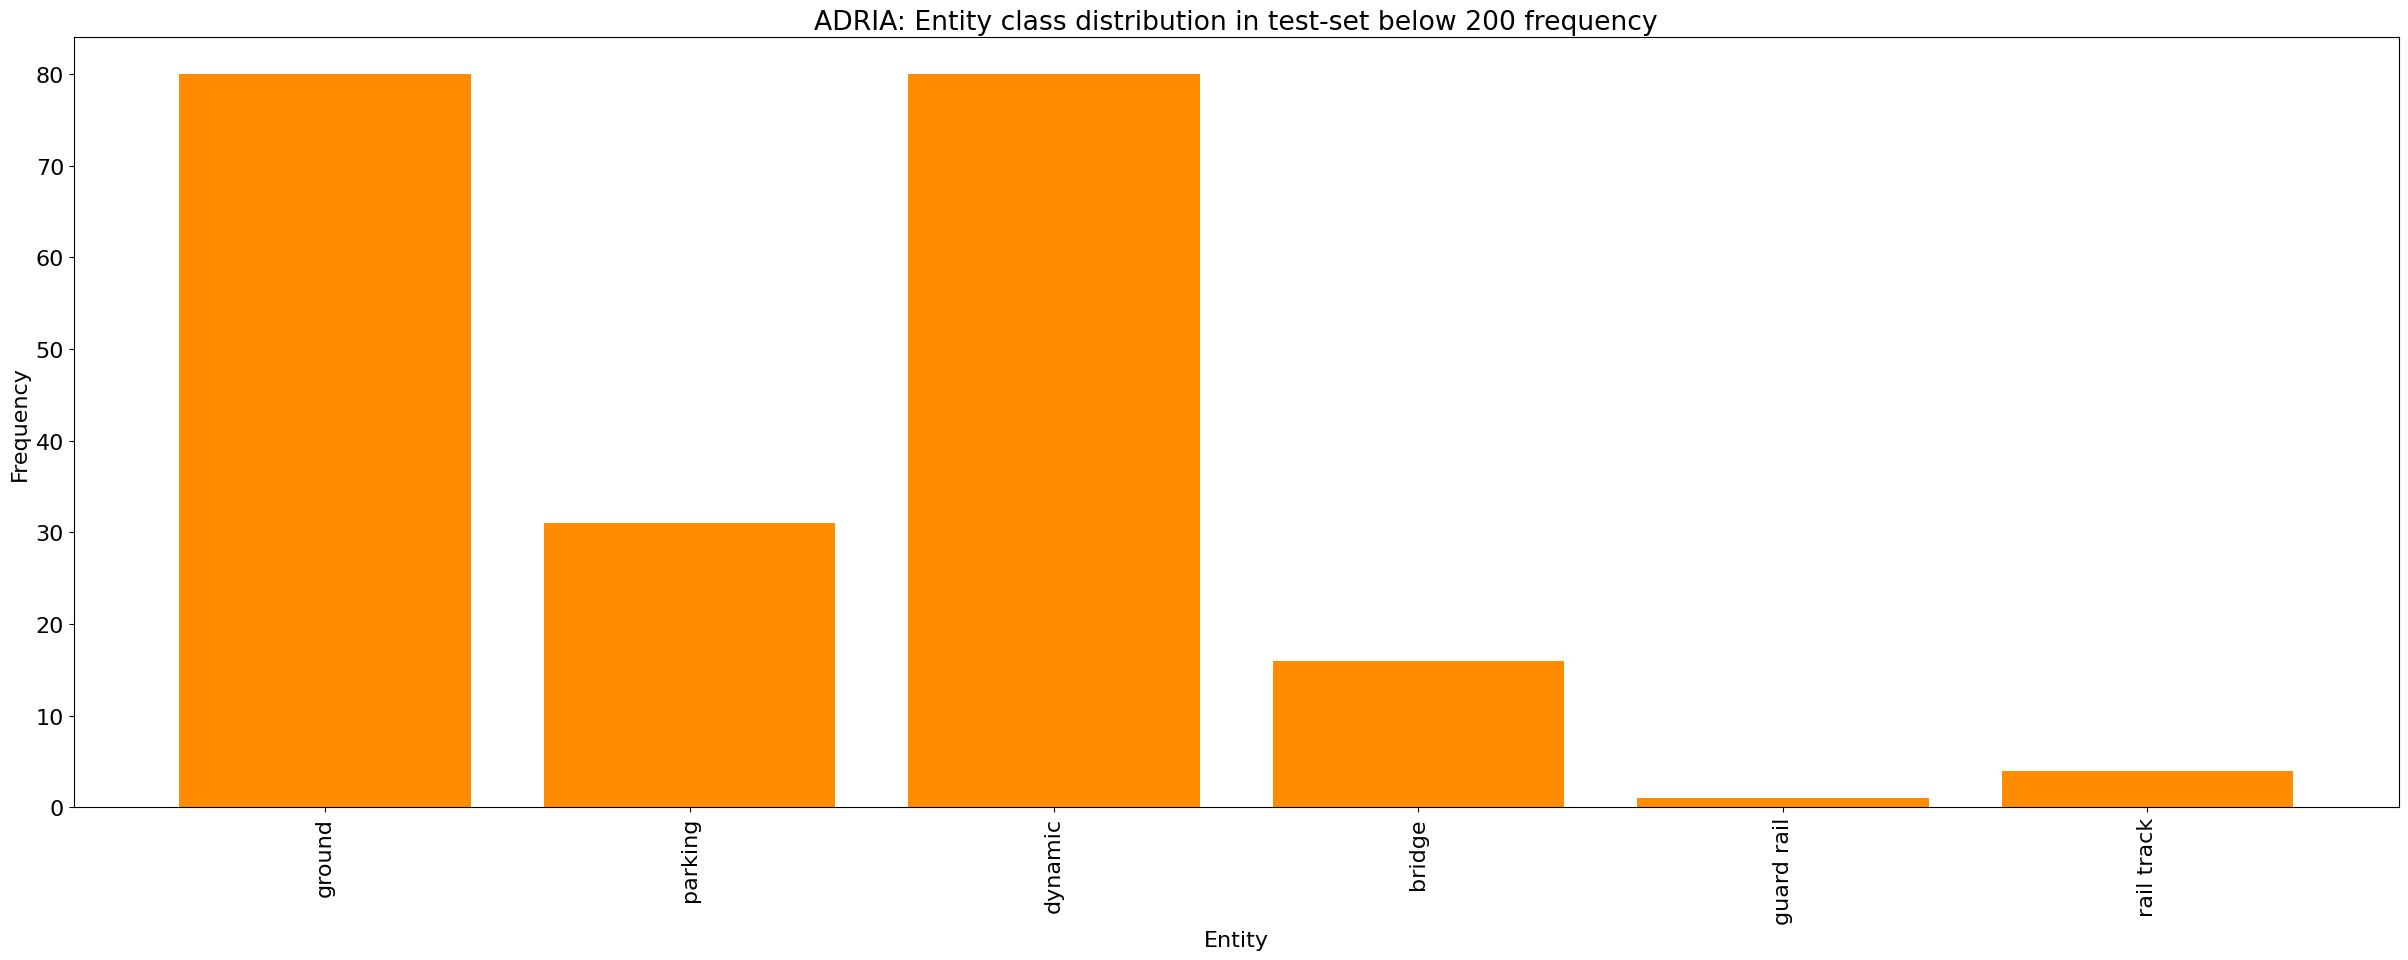

In [ ]:
show_distribution('test', 200)

Relationship distribution in different set 


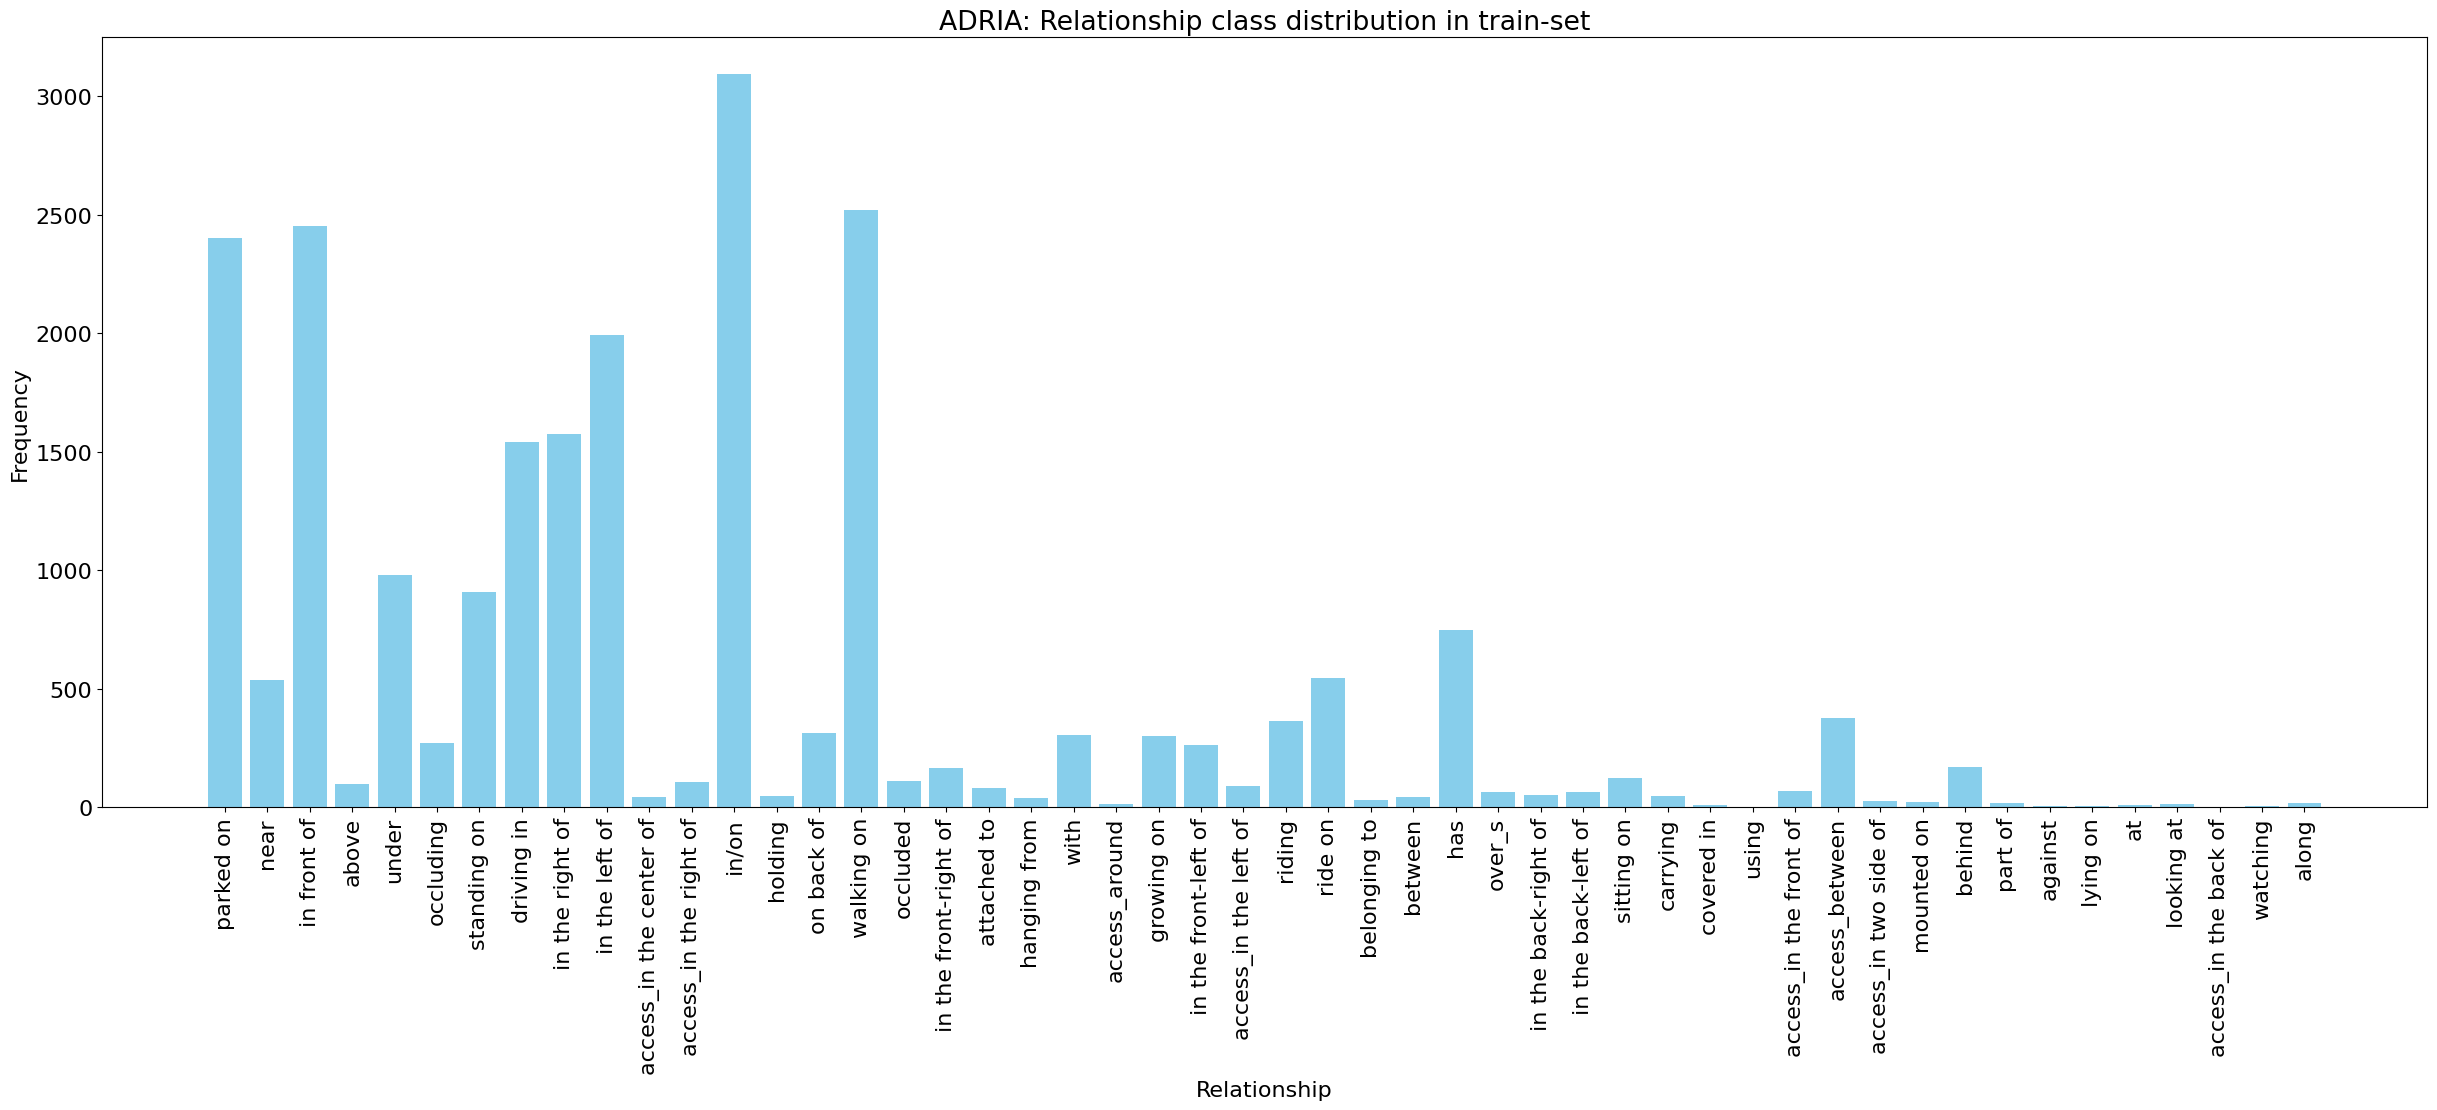

In [ ]:
show_distribution('train', type='Relationship')

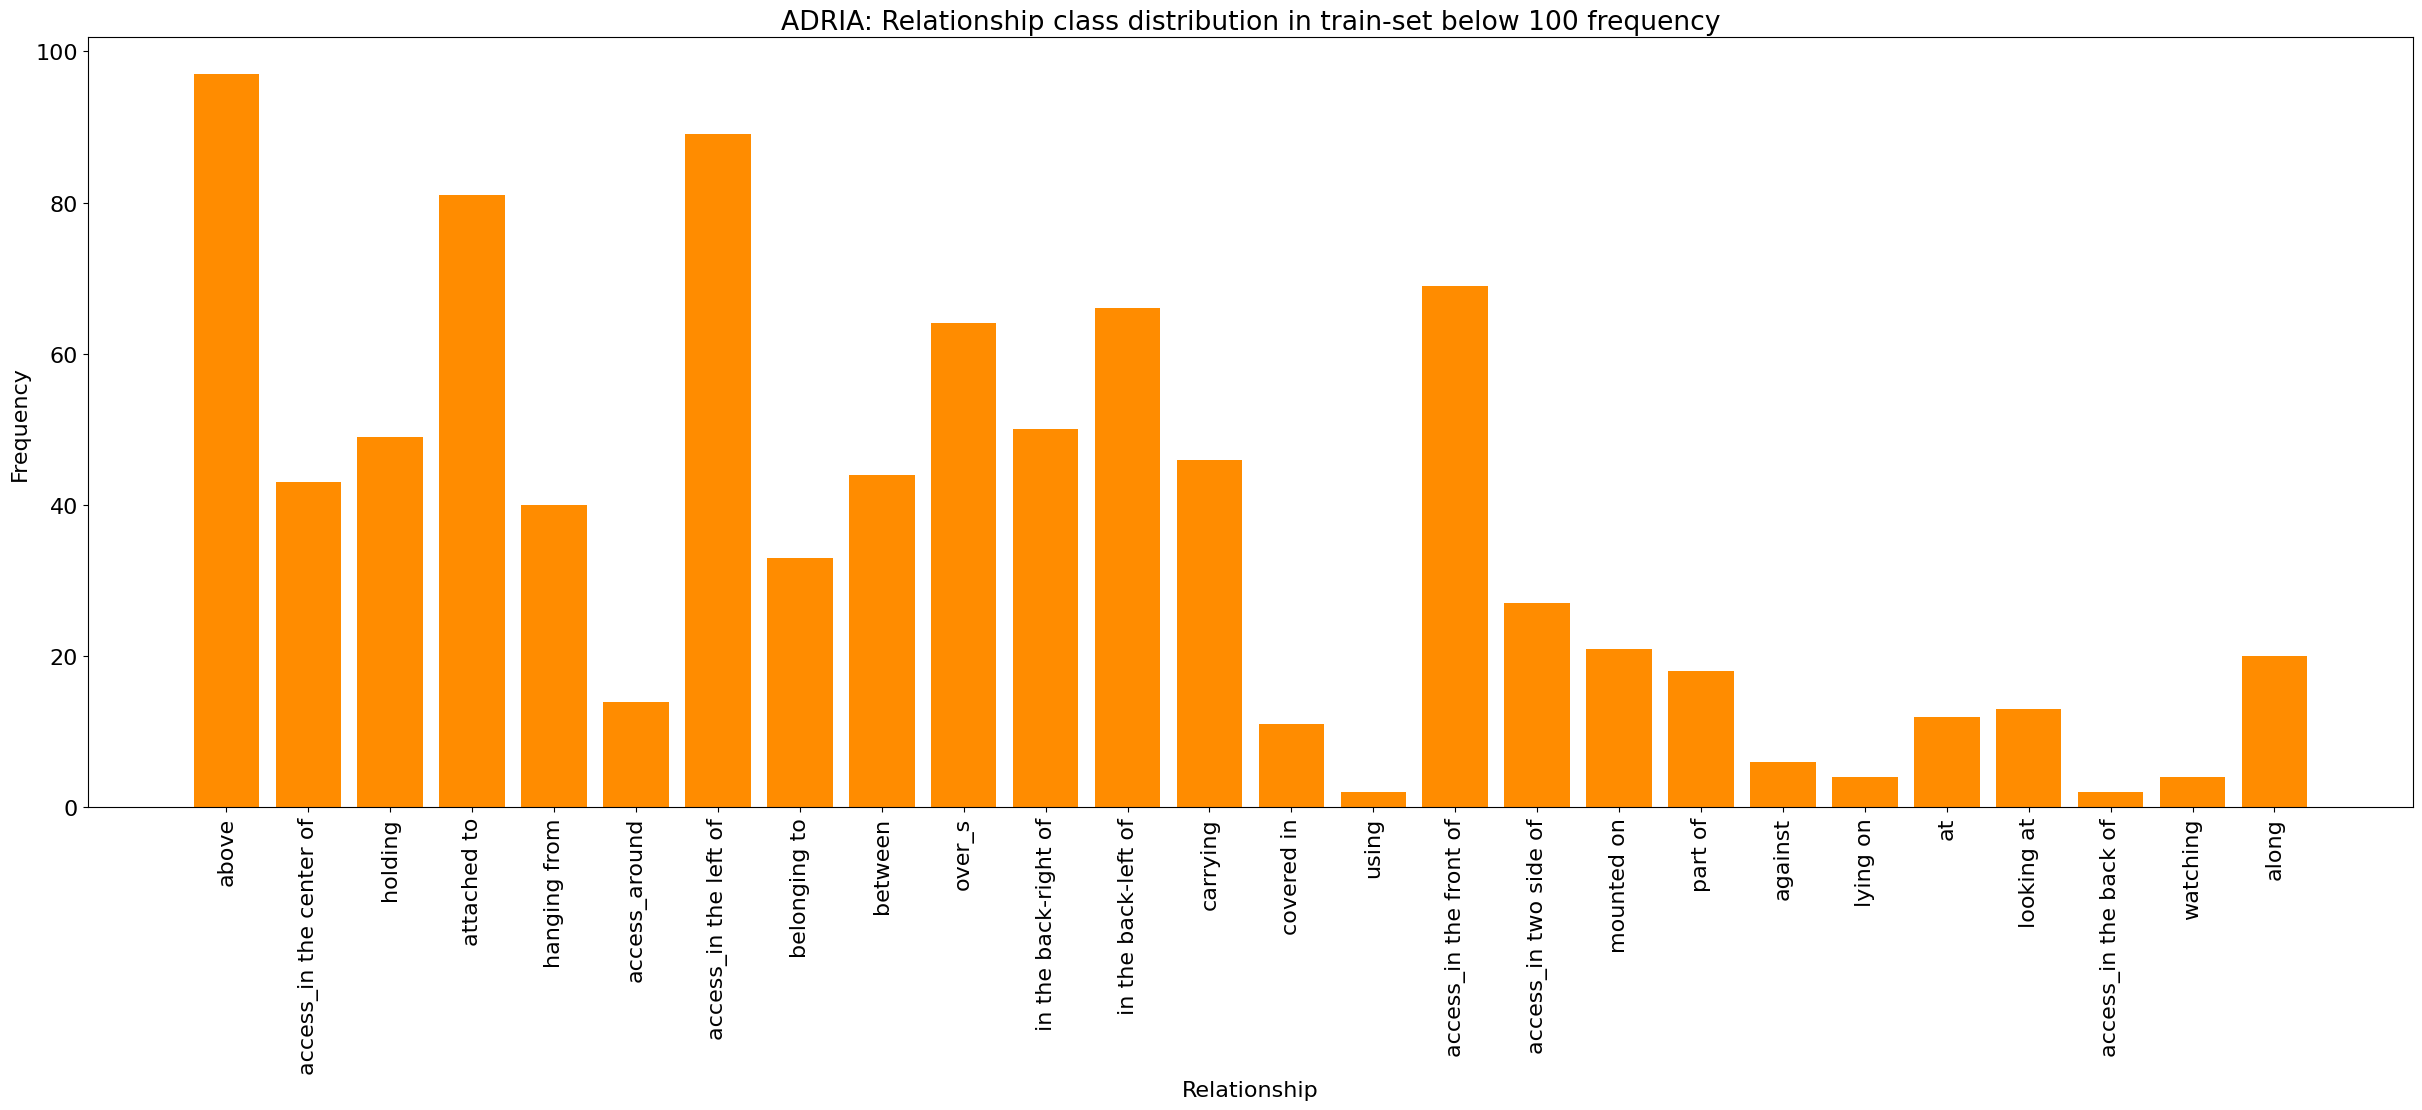

In [ ]:
show_distribution('train', thresh=100, type='Relationship')

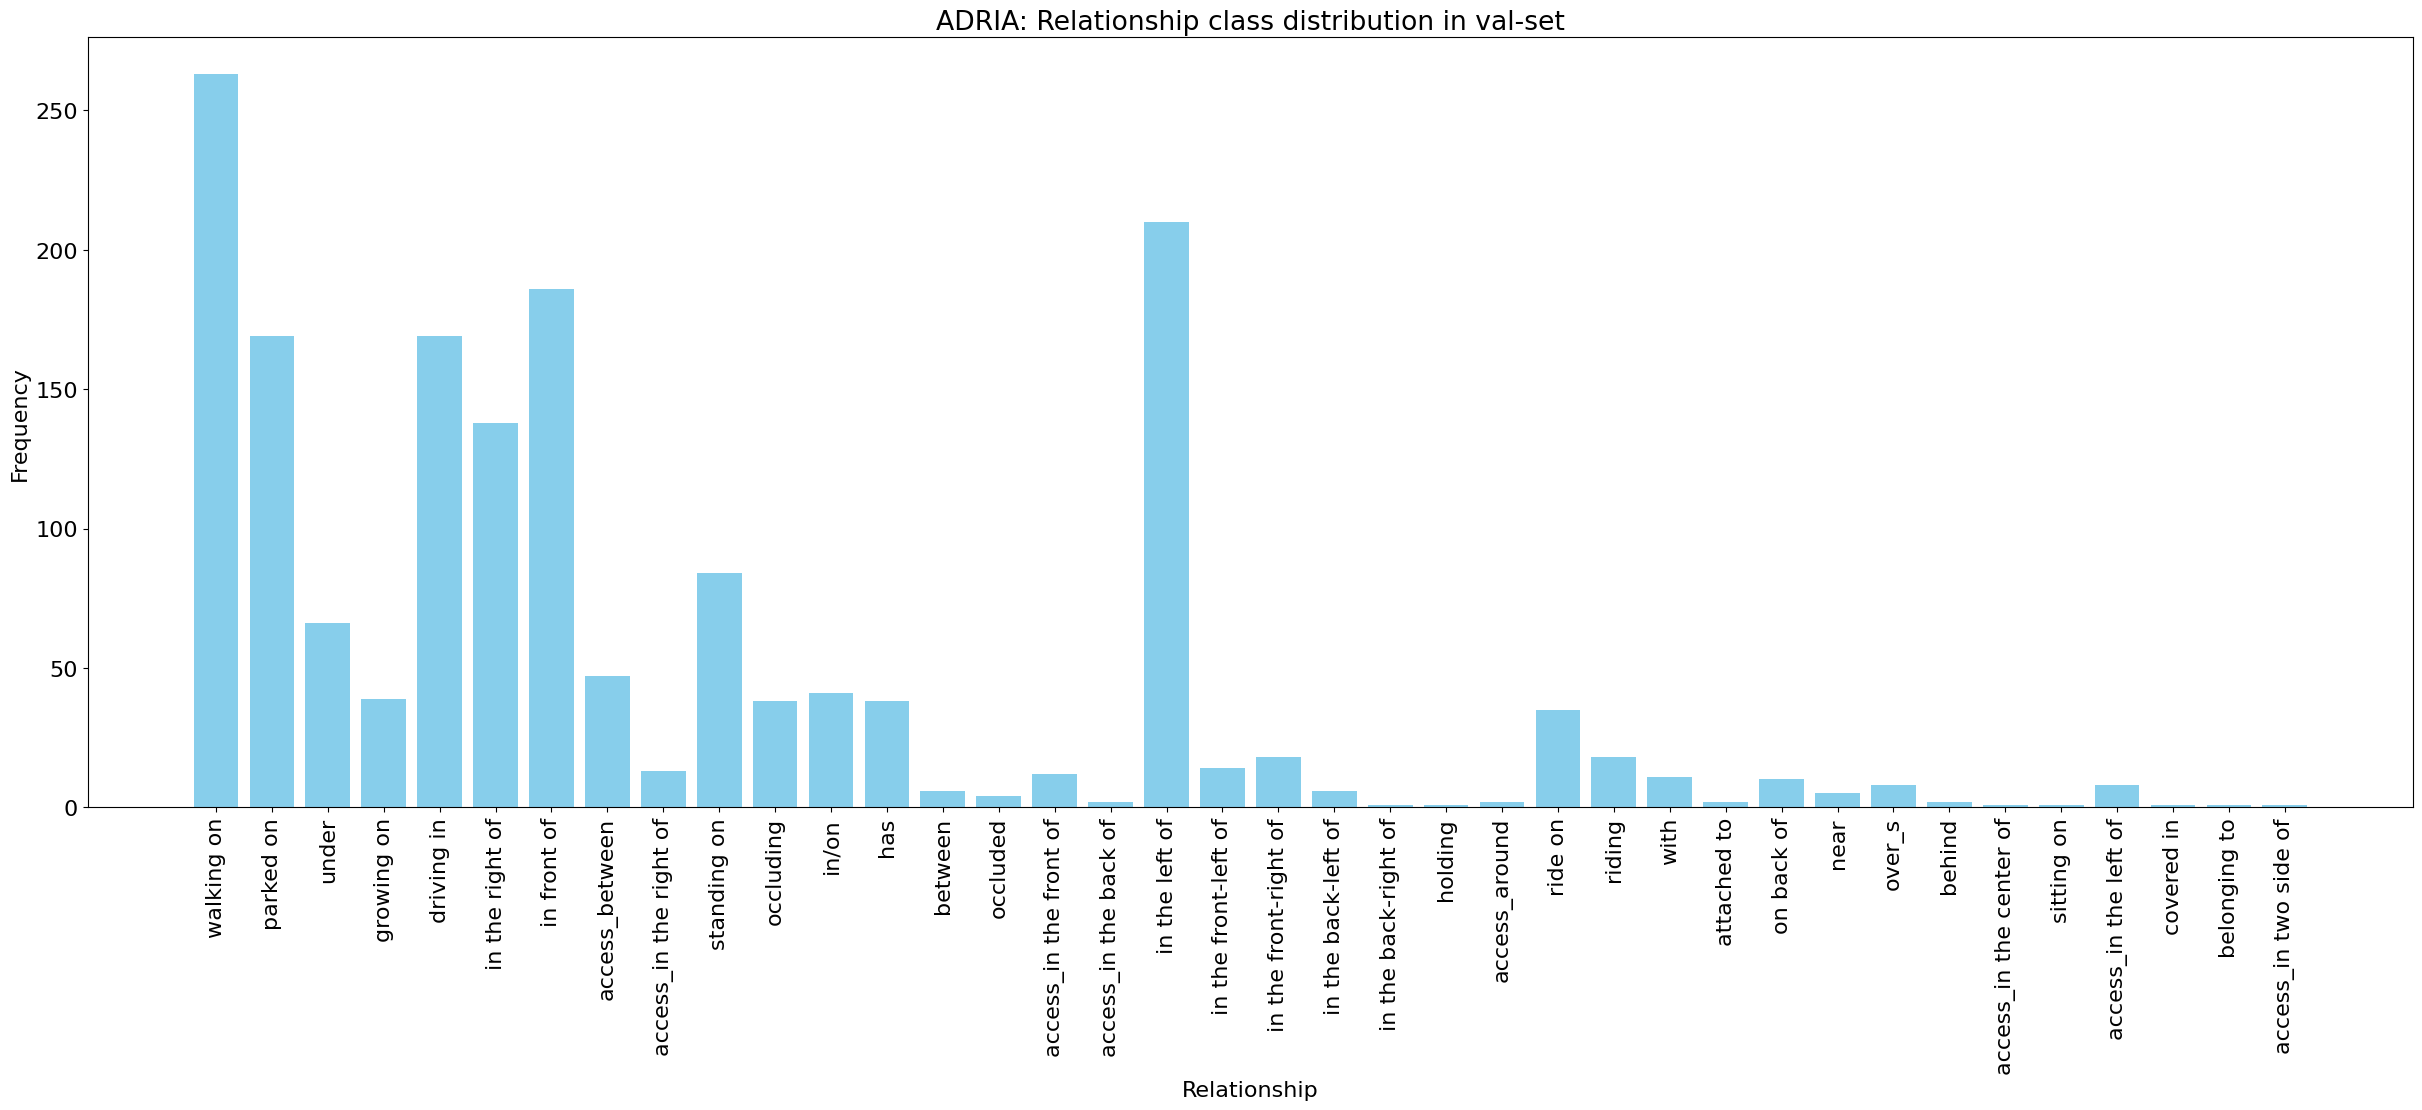

In [ ]:
show_distribution('val', type='Relationship')

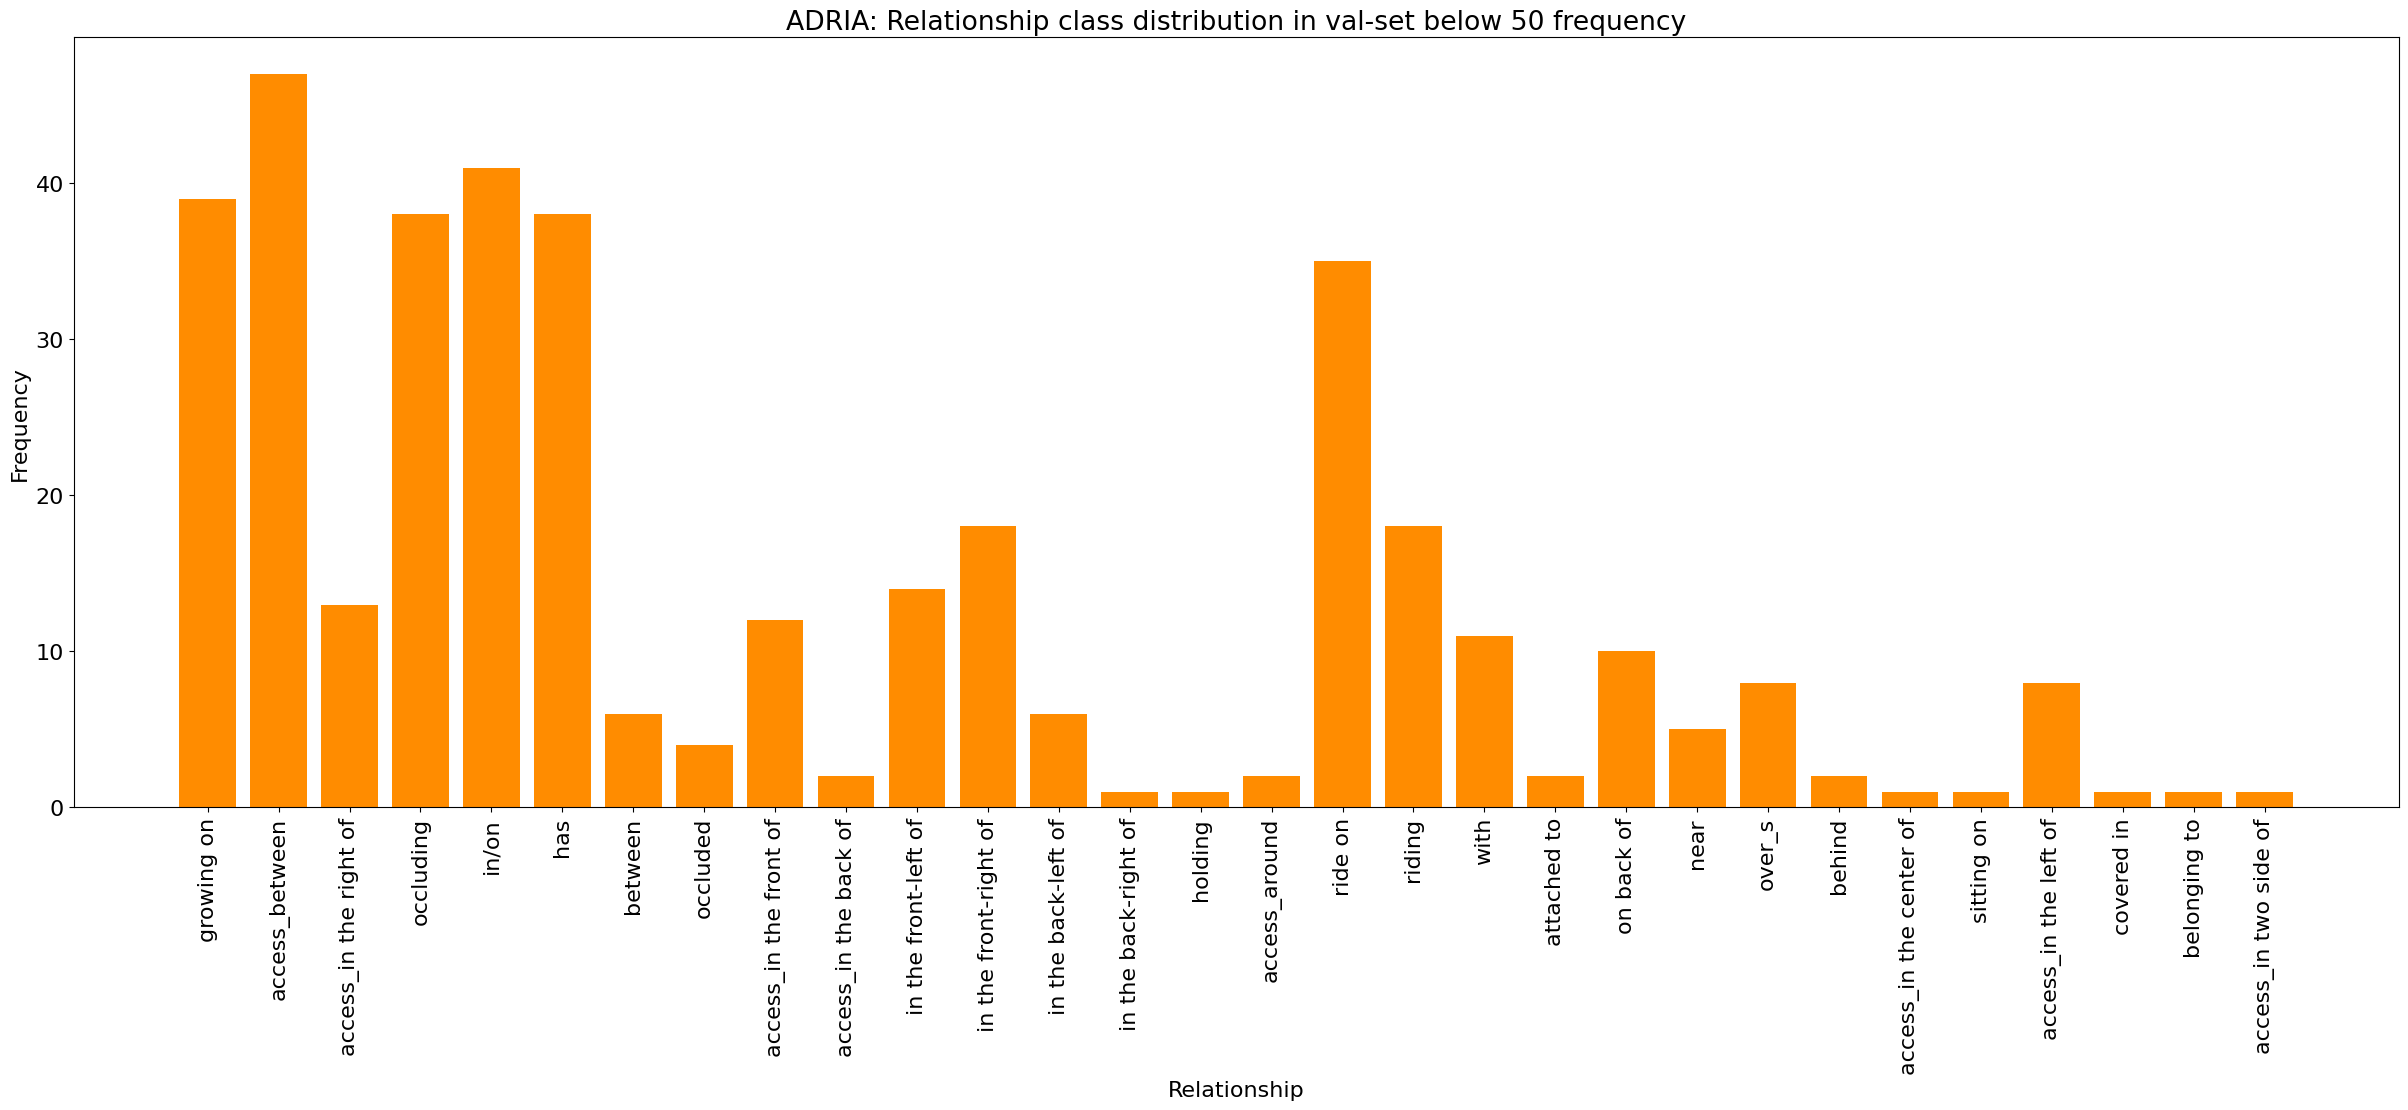

In [ ]:
show_distribution('val', thresh=50, type='Relationship')

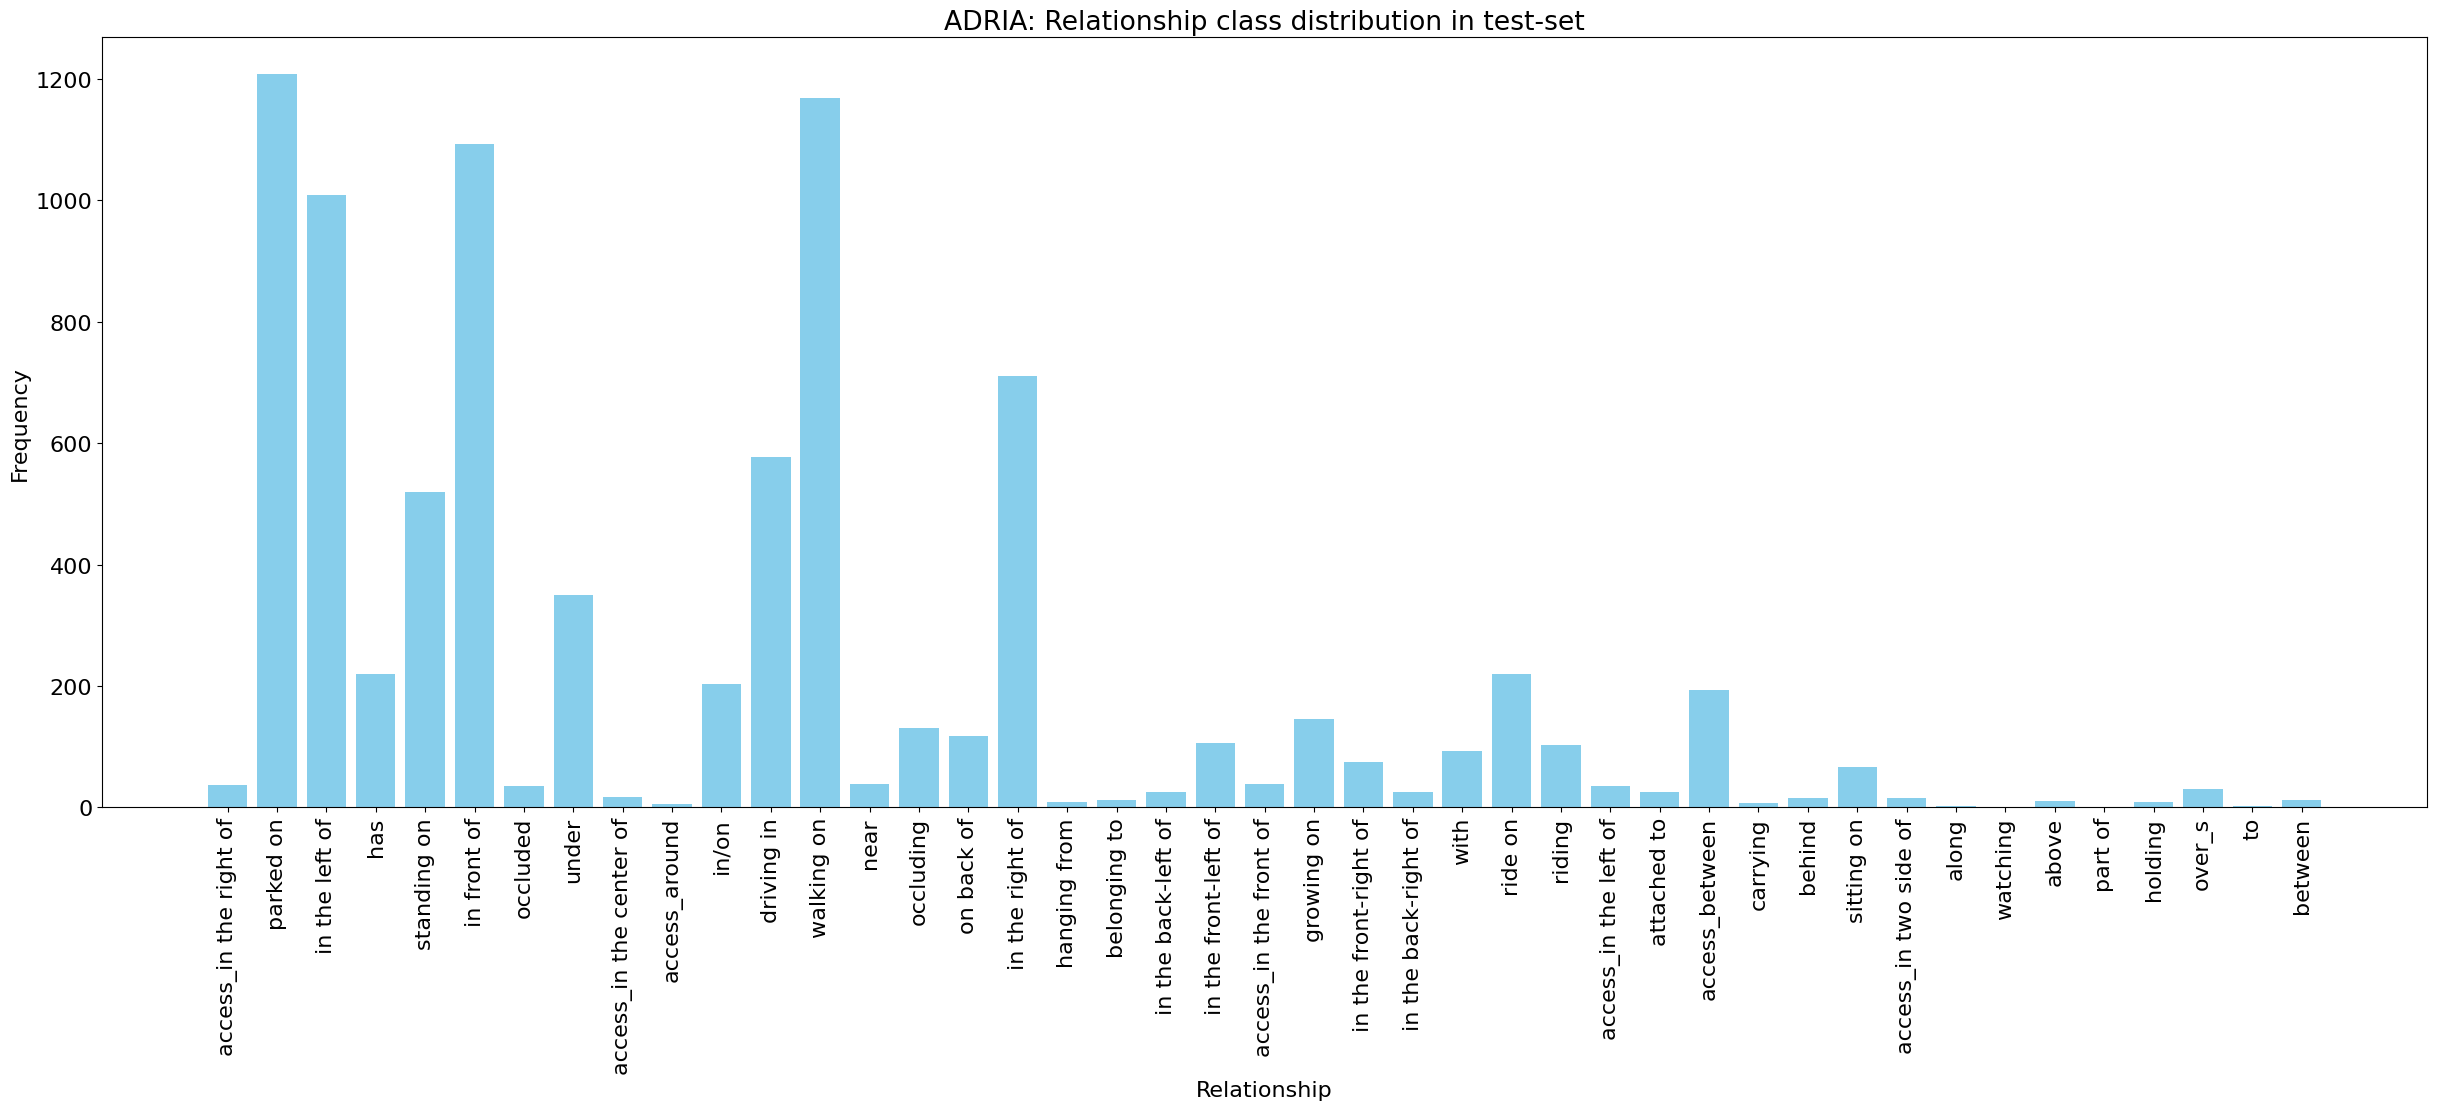

In [ ]:
show_distribution('test', type='Relationship')

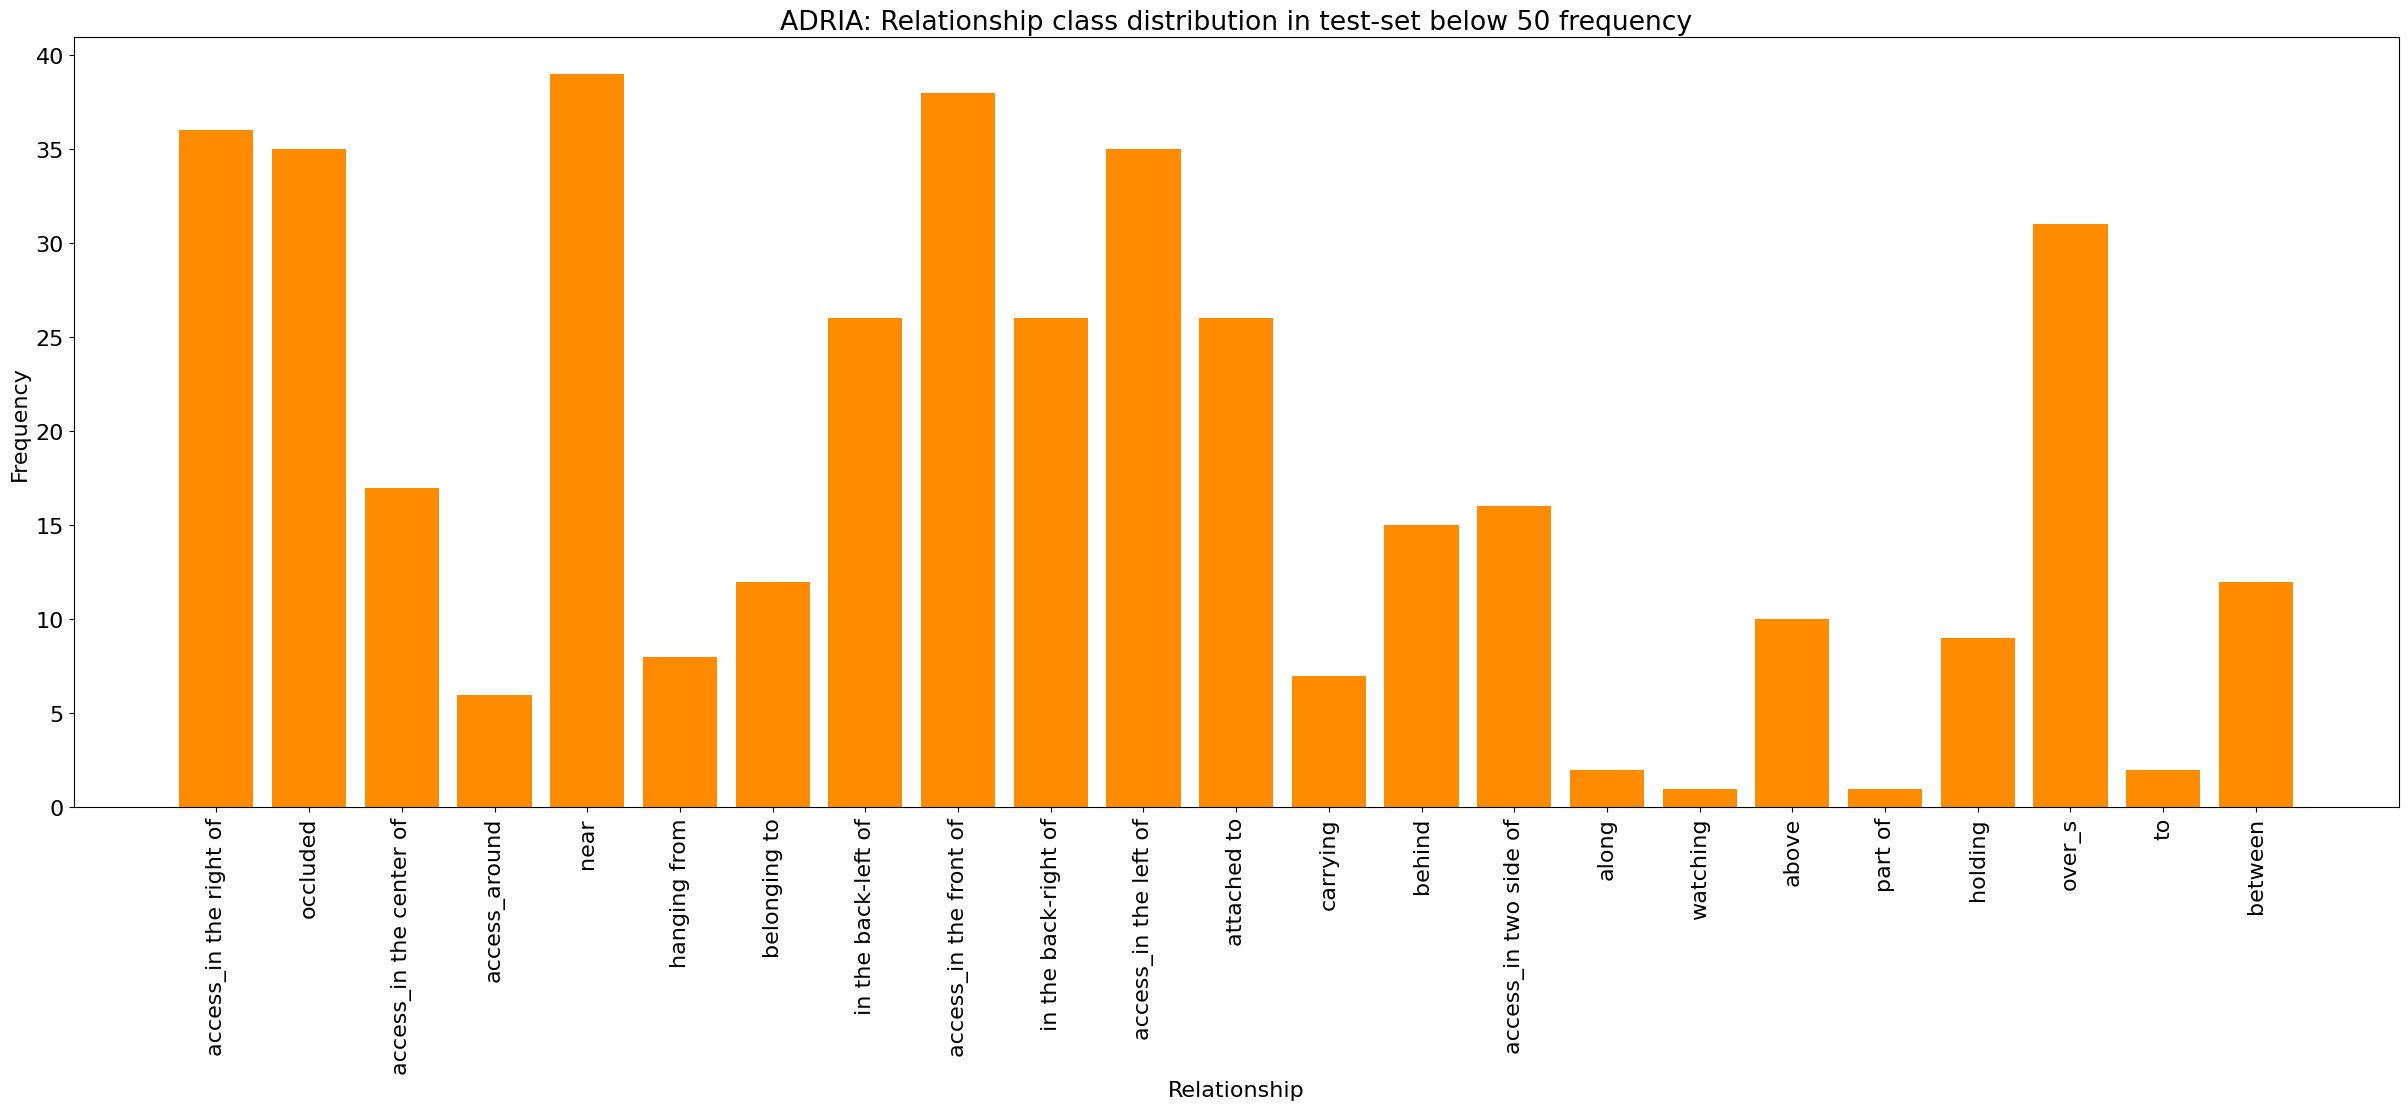

In [ ]:
show_distribution('test', thresh=50, type='Relationship')

In [ ]:
def number_item(set_name:str, type=str)->int:
    assert type=='Entity' or type=='Relationship', 'only enetity and relationship are admissible'
    
    freq_set = { }


    if type=='Entity':
        with open(f'adria_dataset/{set_name}.json') as f:
            set_data = json.load(f)
            
        # map category
        n_item = len(set_data['annotations'])

    else:
        with open(f'adria_dataset/rel.json') as f:
            rel_data = json.load(f)
            
            set_data = rel_data[set_name]
            cat_map = { i: name  for i, name in enumerate(rel_data['rel_categories']) }
            
        n_item = reduce(lambda a, b: a+b, map(lambda l_r: len(l_r), set_data.values()))

            
    return n_item
            
            

In [ ]:
bbox_train = number_item('train', 'Entity')
bbox_val = number_item('val', 'Entity')
bbox_test = number_item('test', 'Entity')

print(f'Bbox: train({bbox_train})\tval({bbox_val})\ttest({bbox_test})')

rel_train = number_item('train', 'Relationship')
rel_val = number_item('val', 'Relationship')
rel_test = number_item('test', 'Relationship')

print(f'Relationship: train({rel_train})\tval({rel_val})\ttest({rel_test})')



Bbox: train(30206)	val(1681)	test(30206)
Relationship: train(23092)	val(1671)	test(8716)
